<a href="https://colab.research.google.com/github/fungikami/Generative-Art-with-Genetic-Algorithm/blob/main/Ka_Fung_Proyecto_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://ykxyjwk.cluster028.hosting.ovh.net/logotipoUSB.png" width=300></img> 

# Universidad Simón Bolívar
# CI2691 Laboratorio de Algoritmos y Estructuras I
# Algoritmo Genético (Proyecto I)
### Enero-Marzo 2021



# Requisitos

In [1]:
# Requirements. Run this cell.
%pip install Pillow
%pip install matplotlib
%pip install ipywidgets

import requests                                           # To get images
from IPython.display import Image as ipd                  # To display an image in Google Colab
from PIL import Image, ImageDraw                          # To create, draw and display images
from random import randint as rint, random as rrandom, sample as rsample # rint: Integers randoms, rrandom: [0.0, 1.0) random, rsample: Random element of a list / tuple
import matplotlib.pyplot as plt                           # To make plots
from ipywidgets import interact_manual                    # Interactive widgets
import ipywidgets as widgets

# Algoritmo Genético

> Un algoritmo genético es una serie de pasos organizados que simulan el proceso de la evolución natural y genética (selección del más apto, cruce y mutación), para dar solución a un problema específico. Se evoluciona una población de individuos sometiéndola a acciones aleatorias semejantes a las que actúan en la evolución biológica (mutaciones y cruces), así como también a una selección de acuerdo con algún criterio, en función del cual se decide cuáles son los individuos más adaptados, que sobreviven, y cuáles los menos aptos, que son descartados.



![](https://dineroclub.net/wp-content/uploads/2019/02/ALGORITMOGENETICO2.png)

En esta oportunidad implementaremos un algoritmo genético para crear ✧arte✧. A partir de una población inicial (una imagen), constituida por un cierto número de individuos (polígonos), le aplicaremos el algoritmo genético para que dicha población evolucione en cada generación y tenga una mayor similitud a una imagen de referencia. Tengamos en cuenta los siguientes conceptos:

*   Gen: es una unidad de información que almacena la información genética. En esta implemención cada gen tiene los atributos de un polígono (vértices y color).
*   Individuo (cromosoma): constituido por un número de genes. En esta implementación, el genotipo de un individuo es una lista de genes (polígonos) y el fenotipo del individuo es una imagen con un conjunto de polígonos.
*   Población: constituido por un número de individuos. La población inicial es generada de manera aleatoria.
*   Aptitud: es una función que toma una solución candidata al problema como entrada y produce como salida cuán "buena" es la solución con respecto al problema en consideración. En esta ocasión, calcularemos el parecido que tiene el fenotipo del individuo con la imagen de referencia.
*   Selección: el proceso mediante el cual se eligen individuos a partir de una población, con el objeto de ser evolucionados o, una vez evolucionados, ser reinsertados en la población. Se elegirá los individuos según sus aptitudes.
*   Cruce: es un operador genético que se utiliza para combinar la información genética de dos padres para generar nueva descendencia. En esta ocasión, se implementará el cruce de un punto.
*   Mutación: es un operador genético usado para mantener la diversidad genética de una población. Modifica uno o más genes de un individuo, dado una probabilidad.

Por cada generación se calculará la aptitud de cada individuo de la población, se escogerán a los más aptos para que se realice los cruces necesarios y se aplicará una mutación aleatoria a la nueva población.

Para su implementación en Python y Google Colab necesitamos:

* Crear imágenes dibujando polígonos: Pillow (módulos: Image, ImageDraw).
* Manejo de colores y transparencias: Pillow (RGBA).
* Leer, guardar, mostrar imágenes: Pillow (métodos: display() (muestra imágenes de tipo PIL.Image.Image), save()) y IPython (muestra imágenes si están descargadas en el colab, por el nombre del archivo).
* Comparar dos imágenes (medir la diferencia entre ellas): Pillow (métodos: getpixel()).
* Hacer gráficos (para mostrar la convergencia de nuestro algoritmo genético): matplotlib .









# Complementos

## Descarga de imágenes
> La función download_img(url, name) será utilizada para descargar las imágenes de referencia del Internet. Las imágenes que se descarguen preferiblemente deben ser de formato PNG (con el formato JPG a veces funciona). Tenga en cuenta que una vez que se desconecte Google Colab (ya sea cerrando la página o cerrando sesión), deberá descargar de nuevo las imágenes.




Image has been downloaded successfully mario.png


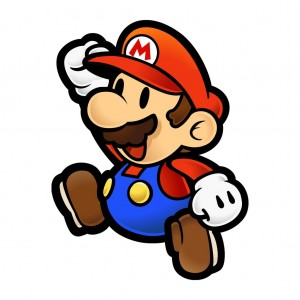

In [ ]:
# Programa que dado un url y un nombre, descarga el archivo y lo guarda como un png.
# Author: Ka Fung.
# Date: 18-03-2021

def download_img(url:str, name:str) -> None:
    ''' Program that, given a url and a name, downloads an image from the 
        internet and saves it in the Google Colab
        Source: https://stackoverflow.com/questions/62974711/how-to-download-an-image-from-the-internet-using-google-colab-jupyter

        Args:
            url: string 
            name: string (image name).

        Return:
            Image name.
    '''
    # Preconditions
    assert isinstance(url, str) and isinstance(name, str), "Precondition is false"
    
    if not name.lower().endswith('.png'):
        name += '.png'

    try:
        image = requests.get(url).content
        with open(name, 'wb') as handler:
            handler.write(image)
            print(f'Image has been downloaded successfully {name}')
    except:
        print("An error occurred downloading the image")   
    else:
        return name

# tests
mario_image = download_img("https://dcw9y8se13llu.cloudfront.net/avatars/raika125.jpg", "mario")
display(ipd(mario_image))

## Cambio de tamaño de una imagen
>  La función resize_img(img_size, filename) toma un tamaño (ancho, largo) y el nombre de una imagen descargada en Google Colab, para reducir el tamaño de la imagen y guardarlo en un nuevo archivo. Retorna el nombre del nuevo archivo.

Antes del resize: 


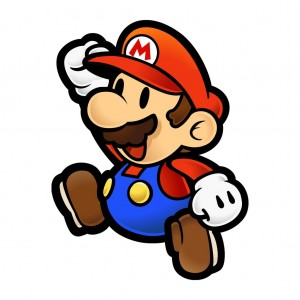

Image has been successfully resized: resize-mario.png
Después del resize: 


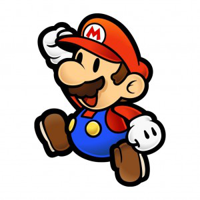

In [ ]:
# Programa que dado el tamaño de una imagen y el nombre de la imagen que se 
# desea modificar, modifica el tamaño de la imagen. Si las medidas sobrepasan el
# tamaño original de la imagen, la imagen permanece igual.
# Author: Ka Fung.
# Date: 20-03-2021

def resize_img(img_size: tuple, filename:str) -> str:
    ''' Program that, given the size you want in an image and its name, modifies 
        the size of the image. If the given size are larger than the original 
        size of the photo, it is not modified and remains as the original.
        Source: https://auth0.com/blog/image-processing-in-python-with-pillow/#:~:text=To%20resize%20an%20image%2C%20you,Image%20with%20the%20new%20dimensions.

        Args:
            img_size: tuple (maximum width, maximum height).
            filename: string, name of the image.

        Return:
            Name of resized image.
    '''
    # Preconditions
    assert isinstance(filename, str) and isinstance(img_size[0], int) and isinstance(img_size[1], int), "Precondition is false"

    if not filename.lower().endswith('.png'):
        filename += '.png'

    try:
        image = Image.open(filename)
        image.thumbnail(img_size)
        image.save(f'resize-{filename}')
    except Exception as e:
        print(f"There was an error decreasing the image size: {e}.")
    else:
        print(f'Image has been successfully resized: resize-{filename}')
        return f'resize-{filename}'

# tests
filename = "mario.png"
print("Antes del resize: ")
display(ipd(filename)) 
filename = resize_img((200,200), filename)
print("Después del resize: ")
display(ipd(filename)) 


# Componentes de un Algoritmo Genético

## Gen: creación de un gen aleatorio
>  Cada individuo, tiene una lista de genes. Cada gen tiene los atributos de un polígono. Cada polígono tiene como atributo: una lista [a,b,c...] donde contiene los vértices del polígono, y una tupla (r,g,b,opacity) que es el color del polígono en formato RGBA. 



In [ ]:
# Programa que dado una medida máxima, genera los atributos de un polígono de
# manera aleatoria. Está conformada por una lista [[x,y,z...],(r,g,b,a)], 
# [x,y,z...] son los vertices del polígono y (r,g,b,a) son los atributos del 
# color en formato RGBA.
# Author: Ka Fung.
# Date: 18-03-2021

def gen_polygon(img_size: tuple, num_vert:int) -> [list, tuple]:
    ''' Program that given the measures img_size (width, height) and a number of
        vertices generates the attributes of a polygon. 
        Each side of the polygon is a tuple (wi, hi) where wi and hi are randomly 
        generated. Each side (tuple) is stored in a list [x, y, z...] where 
        x, y, z are the vertices of the polygon. 
        It also has a tuple (r,g,b,opacity) of RGBA color attributes.
        Pillow reference: https://pillow.readthedocs.io/en/3.1.x/reference/ImageDraw.html

        Args:
            img_size: tuple (x,y) where x is the width of the image and y is the
            length of the image.
            num_vert: int, number of vertices
        
        Return:
            A list [[x,y,z...],(r,g,b,opacity)].
    '''
    # Preconditions
    assert isinstance(img_size[0], int) and isinstance(img_size[1], int) and img_size[0]>0 and img_size[1]>0, "Precondition is false"

    # Coordinates of the vertices of a polygon
    x, y = rint(0, img_size[0]), rint(0, img_size[1]) 
    # Add rint(-img_size[0]//3,img_size[0]//3) to (x,y). We don't want all the polygons to be inside the image
    points = [(x + rint(-img_size[0]//4,img_size[0]//4), y + rint(-img_size[1]//4,img_size[1]//4)) for i in range(num_vert)]
    
    # Polygon color and transparency (RGBA)
    r, g, b, opacity = rint(0, 255), rint(0, 255), rint(0, 255), rint(80, 190)

    return [points, (r,g,b,opacity)]

# tests
print(gen_polygon((350, 350), 3)) # Gen con medida máxima de 350x350 y 3 vertices (triángulo)
print(gen_polygon((350, 350), 4)) # Gen con medida máxima de 350x350 y 4 vertices ("cuadrado")

[[(121, 238), (152, 132), (181, 185)], (226, 196, 152, 183)]
[[(216, 313), (182, 356), (242, 399), (181, 311)], (194, 40, 191, 183)]


## Individuo: creación de un individuo con genes aleatorios (genotipo)
>  Un individuo (cromosomas) tiene una lista de genes, donde cada gen es una lista con los atributos de un polígono. Esta función genera un individuo aleatorio.

In [ ]:
# Programa que dado un número de genes y una medida máxima (tamaño de la imagen),
# genera una lista de genes aleatorios, es decir, un individuo.
# Author: Ka Fung.
# Date: 18-03-2021

def individual(num_genes:int, img_size:tuple, num_vert:int) -> [(list, tuple)]:
    ''' Program that given a number of genes (num_genes) and the size of the 
        individual (width and length of the image) generates polygons with the 
        function gen_polygon().

        Args:
            nro_genes: int (number of genes (polygons)).
            img_size: tuple (width, height).
            num_vert: int, number of vertices.
            
        Return:
            A list of tuples, each tuple is the attribute of a gene (polygon).
    '''
    # Preconditions
    assert num_genes>0, "The number of genes must be greater than 0"
    assert isinstance(img_size[0], int) and isinstance(img_size[1], int), "The size of the individual (width and length) must be greater than 0"

    ind = [gen_polygon(img_size, num_vert) for i in range(num_genes)]

    # Postconditions
    #assert len(ind)==num_genes, "Postcondition is false"

    return ind

# tests
print(individual(1, (350, 350), 3))   # 1 gen (triángulos), de una img de 350x350.
print(individual(2, (350, 350), 3))   # 2 genes (triángulos), de una img de 350x350.
print(individual(100, (350, 350), 3)) # 100 genes (triángulos), de una img de 350x350.

[[[(245, 285), (232, 338), (218, 315)], (202, 51, 135, 87)]]
[[[(-34, 370), (16, 298), (49, 384)], (209, 216, 249, 146)], [[(58, 237), (64, 211), (-2, 360)], (153, 130, 117, 179)]]
[[[(346, 280), (400, 162), (355, 173)], (187, 242, 8, 145)], [[(211, 7), (168, 135), (119, 58)], (166, 126, 253, 99)], [[(163, -83), (145, -28), (188, -1)], (164, 53, 86, 102)], [[(138, 45), (255, 164), (243, 116)], (16, 101, 228, 109)], [[(247, 96), (278, 93), (253, 6)], (49, 58, 15, 181)], [[(222, 315), (108, 304), (178, 388)], (83, 195, 7, 157)], [[(280, 257), (349, 212), (306, 276)], (191, 223, 4, 86)], [[(82, 106), (149, 264), (95, 183)], (238, 106, 136, 124)], [[(102, 148), (120, 219), (62, 143)], (7, 78, 240, 157)], [[(292, 13), (198, 70), (262, 1)], (220, 196, 60, 115)], [[(71, 114), (199, 137), (196, 220)], (254, 157, 129, 134)], [[(48, 314), (87, 330), (124, 416)], (64, 54, 242, 133)], [[(214, 288), (107, 367), (79, 367)], (25, 150, 139, 111)], [[(309, 266), (253, 145), (320, 126)], (165, 156, 91, 

## Dibujo del individuo (fenotipo)
>  Para representar el fenotipo de un individuo, se genera una imagen con la representación de cada gen, es decir, de cada triángulo que posea.

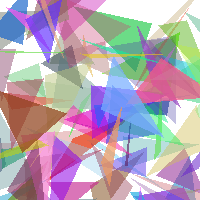

In [ ]:
# Programa que dado un tamaño de imagen y un individuo (lista de genes con sus 
# correspondientes atributos), genera la imagen del individuo.
# Author: Ka Fung.
# Date: 18-03-2021

def draw_polygon(img_size: tuple, individual: list) -> Image:
    ''' Program that given a size of the individual (img_size), a list of 
        parameters (individual), generates an image with the size img_size and 
        each gene (polygon) of the individual.
        Pillow Reference: https://pillow.readthedocs.io/en/3.1.x/reference/ImageDraw.html

        Args:
            img_size: tuple (x,y).
            individual: list of genes (polygons).

        Return:
            img: Image.
    '''
    # Preconditions
    assert isinstance(img_size[0], int) and isinstance(img_size[1], int), "The size of the individual (width and length) must be greater than 0"

    # Make a blank image
    img = Image.new("RGB", img_size, "white")

    # Draw each gene (polygon) in the blank image
    for gen in individual: 
        img1 = ImageDraw.Draw(img,"RGBA")
        img1.polygon(gen[0], fill=gen[1]) 
    
    return img

# tests
img_size = (200, 200)             # Tamaño de la imagen
n = 100                           # Número de genes (polígonos)
ind = individual(n, img_size, 3)  # Creo un individuo aleatorio (triángulos)
img = draw_polygon(img_size, ind)  # Creo el dibujo del individuo
display(img)                      # Muestro en pantalla el dibujo

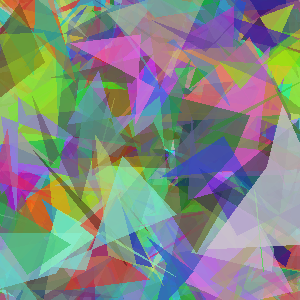

In [ ]:
# Programa que dado la imagen de un individuo y su nombre, guarda la imagen 
# con su respectivo nombre y lo muestra en pantalla.
# Author: Ka Fung.
# Date: 18-03-2021

def display_draw(img: Image, name: str) -> None:
    ''' Program that, given an image and a name, saves the image and displays it 
        on the screen.
        Pillow Reference: https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

        Args:
            img: Image (PIL.Image.Image)
            name: str (image name)
            
        Return:
            None
    '''
    # Preconditions
    assert isinstance(name, str), "Name must be a string"

    if not name.lower().endswith('.png'):
        name += '.png'
    img.save(name)
    display(ipd(name))

# tests
img_size = (300, 300)             # Tamaño de la imagen
n = 2000                          # Número de genes (polígonos)
ind = individual(n, img_size,4)   # Creación de un individuo random (con cuadriláteros)
img = draw_polygon(img_size, ind) # Creación de la imagen
display_draw(img, "pepe")         # En la carpeta del lado izquierdo se pueden ver los archivos descargados.

## Operador Genético de Cruce (Crossover)
> Crossover es un operador genético que combina (empareja) dos cromosomas (padres) para producir un nuevo cromosoma (descendencia). La idea detrás del cruce es que el nuevo cromosoma puede ser mejor que ambos padres si toma las mejores características de cada uno de los padres. En este caso, utilizaremos el cruce basado en un punto.

In [ ]:
# Operación de cruce basado en un punto
# Programa que dado dos individuos, se crea un nuevo individuo. El nuevo individuo
# es la partición del primer individuo hasta una posición aleatoria + la partición del
# segundo individuo desde la posición aleatoria hasta el final.
# Author: Ka Fung.
# Date: 19-03-2021

# Single point Crossover
def single_crossover(ind1: list, ind2: list)->list:
    ''' One crossover point is selected , string from beginning of chromosome to
        the crossover point is copied from one parent , the rest is copied from 
        the second parent. 

        Args:
            ind1, ind2: list of genes (polygons).

        Return:
            A new individual (list of genes (polygons)).
    '''
    # Preconditions
    assert len(ind1) == len(ind2) and len(ind1)>0, "The size of the individuals must be equal to each other and greater than 0"
    
    # Crossover point is randomly generated
    point = rint(0, len(ind1))

    one_ind = ind1[:point] + ind2[point:] # one_ind = [ind1[i] for i in range(point+1)] + [ind2[i] for i in range(point+1, len(ind1))]  
    two_ind = ind2[:point] + ind1[point:] # two_ind = [ind2[i] for i in range(point+1)] + [ind1[i] for i in range(point+1, len(ind1))]
       
    # Postconditions
    # assert all(one_ind[i]==ind1[i] for i in range(point)) and all(one_ind[i+point]==ind2[i+point] for i in range(point, len(ind1))) 
    # assert all(two_ind[i]==ind2[i] for i in range(point)) and all(two_ind[i+point]==ind1[i+point] for i in range(point, len(ind1)))
    
    # Let's return one of the children
    return rsample([one_ind, two_ind], 1)[0] # Watch out! rsample returns the element inside []

# tests
ind1 = [[[(309, 338), (210, 115), (341, 175)], (241, 63, 12, 48)], [[(304, 243), (308, 108), (102, 46)], (72, 81, 49, 187)]]
ind2 = [[[(172, 307), (28, 94), (293, 274)], (180, 67, 151, 44)], [[(96, 59), (194, 323), (279, 147)], (223, 57, 114, 242)]]
print(single_crossover(ind1, ind2))
# [[[(309, 338), (210, 115), (341, 175)], (241, 63, 12, 48)], [[(304, 243), (308, 108), (102, 46)], (72, 81, 49, 187)]] o
# [[[(309, 338), (210, 115), (341, 175)], (241, 63, 12, 48)], [[(96, 59), (194, 323), (279, 147)], (223, 57, 114, 242)]] o
# [[[(172, 307), (28, 94), (293, 274)], (180, 67, 151, 44)], [[(96, 59), (194, 323), (279, 147)], (223, 57, 114, 242)]] o
# [[[(172, 307), (28, 94), (293, 274)], (180, 67, 151, 44)], [[(304, 243), (308, 108), (102, 46)], (72, 81, 49, 187)]]

[[[(309, 338), (210, 115), (341, 175)], (241, 63, 12, 48)], [[(96, 59), (194, 323), (279, 147)], (223, 57, 114, 242)]]


## Operador Genético de Mutación 
> La mutación es un operador genético que altera uno o más valores genéticos en un cromosoma desde su estado inicial. Esto puede resultar en la adición de valores genéticos completamente nuevos al acervo genético. Para esta ocasión, se cambiará los genes de un individuo si cae en la probabilidad dada. Los cambios serán modificaciones pequeñas al gen original.




In [ ]:
# Programa que dado el tamaño del individuo (tamaño de la imagen), el individuo y
# la probabilidad de mutación, cambia los genes del individuo.
# Author: Ka Fung.
# Date: 18-03-2021

def mutate(ind: list, mut_prob: int, img_size: tuple)->list:
    ''' Program that given the size of the individual (size of the image), a 
        individual and the probability of mutation, the individual's gene is 
        slightly changed.

        Args:
            ind: list of genes (polygons).
            mut_prob: int (probability of mutation).
            img_size: int (image size of the individual)

        Return:
            A mutated individual (list of genes (polygons)).
    '''
    # Preconditions
    assert mut_prob <= 1, "The mutation probability must be a number between [0.0, 1.0]"
    assert isinstance(img_size[0], int) and isinstance(img_size[1], int), "The size of the individual (width and length) must be greater than 0"

    mut_ind = []
    num_vert = len(ind[0][0])   # Get the number of vertices

    for gene in ind:
        # If a random number is below probability, change the gene a bit.
        if rrandom() < mut_prob:
            # Obtain a range number to modify the vertices (we will take 10% of the width and height)
            #w, h = img_size[0]//10, img_size[1]//10
            w, h = 10, 10

            # Change vertices of the polygon, gene[get vertices][get a vertex][get x or y coord]
            mut_vert = [(gene[0][i][0]+rint(-w,w), gene[0][i][1]+rint(-h,h)) for i in range(num_vert)]
            
            # Change color, be careful, RGBA are values ​​between 0 to 255
            mut_color = ((gene[1][0]+rint(-10,10))%255, (gene[1][1]+rint(-10,10))%255, 
                         (gene[1][2]+rint(-10,10))%255, (gene[1][3]+rint(-10,10))%255)
            
            mut_ind.append([mut_vert, mut_color])
        else:
            mut_ind.append(gene)

    return mut_ind 

# tests
img_size = (100, 100)
ind = [[[(309, 338), (210, 115), (341, 175)], (255, 63, 12, 48)], [[(304, 243), (308, 108), (102, 46)], (72, 81, 49, 187)]]
mut_prob = 0.5 # Probabilidad alta, probablemente cambie la mitad de los genes
print(mutate(ind, mut_prob, img_size))

mut_prob = 0.01 # Probabilidad baja, probablemente no cambie algun gen
print(mutate(ind, mut_prob, img_size))

[[[(302, 339), (211, 108), (340, 180)], (10, 72, 8, 57)], [[(306, 234), (305, 108), (96, 56)], (76, 84, 59, 178)]]
[[[(309, 338), (210, 115), (341, 175)], (255, 63, 12, 48)], [[(304, 243), (308, 108), (102, 46)], (72, 81, 49, 187)]]


## Aptitud (Fitness)
> La función de aptitud (también conocida como función objetivo) evalúa qué tan cerca está una solución dada de la solución óptima del problema deseado. Para esta ocasión, queremos maximizar las soluciones. Si el individuo tiene un fitness de 100, esto quiere decir que es la solución óptima. Si tiene un fitness de 0, es la peor solución.

**Nota:** La versión anterior de fitness() (primera entrega), utilizaba el método getpixel() para obtener cada pixel, lo cual necesitaba dos loops. En cambio, con getdata() los componentes RGB son guardados directamente en una lista y sólo necesita un loop. Se comparó el tiempo de ambas versiones y se prefirió utilizar getdata()

In [ ]:
# Programa que calcula la aptitud de un individuo, comparandolo con la referencia.
# Mientras mayor sea la aptitud, tiene mayor similitud a la referencia.
# Author: Ka Fung.
# Date: 18-03-2021

def fitness(reference: Image, img_ind: Image) -> int:
    ''' Program that determine the individual's fitness.
        Sum up the difference between the pixel values ​​of the reference image 
        and the current individual. Calculates the absolute value of the 
        difference and adds it to a total difference counter
        Pillow Source:  https://www.geeksforgeeks.org/python-pil-getpixel-method/
                        https://www.geeksforgeeks.org/python-pil-image-getdata/

        Args:
            reference: Image
            img_ind: Image
        
        Return:
            The fitness of an individual (greater fitness, greater similarity)
    '''
    # Preconditions
    assert (reference.size)[0]==(img_ind.size)[0] and (reference.size)[1]==(img_ind.size)[1], "The size of the images must be the same"

    width, height = reference.size
    
    diff_pixel = 0
    # Get all bands (RGB) and calculate difference
    data_ref = list(reference.getdata())
    data_ind = list(img_ind.getdata())
    for i in range(len(data_ref)):
        diff_pixel += (abs(data_ref[i][0]-data_ind[i][0]) + abs(data_ref[i][1]-data_ind[i][1]) + abs(data_ref[i][2]-data_ind[i][2])) # Absoluto de las diferencias
        #diff_pixel += ((data_ref[i][0]-data_ind[i][0])**2 + (data_ref[i][1]-data_ind[i][1])**2 + (data_ref[i][2]-data_ind[i][2])**2)    # Cuadrado de las diferencias

    # Calculate % of fitness
    max_diff_pixel = (3*255)*width*height       # Si se calcula el absoluto de cada diferencia 
    #max_diff_pixel = 3*((255)**2)*width*height  # Si se calcula el cuadrado de cada diferencias
    percentage_fitness = 100 - (diff_pixel*100)/max_diff_pixel
    
    return round(percentage_fitness, 4)

# tests
# Prueba con un dibujo de Mario y un individuo random
ref = "mario.png"                   # Nombre de la imagen de referencia
ref_open = Image.open(ref)          # Abrimos la imagen
img_size = ref_open.size            # Tamaño de la imagen de referencia

n = 100                             # Número de genes (polígonos)
nv = 3                              # Número de vértices del polígono
ind = individual(n, img_size, nv)   # Creo un individuo random con el tamaño de la referencia
img = draw_polygon(img_size, ind)    # Dibujo el individuo random

print(fitness(ref_open, img))       #  % (un número random)
print(fitness(ref_open, ref_open))  # 100.0 % (ya que estamos comparando la misma imagen)
#display_draw(img,"pepe")
#display(ipd("mario.png"))

# Prueba con un dibujo en blanco y un dibujo en negro
white = Image.new("RGB", img_size, "white")
black = Image.new("RGB", img_size, "black")
print(fitness(white, black))        # 0.0 % (No tienen ninguna similitud)

62.2667
100.0
0.0


## Operador Selección
> La selección es el proceso de evaluar la aptitud de los miembros de la población y seleccionar qué individuos pueden reproducirse. Para esta ocasión, implementaremos dos métodos de selección:


1.   Selección por ruleta: a cada individuo de la población se le asigna una parte proporcional a su ajuste de una ruleta, de tal forma que la suma de todos los porcentajes sea la unidad. Los mejores individuos recibirán una porción de la ruleta mayor que la recibida por los peores. 
2.   Selección por torneo (determinista): se realizan varios "torneos" entre algunos individuos escogidos al azar de la población. El ganador de cada torneo es el seleccionado para el cruce. Para esta implementación, un individuo puede participar en varios torneos.





In [ ]:
# Rank population (función utilizada en las siguientes funciones)
# Programa que calcula la aptitud de cada individuo de la población, y los 
# ordena de manera descendente según su aptitud.
# Author: Ka Fung.
# Date: 18-03-2021

def rank_population(reference: Image, population: list) -> list:
    ''' Program that, given a population, orders them according to their fitness
        in descending order.

        Args:
            reference: reference image
            population: list of individuals 

        Return:
            A list of individuals with their fitness [(fitness, individual), (fitness, individual)...].
    '''
    # Preconditions
    assert len(population)>0, "The population number must be greater than 0"

    # Calculate the fitness of each individual in the population
    img_size = reference.size
    fits = []
    for ind in population:
        img = draw_polygon(img_size, ind)
        fit = fitness(reference, img)
        fits.append((fit, ind)) # Add a tuple (individual fitness, individual) in fits

    # Sort each individual according to their fitness 
    fits = [i for i in sorted(fits, reverse=True)] 

    # Postconditions
    assert len(population)==len(fits), "Postcondition is false"

    return fits # Return fitness with the individual

# tests
ref = "mario.png"                   # Nombre de la imagen de referencia
ref_open = Image.open(ref)          # Abrimos la imagen de referencia
img_size = ref_open.size            # Tamaño de la imagen de referencia

# Creamos una población random:
n = 100                             # Número de genes (polígonos)
nv = 3                              # Número de vértices del polígono
nro_pop = 4                         # Número de individuos en una población
pop = [individual(n, img_size, nv) for i in range(nro_pop)]
rankeados = rank_population(ref_open, pop)  # Realizamos un ranking de la población
print(rankeados)
print(f'Fitness del primer individuo luego del ranking: {rankeados[0][0]}')
print(f'Fitness del último individuo luego del ranking: {rankeados[-1][0]}')

[(71.8118, [[[(46, 177), (143, 92), (21, 111)], (222, 105, 18, 134)], [[(181, 201), (197, 146), (217, 130)], (131, 93, 164, 153)], [[(157, 69), (232, -33), (191, -23)], (31, 35, 44, 155)], [[(226, 142), (315, 224), (301, 263)], (129, 164, 172, 143)], [[(242, 232), (304, 131), (224, 191)], (115, 88, 211, 83)], [[(178, 138), (242, 202), (107, 214)], (247, 223, 79, 101)], [[(276, 323), (331, 231), (335, 222)], (37, 156, 166, 172)], [[(194, 15), (226, 41), (219, 98)], (218, 215, 23, 83)], [[(124, 147), (-11, 209), (57, 184)], (217, 205, 150, 190)], [[(334, 81), (241, -1), (270, 7)], (91, 38, 170, 90)], [[(110, -28), (86, 63), (132, -13)], (184, 149, 189, 140)], [[(62, 166), (64, 167), (92, 32)], (85, 135, 110, 109)], [[(150, 197), (180, 280), (248, 215)], (60, 137, 67, 126)], [[(105, 273), (90, 227), (64, 166)], (196, 200, 74, 85)], [[(202, 257), (116, 178), (151, 258)], (1, 37, 193, 185)], [[(-27, -33), (64, 68), (5, -57)], (206, 73, 27, 189)], [[(284, 199), (212, 157), (275, 197)], (108,

**Nota:** Las versiones viejas de roulette() y tournament() no recibían como parámetros rank_pop (lista de individuos con sus fitness), recibía la población (sólo los individuos sin sus fitness). Dentro de las dos funciones se calculaba el fitness de cada individuo. Pero luego de notar que en el programa principal generate() es necesario calcular el fitness de cada individuo (para buscar el mejor y elegir los que se quedan en las siguientes generaciones(elitismo)), se prefirió modificar ambas funciones para que recibieran rank_pop y así evitar realizar el cálculo nuevamente.

In [ ]:
# Método de la ruleta
# Programa que dado una población de individuos, cada individuo tiene una 
# probabilidad de ser seleccionado según su fitness. A mayor fitness, mayor 
# probabilidad de ser escogido.
# Author: Ka Fung.
# Date: 22-03-2021

def roulette(reference: Image, rank_pop: list) -> list:
    ''' Program that given a population of individuals with their fitness, 
        calculates the probability that an individual has of being selected 
        according to their fitness.
        If fi is the fitness of individual i in the population, its probability 
        of being selected is pi = fi / (+j | 1<=j<=N : fj)
        Source: https://en.wikipedia.org/wiki/Fitness_proportionate_selection

        Args:
            reference: reference image
            rank_pop: list of individuals with their fitness [(fitness, individual), (fitness, individual)...].

        Return:
            A list of selected individuals (mating pool).
    '''
    # Preconditions
    assert len(rank_pop)>0, "The population must have at least one individual"
    
    # Probability of being selected pi = fi / sum(fj for j in range(N)), fi is the fitness of individual i.
    num_ind = len(rank_pop)                                       # Total individuals
    sum_of_fitness = sum(rank_pop[j][0] for j in range(num_ind))  # Total sum of fitness
    previous_probability = 0.0                                    # Cumulative probability
    prob = [] # prob es una lista como: [0.2480597308183515, 0.49792055539181973, 0.748862036218358, 1.0] donde 1.0 es el que tenga mejor fitness

    # Calculate the probability of each individual, starting with the worst fitness
    for i in range(num_ind-1, -1, -1):
        p = previous_probability + rank_pop[i][0]/sum_of_fitness 
        prob.append(p)
        previous_probability = p
    
    selected = []
    # Choose the same number of individuals as the original population
    for i in range(num_ind):
        # Take a random number between [0.0, 1.0) and select an individual, var j will be the position of the selected
        # Example: if the random number is between prob[j] and prob[j+1], select prob[j+1]
        random_number, j = rrandom(), 0 
        while prob[j] < random_number:
            j+=1
        # Remember that rank_pop list is in descending order. We only want the individual (without the fitness)
        selected.append(rank_pop[num_ind-1-j][1])

    # Postconditions
    assert len(rank_pop)==len(selected), "Postcondition is false"

    return selected

# tests
ref = "mario.png"                   # Nombre de la imagen de referencia
ref_open = Image.open(ref)          # Abrimos la imagen de referencia
img_size = ref_open.size            # Tamaño de la imagen de referencia
# Creamos una población random, de 100 genes y 4 individuos
n = 2                               # Número de genes (polígonos)
nv = 3                              # Número de vértices del polígono
nro_pop = 4                         # Número de la población
pop = [individual(n, img_size, nv) for i in range(nro_pop)]
rank_pop = rank_population(ref_open, pop) # Sort the population with their fitness
print(roulette(ref_open, rank_pop))

[[[[(149, 129), (91, 44), (168, 35)], (25, 25, 249, 82)], [[(172, 181), (231, 161), (207, 68)], (148, 99, 166, 108)]], [[[(210, -37), (178, 3), (191, 79)], (229, 197, 56, 93)], [[(173, 217), (133, 157), (257, 239)], (208, 151, 27, 84)]], [[[(162, 211), (77, 118), (80, 87)], (101, 175, 43, 183)], [[(113, 93), (88, 82), (31, 29)], (143, 227, 221, 97)]], [[[(81, 42), (-18, 38), (-7, 92)], (84, 238, 54, 97)], [[(192, 268), (167, 255), (176, 258)], (243, 185, 54, 152)]]]


In [ ]:
# Método de torneo (determinista)
# Programa que dado una población de individuos, se establecen grupos aleatorios 
# de individuos. Los individuos de un grupo compiten en aptitud, el ganador 
# (en este caso, mayor fitness) será seleccionado.
# Author: Ka Fung.
# Date: 20-03-2021

def tournament(reference: Image, rank_pop: list, k: int)->list:
    ''' Program that given a population, several "tournaments" are carried out 
        among some k individuals chosen at random from the population. 
        The winner of each tournament (best fitness) is selected.

        Args:
            reference: Image
            rank_pop: list of individuals with their fitness
            k: int (tournament size, individuals from the population at random).
                When k = 1, selection is equivalent to random selection.

        Return:
            A list of selected individuals (mating pool).
    '''
    # Preconditions
    assert k>=1 and len(rank_pop)>0, "The size of the population must be greater than 0 and the tournaments must have at least one participant"
    
    selected = [] 
    for p in range(len(rank_pop)):
        competitors = rsample(rank_pop, k)  # Choose k competitors
        winner, best_fit = None, 0          # Initialize winner and best fitness
        for ind in competitors:             # Check who is the best individual
            if ind[0] > best_fit:
                winner, best_fit = ind[1], ind[0]
        selected.append(winner)             # Add the winner in selected list
        # También se puede evitar el anterior loop con selected.append(max(competitors[1])). 
        # Pero por lo que vi, tarda casi lo mismo (?)
        
    # Postconditions
    assert len(rank_pop)==len(selected), "Postcondition is false"

    return selected

# tests
ref = "mario.png"                   # Nombre de la imagen de referencia
ref_open = Image.open(ref)          # Abrimos la imagen de referencia
img_size = ref_open.size            # Tamaño de la imagen de referencia
k = 2                               # Batallazo de parejas
# Creamos una población random:
n = 2                               # Número de genes (polígonos)
nv = 3                              # Número de vértices del polígono
nro_pop = 4                         # Número de individuos de una población
pop = [individual(n, img_size, nv) for i in range(nro_pop)]
rank_pop = rank_population(ref_open, pop) # Sort the population with their fitness
print(tournament(ref_open, rank_pop, k))

[[[[(235, 14), (284, -4), (192, -15)], (235, 36, 230, 82)], [[(338, 58), (280, 24), (217, 6)], (115, 69, 25, 92)]], [[[(235, 14), (284, -4), (192, -15)], (235, 36, 230, 82)], [[(338, 58), (280, 24), (217, 6)], (115, 69, 25, 92)]], [[[(18, 19), (-45, 32), (-58, -36)], (97, 193, 246, 84)], [[(123, 163), (123, 170), (91, 128)], (162, 145, 176, 160)]], [[[(18, 19), (-45, 32), (-58, -36)], (97, 193, 246, 84)], [[(123, 163), (123, 170), (91, 128)], (162, 145, 176, 160)]]]


## Gráfica de las aptitudes (mejor y promedio) por generación

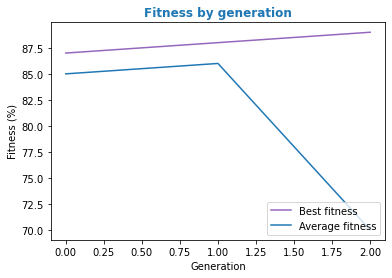

In [ ]:
# Gráfica de las aptitudes por generación 
# Programa que dado una lista de las aptitudes de los mejores individuos y el
# promedio de aptitud de los individuos por generación, realiza una gráfica de  
# convergencia y lo guarda dicha gráfica.
# Author: Ka Fung.
# Date: 30-03-2021

def plot_fitness(best_fit: list, avg_fit: list, filename: str):
    ''' Program that given a list of the fitness of the best individuals and the
        average fitness of the individuals of each generation, makes a graph of
        convergence.

        Args:
            best_fit: fitness lists of the best individuals.
            avg_fit: list of fitness averages of each generation.
            filename: str, plot name.
        
        Return:
            None.
    '''
    # Preconditions
    assert len(best_fit)>0 and len(avg_fit)>0, "The size of the fitness lists must be greater than 0"

    # Plotting
    x = range(len(best_fit))
    fig, ax = plt.subplots()                                                    # Create the figure and axes
    ax.plot(x, best_fit, color = 'tab:purple', label="Best fitness")            # Plot best fitness individual
    ax.plot(x, avg_fit, color = 'tab:blue', label="Average fitness")            # Plot average fitness
    ax.legend(loc = 'lower right')                                              # Plot legend
    ax.set_xlabel("Generation")                                                 # x axis title
    ax.set_ylabel("Fitness (%)")                                                # y axis title
    ax.set_title("Fitness by generation", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'}) # Title plot
    plt.savefig(f'plot-{filename}')                                             # Save plot in png format
    plt.show()                                                                  # Show plot

# tests
best_fit = [87, 88, 89]
avg_fit = [85, 86, 70]
plot_fitness(best_fit, avg_fit, "plot_test")

# Implementación del algoritmo genético

> **Nota:** La implementación de este algoritmo genético guarda la imagen del individuo y su gráfica por cada 100 generaciones. También, si se desea sobreescribir la anterior imagen, habría que cambiar el nombre del archivo cuando se guarde. Para los intentos realizados (revisar en la sección de Intentos), se comentaron (#) las precondiciones y postcondiciones para ejecutar el código un poco más rápido.





Image has been downloaded successfully perla.png
Image has been successfully resized: resize-perla.png


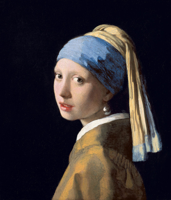

Generation 0, best fitness: 63.8655%, population average: 61.2891%


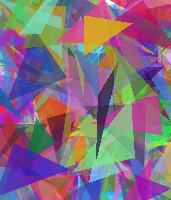

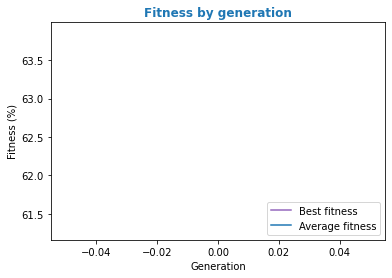

Generation 1, best fitness: 64.2448%, population average: 62.5828%
Generation 2, best fitness: 64.5377%, population average: 63.7388%
Generation 3, best fitness: 64.6459%, population average: 64.245%
Generation 4, best fitness: 64.9569%, population average: 64.34%
Generation 5, best fitness: 65.0742%, population average: 64.5118%
Generation 6, best fitness: 65.2751%, population average: 64.7983%
Generation 7, best fitness: 65.5478%, population average: 64.9734%
Generation 8, best fitness: 65.9546%, population average: 65.3075%
Generation 9, best fitness: 66.0568%, population average: 65.6192%
Generation 10, best fitness: 66.328%, population average: 65.7984%
Generation 11, best fitness: 66.4084%, population average: 65.9539%
Generation 12, best fitness: 66.4363%, population average: 66.1596%
Generation 13, best fitness: 66.8531%, population average: 66.3148%
Generation 14, best fitness: 67.0668%, population average: 66.5928%
Generation 15, best fitness: 67.0934%, population average: 66

KeyboardInterrupt: ignored

In [ ]:
# Algoritmo genético 
# Programa que dado una imagen de referencia, se busca evolucionar una población 
# aleatoria de individuos, sometiéndola a acciones aleatorias semejantes a las 
# que actúan en la evolución biológica (cruce, mutación, selección) al punto de
# que luego de n generaciones la población tenga similitud a la referencia.
# Author: Ka Fung.
# Date: 19-03-2021

def generate(filename:str, num_vert: int, num_genes:int, num_ind:int, num_generation:int, mut_prob:float, sel_method: str, num_tourn: int=4, num_elitism: int=5):
    ''' Program that, given a reference image, seeks to evolve a population
        random of polygons, subjecting it to random actions similar to those
        that act in biological evolution (crossing, mutation, selection) to the 
        point of that after n generations the population has similarity to the 
        reference.

        Args:
            filename: string (image name)
            num_vert: int (number of vertices of a polygon)
            num_genes: int (number of genes)
            num_ind: int (number of individuals)
            num_generation: int (number of generations)
            mut_prob: float (Mutation probability)
            sel_type: str (selection method)
            num_tourn: int (number of individuals per competition, this variable
                       is used if the selection method is by tournament)
            num_elitism: int (number of individuals that we will keep in each generation)
            
        Return:
            None
    '''
    # Preconditions
    assert isinstance(filename, str), "Filename must be a string"
    assert num_vert>2, "The number of vertices must be greater than 2"
    assert num_genes>0 and num_ind>0 and num_generation>0, "The number of genes, individuals and generations must be greater than 0"
    assert 0.0<=mut_prob<=1.0, "The probability of mutation must be in a range of [0.0, 1.0]"
    assert sel_method=="r" or sel_method=="t", "Selection method must be 'r' (Roulette Wheel) or 't' (Tournament)"
    assert 0<num_tourn<=num_ind, "The number of individuals per tournament must be greater than 0 and less than the number of individuals in the population"
    assert 0<=num_elitism<=num_ind, "The number of individuals conserved in each generation must be greater than or equal to 0 and less than or equal to the number of individuals per generation."

    # Reference image
    if not filename.lower().endswith('.png'):
        filename += '.png'
    reference = Image.open(filename)
    img_size = reference.size
    display(reference)

    # Randomly generate a population of individuals.
    population = [individual(num_genes, img_size, num_vert) for i in range(num_ind)] 
    plot_best_fit = []
    plot_avg_fit = []
    
    # Iterate for each generation
    for g in range(num_generation):
        # Measure the fitness of all of the individuals and sort them by fitness.
        rank_fit_pop = rank_population(reference, population)   # This is a list of [(fitness, individual),...]
        
        # Calculate the average fitness of the population
        avg_fit = round(sum(rank_fit_pop[ind][0] for ind in range(len(rank_fit_pop))) / len(rank_fit_pop), 4)

        # Save best fitness and average fitness, for plotting
        plot_best_fit.append(rank_fit_pop[0][0])
        plot_avg_fit.append(avg_fit)

        # Print generation number, best fitness, and average fitness in the population
        print(f'Generation {g}, best fitness: {rank_fit_pop[0][0]}%, population average: {avg_fit}%')

        # Draw the best individual in the population for every 100 generations
        if g%100==0:
            best_draw = draw_polygon(img_size, rank_fit_pop[0][1])
            #display(best_draw)                                           # Display (without saving image)
            display_draw(best_draw, f'{g}-{filename}')                    # Display and save image
            plot_fitness(plot_best_fit, plot_avg_fit, f'{g}-{filename}')  # Plot

        # Selection: Determine which individuals should reproduce to make the next generation of individuals (mating pool)
        if sel_method == "r":                                 # Roulette Wheel Selection
            mat_pool = roulette(reference, rank_fit_pop)
        elif sel_method == "t":                               # Tournament Selection
            mat_pool = tournament(reference, rank_fit_pop, num_tourn)      

        # Elitism: Select the most fit to succeed to the next generation.
        new_gen = [rank_fit_pop[i][1] for i in range(num_elitism)]

        # Crossover and mutation: Reproduce enough children to repopulate the next generation.
        for child in range(num_ind - num_elitism):
            parents = rsample(mat_pool, 2)                    # Choose parents randomly  
            while parents[0]==parents[1]:                     # Make sure to choose different individuals from the mating pool
                parents = rsample(mat_pool, 2)
            child = single_crossover(parents[0], parents[1])  # Crossover
            new_gen.append(mutate(child, mut_prob, img_size)) # Mutation

        # Update the population
        population = new_gen 

        # Check that the population number is maintained in each generation
        #assert len(population) == num_ind, "The number of the population increased or decreased"

    # Last generation
    last_rank = rank_population(reference, population)
    last_draw = draw_polygon(img_size, last_rank[0][1])
    last_avg_fit = round(sum(last_rank[ind][0] for ind in range(len(last_rank))) / len(last_rank), 4)
    print(f'Generation {num_generation}, best fitness: {last_rank[0][0]}%, population average: {last_avg_fit}%')
    display_draw(last_draw, f'{num_generation}-{filename}')
    plot_best_fit.append(last_rank[0][0])
    plot_avg_fit.append(avg_fit)
    plot_fitness(plot_best_fit, plot_avg_fit, f'{num_generation}-{filename}')
    

# tests
#url = "https://dcw9y8se13llu.cloudfront.net/avatars/raika125.jpg"
#filename = download_img(url, "mario.png")              # Nombre de la imagen de referencia: Mario
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Meisje_met_de_parel.jpg/1200px-Meisje_met_de_parel.jpg"
filename = download_img(url, "perla.png")            # Nombre de la imagen de referencia: La joven de la perla - Johannes Vermeer
#url = "https://upload.wikimedia.org/wikipedia/en/b/b2/Lorde_-_Melodrama.png"
#filename = download_img(url, "lorde.png")            # Nombre de la imagen de referencia: Lorde-Melodrama

resize = resize_img((200,200), filename)  # Modificamos el tamaño de la imagen
num_vert = 3                              # Número de vértices del polígono
num_genes = 500                           # Número de polígonos por individuo (genes)
num_ind = 20                              # Número de individuos por generación
num_generation = 10000                    # Número de generaciones
mut_prob = 0.1                            # Probabilidad de mutación
selection = "t"                           # Método de selección ("r" si es por ruleta, "t" si es por torneo)
num_tourn = 4                             # Número de individuos por competencia (esta variable sólo se usa si el método es por torneo)
num_elitism = 5                           # Número de individuos (los mejores) que se mantienen en cada generación 
generate(resize, num_vert, num_genes, num_ind, num_generation, mut_prob, selection, num_tourn, num_elitism)

## Versión con Interact (necesita ser mejorada)

In [ ]:
url = "https://dcw9y8se13llu.cloudfront.net/avatars/raika125.jpg"
filename = download_img(url, "mario.png") # Nombre de la imagen de referencia: Mario
resize = resize_img((200,200), filename)  # Modificamos el tamaño de la imagen

# Using Interact
ref_img = widgets.Text(value="resize-mario.png", placeholder="URL", description="Reference image: ")
vert = widgets.IntSlider(min=2, max=10, value=3, description="N° vertices")                    
genes = widgets.IntSlider(min=100, max=10000, value=500, description="N° genes")    
ind = widgets.IntSlider(min=10, max=100, value=20, description="N° individuals per generation")
generation = widgets.IntSlider(min=1, max=10000, value=5000, description="N° generations")     
mut = widgets.FloatSlider(min=0.0, max=1.0, value=0.1, description="Mutation probability")            
sel = widgets.Text(value="t", placeholder="t or r", description="Selection method")                   
tourn = widgets.IntSlider(min=2, max=10, value=4, description="N° ind per tournament")
elitism = widgets.IntSlider(min=1, max=10, value=5, description="Elitism")
interact_manual(generate, filename=ref_img, num_vert=vert, num_genes=genes, num_ind=ind, num_generation=generation, 
                mut_prob=mut, sel_method=sel, num_tourn=tourn, num_elitism=elitism)

## Versión con entrada de datos

In [ ]:
# Algoritmo genético con entrada de datos.
# Programa que dado una imagen de referencia, se busca evolucionar una población 
# aleatoria de individuos, sometiéndola a acciones aleatorias semejantes a las 
# que actúan en la evolución biológica (cruce, mutación, selección) al punto de
# que luego de n generaciones la población tenga similitud a la referencia.
# Author: Ka Fung.
# Date: 28-03-2021

import sys

def generate_user():
    ''' Program that, given a reference image, seeks to evolve a population
        random of polygons, subjecting it to random actions similar to those
        that act in biological evolution (crossing, mutation, selection) to the 
        point of that after n generations the population has similarity to the 
        reference (Version with inputs).

        Args:
            None.
            
        Return:
            None.
    '''
    
    print("Hey! Let's make ✧ art ✧ with genetic algorithm.")

    # Image input
    while True:
        try:   
            name = input("Art title: ")         
            url = input("Image URL: ")
            img_name = download_img(url, name)
            assert img_name != None
            break
        except ValueError:
            print("There was an error in data entry, url and filename must be strings (ValueError). Try again")
        except KeyboardInterrupt:
            print("There was a keyboard interrupt (KeyboardInterrupt)")
            sys.exit()
        except AssertionError:
            print("Try again (AssertionError)")

    # Resize image
    while True:
        try:
            resize = input("Do you want to resize the image? (y/n): ")
            assert resize == "y" or resize == "n" or resize == "yes" or resize == "no"
            if resize=="y" or resize =="yes":
                width, height = input("Enter the width and length (separated by a space): ").split()
                img_name = resize_img((int(width),int(height)), name)
                assert img_name != None
            break
        except AssertionError:
            print("Try again (AssertionError)")
   
    # Configurations: Number of generations, individuals, genes, vertices
    while True:
        try:
            num_generation = int(input("Number of generations: "))
            assert num_generation>0
            num_ind = int(input("Number of individuals per generation: "))
            assert num_ind>0
            num_genes = int(input("Number of genes per individual: "))
            assert num_genes>0
            num_vert = int(input("Number of vertices of the polygon (gen): "))
            assert num_vert>0
            break
        except ValueError:
            print("There was an error in data entry (ValueError). Try again")
        except KeyboardInterrupt:
            print("There was a keyboard interrupt (KeyboardInterrupt)")
            sys.exit()
        except AssertionError:
            print("The number of genes, individuals and generations must be greater than 0.")
            print("Try again")
            break

    # Configurations: Mutation probability, selection method, number of individuals per tournament
    while True:
        try:
            mut_prob = float(input("Mutation probability between [0.0, 1.0]: "))
            assert 0.0<=mut_prob<=1.0
            sel_method = input("Selection method. Choose 'r' if you want Roulette Wheel or 't' if you want Tournament: ")
            assert sel_method == "r" or sel_method == "t"
            if sel_method == "t":
                num_tourn = int(input("Number of individuals per tournament: "))
                assert 0<num_tourn<=num_ind
            else:
                num_tourn = 1
            num_elitism = int(input("Number of individuals (the most fitness) that is maintained in each generation (elitism): "))
            assert 0<=num_elitism<=num_ind, "The number of individuals maintained in each generation must be greater than or equal to 0 and less than or equal to the number of individuals"
            break
        except ValueError:
            print("There was an error in data entry (ValueError). Try again")
        except KeyboardInterrupt:
            print("There was a keyboard interrupt (KeyboardInterrupt)")
            sys.exit()
        except AssertionError:
            print("The probability of mutation must be in a range of [0.0, 1.0].")
            print("Selection method must be 'r' (Roulette Wheel) or 't' (Tournament).")
            print("If you chose the tournament method, the number of individuals per tournament must be greater than 0 and less than the number of individuals in the population")
            print("Try again")  

    # Call function generate()
    try:
        generate(img_name, num_vert, num_genes, num_ind, num_generation, mut_prob, sel_method, num_tourn, num_elitism)
    except KeyboardInterrupt:
        print("There was a keyboard interrupt (KeyboardInterrupt)")
        sys.exit()

# tests
generate_user() # Problemas con esta función, no display todo bien (??)


# Intentos:

## Lorde - Melodrama
*  Primer intento (28-03-2021 1:42 am): 
    * Tamaño de la imagen 150x150
    * Número de vértices del polígono: 3
    * Número de genes: 300
    * Número de individuos: 20 
    * Número de generaciones: 5000
    * Probabilidad de mutación: 0.1
    * Método de selección: **torneo**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51078840457/in/dateposted-public/" title="lorde1"><img src="https://live.staticflickr.com/65535/51078840457_9faefcf1c8_c.jpg" width="800" height="270" alt="lorde1"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51078754251/in/dateposted-public/" title="lorde-gen1"><img src="https://live.staticflickr.com/65535/51078754251_540ee65747_c.jpg" width="800" height="369" alt="lorde-gen1"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


* Segundo intento (28-03-2021 11:04am): Comparando torneo y ruleta, ruleta tiene mayor variación en el promedio de las aptitudes de las población. Ejecutar por la selección ruleta resulta mucho más rápido que por torneo. Me di cuenta que estaba colocando mal el título del eje y de la gráfica t.t.

    * Tamaño de la imagen 150x150
    * Número de vértices del polígono: 3
    * Número de genes: 300
    * Número de individuos: 20 
    * Número de generaciones: 5000
    * Probabilidad de mutación: 0.1
    * Método de selección: **ruleta**


<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51079056037/in/dateposted-public/" title="lorde2"><img src="https://live.staticflickr.com/65535/51079056037_828aa4dfff_c.jpg" width="800" height="282" alt="lorde2"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51009776340/in/dateposted-public/" title="lorde-gen2"><img src="https://live.staticflickr.com/65535/51009776340_2bfab20f14_c.jpg" width="764" height="340" alt="lorde-gen2"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>




* Tercer intento (28-03-2021 4:11pm): 
    * Tamaño de la imagen 150x150
    * Número de vértices del polígono: 3
    * Número de genes: 300
    * Número de individuos: 20 
    * Número de generaciones: 10000
    * Probabilidad de mutación: 0.1
    * Método de selección: **ruleta**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51079842517/in/dateposted-public/" title="lorde3"><img src="https://live.staticflickr.com/65535/51079842517_b0b6f6c306_c.jpg" width="800" height="278" alt="lorde3"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51079053143/in/dateposted-public/" title="lorde-gen3"><img src="https://live.staticflickr.com/65535/51079053143_7588758292_z.jpg" width="640" height="356" alt="lorde-gen3"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

* Cuarto intento (29-03-2021 11:33pm): Lo dejé para que ejecutara 10000 generaciones, pero tristemente, GoogleColab se detuvo y no lo pude volver a conectar. Llegó hasta la generación 8657. 
Torneo llega a tardar demasiado cuando la imagen logra como un fitness de 80%, creo que es porque estoy haciendo torneos entre 4 individuos ()mayor selectividad. Cuando ya se logra individuos con mayores parecidos, al asegurarnos que tenemos que escoger dos padres distintos de la lista de padres seleccionados, tarda en verificar que cada gen de de los individuos son distintos.

    * Tamaño de la imagen 150x150
    * Número de vértices del polígono: 3
    * Número de genes: 300
    * Número de individuos: 20 
    * Número de generaciones: 10000 (se detuvo en la generación 8657)
    * Probabilidad de mutación: 0.1
    * Método de selección: **torneo**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51013739960/in/dateposted-public/" title="lorde4"><img src="https://live.staticflickr.com/65535/51013739960_efaee1eebb_c.jpg" width="800" height="294" alt="lorde4"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>



## La joven de la Perla - Johannes Vermeer


*   Primer intento (22-03-2021 04:20pm): 
    * Tamaño de la imagen: 100x100
    * Número de vértices del polígono: 3
    * Número de genes: 1000
    * Número de individuos: 30 
    * Número de generaciones: 4169 (Colab se detuvo)
    * Probabilidad de mutación: 0.1
    * Elitismo: 10 individuos
    * Método de selección: 1/3 de los mejores (sin probabilidad, error mío)
    *   Problemas: Salió horrible.
    *   Posibles soluciones: un milagro.




<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51063100778/in/dateposted-public/" title="segundointento"><img src="https://live.staticflickr.com/65535/51063100778_e22bb6815f_c.jpg" width="800" height="366" alt="segundointento"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

* Segundo intento (25-03-2021 02:46pm): **Modifiqué la función mutate()**, realizando una pequeña variación en los genes (la función vieja creaba un nuevo gen random).
    * Tamaño de la imagen 100x100
    * Número de vértices del polígono: 3
    * Número de genes: 1000
    * Número de individuos: 30 
    * Número de generaciones: 5050 (detenido manualmente)
    * Probabilidad de mutación: 0.1
    * Elitismo: 10 individuos
    * Método de selección: **torneo** (4personas)
    * Yeih salió más boneto

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51071660177/in/dateposted-public/" title="cuartointento"><img src="https://live.staticflickr.com/65535/51071660177_013c551788_c.jpg" width="800" height="292" alt="cuartointento"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


* Tercer intento (27-03-2021 02:48pm): 
    * Tamaño de la imagen 100x100
    * Número de vértices del polígono: 3
    * Número de genes: 1000
    * Número de individuos: 20 
    * Número de generaciones: 5000 
    * Probabilidad de mutación: 0.1
    * Elitismo: 6 individuos
    * Método de selección: **ruleta**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51007439195/in/dateposted-public/" title="perla3"><img src="https://live.staticflickr.com/65535/51007439195_14bb36aa7a_c.jpg" width="800" height="304" alt="perla3"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>



* Cuarto intento (30-03-2021 05:04pm): Prueba con menor número de genes y mayor tamaño de la imagen.
    * Tamaño de la imagen: 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 200
    * Número de individuos: 20 
    * Número de generaciones: 5000 ( GoogleColab murió en la generación 3100 )
    * Probabilidad de mutación: 0.1
    * Elitismo: individuos//3
    * Método de selección: **torneo** (3 individuos)


<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/50999767314/in/dateposted-public/" title="perla4"><img src="https://live.staticflickr.com/65535/50999767314_0d4b60fc7d_c.jpg" width="800" height="292" alt="perla4"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


* Quinto intento (30-03-2021 08:47pm): Prueba con menor número de genes y mayor tamaño de la imagen.
    * Tamaño de la imagen: 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 200
    * Número de individuos: 20 
    * Número de generaciones: 5000 
    * Probabilidad de mutación: 0.1
    * Elitismo: individuos//3
    * Método de selección: **ruleta**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51000070649/in/dateposted-public/" title="perla5"><img src="https://live.staticflickr.com/65535/51000070649_98ac0a0558_c.jpg" width="800" height="461" alt="perla5"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51000070534/in/dateposted-public/" title="perla5-gen"><img src="https://live.staticflickr.com/65535/51000070534_a6e48386d6_c.jpg" width="800" height="376" alt="perla5-gen"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


* Sexto intento (30-03-2021 11:42pm): 
    * Tamaño de la imagen: 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 200
    * Número de individuos: 20 
    * Número de generaciones: 5000 (esta vez si terminó :))
    * Probabilidad de mutación: 0.1
    * Elitismo: individuos//3
    * Método de selección: **torneo**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51016062015/in/dateposted-public/" title="perla6"><img src="https://live.staticflickr.com/65535/51016062015_13172f1017_c.jpg" width="800" height="478" alt="perla6"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51000318619/in/dateposted-public/" title="perla6-gen"><img src="https://live.staticflickr.com/65535/51000318619_4e63627b3c_c.jpg" width="730" height="399" alt="perla6-gen"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Mario
*  Primer intento (21-03-2021 18:38 pm): 
  * Tamaño de la imagen 100x100
  * Número de vértices del polígono: 3
  * Número de genes: 1000
  * Número de individuos: 20 
  * Número de generaciones: 5000
  * Probabilidad de mutación: 0.1
  * Elitismo: 6 individuos
  * Método de selección: 1/3 de los mejores (sin probabilidad, lo cuál ta mal)
  * Problemas: Luego de aprox 3000 generaciones el individuo mantiene su fenotipo. Además, los triángulos son muy grandes (tenía un desfase de rint(-width//2,width//2)), lo que dificulta pequeñas variaciones.
  * Posible solución: Aumento de la probabilidad de mutación, disminución del tamaño de los triángulos, aumento de la población y menor selectividad (permitir mayor diversidad).
  * El fitness que señala era la version vieja de fitness(), 174810900 convertido en porcentaje es 77.14%

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51061797963/in/dateposted-public/" title="primerintento"><img src="https://live.staticflickr.com/65535/51061797963_6ca9e7bb51_c.jpg" width="800" height="368" alt="primerintento"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*  Segundo intento (22-03-2021 18:38 pm): Esta vez hice un desfase de los polígonos de rint(-width//3,width//3)).
    * Tamaño de la imagen 100x100
    * Número de vértices del polígono: 3
    * Número de genes: 1000
    * Número de individuos: 20 
    * Número de generaciones: 4810 (detenido manualmente)
    * Probabilidad de mutación: 0.1
    * Elitismo: 6 individuos
    * Método de selección: **torneo** (4 individuos)
    * Problemas: Varía el fitness con mayor frecuencia que el anterior, pero es más lento al calcular cada generación. Falta mayor mutación (o variar poquito posiciones y colores ).
    * Posible solución: Aumento de la probabilidad de mutación, aumento de la población y probar con menos genes.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51064650401/in/dateposted-public/" title="tercerintento"><img src="https://live.staticflickr.com/65535/51064650401_37bab32c8e_c.jpg" width="800" height="363" alt="tercerintento"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*  Tercer intento (25-03-2021 23:08 pm):

    * Tamaño de la imagen 100x100
    * Número de vértices del polígono: 3
    * Número de genes: 1000
    * Número de individuos: 20 
    * Número de generaciones: 4519 (detenido manualmente)
    * Probabilidad de mutación: 0.1
    * Elitismo: 6 individuos
    * Método de selección: **ruleta**
    * Problemas: mayor variación del promedio de fitness de la población, comparado con el realizado por torneo.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51072812808/in/dateposted-public/" title="tercerintentomario"><img src="https://live.staticflickr.com/65535/51072812808_9484eb2f03_c.jpg" width="800" height="301" alt="tercerintentomario"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


*  Cuarto intento (26-03-2021 06:05 pm): Prueba con muchos menos genes y con la implementación del plot.
    * Tamaño de la imagen 100x100
    * Número de vértices del polígono: 3
    * Número de genes: 200
    * Número de individuos: 30 
    * Número de generaciones: 5000
    * Probabilidad de mutación: 0.1
    * Elitismo: 6 individuos
    * Método de selección: **torneo**  (4 individuos)

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51074513121/in/dateposted-public/" title="cuartointentomario"><img src="https://live.staticflickr.com/65535/51074513121_c67f1fa25b_c.jpg" width="800" height="288" alt="cuartointentomario"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*  Quinto intento (04-04-2021 04:19 pm):
    * Tamaño de la imagen 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 500
    * Número de individuos: 20 
    * Número de generaciones: 10000
    * Probabilidad de mutación: 0.1
    * Elitismo: 5 individuos
    * Método de selección: **torneo** (4 individuos)

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51094934177/in/dateposted-public/" title="mario5"><img src="https://live.staticflickr.com/65535/51094934177_526ab6c9fa_c.jpg" width="800" height="512" alt="mario5"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*  Sexto intento (04-04-2021 08:15 pm):
    * Tamaño de la imagen 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 500
    * Número de individuos: 20 
    * Número de generaciones: 10000
    * Probabilidad de mutación: 0.1
    * Elitismo: 5 individuos
    * Método de selección: **ruleta**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51095788308/in/dateposted-public/" title="mario6"><img src="https://live.staticflickr.com/65535/51095788308_59009d3521_c.jpg" width="800" height="512" alt="mario6"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Otros intentos:

## Starry Night- Van Gogh (01-04-2021 08:43pm)
* Url = https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/757px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
* Tamaño de la imagen 200x200
* Número de vértices del polígono: 3
* Número de genes: 1000
* Número de individuos: 20 
* Número de generaciones: 5000
* Probabilidad de mutación: 0.1
* Elitismo: 6 individuos
* Método de selección: **ruleta**
* Problemas: esta es una imagen muy difícil de "replicar", debido a los numerosos detalles (las estrellas, la luna, las casas) y los tonos de colores muy parecidos. Por ello, llega un punto en que entre cada generación no se percibe cambios significativos. Habría que probar con triángulos muchos más pequeños.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51088735996/in/dateposted-public/" title="starrynight"><img src="https://live.staticflickr.com/65535/51088735996_01fa7cb00c_c.jpg" width="740" height="619" alt="starrynight"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


## El hijo del hombre - Magritte (02-04-2021 04:30pm)
* Url: https://culturizando.com/wp-content/uploads/2017/02/Image2.png
* Tamaño de la imagen 200x200
* Número de vértices del polígono: 3
* Número de genes: 500
* Número de individuos: 50 
* Número de generaciones: 5000
* Probabilidad de mutación: 0.1
* Elitismo: 50//3 individuos
* Método de selección: **ruleta**
* Problemas: En este intento t.t se murió mi computadora y sólo pude rescatar las últimas imágenes de la última generación.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51091217790/in/dateposted-public/" title="elhijodelhombre"><img src="https://live.staticflickr.com/65535/51091217790_ffaf52e91c.jpg" width="383" height="500" alt="elhijodelhombre"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Keroppi (Sanrio) (02-04-2021 11:47pm)
* Url: https://i.ytimg.com/vi/xnM98sBca5I/maxresdefault.jpg
* Tamaño de la imagen 200x200
* Número de vértices del polígono: 3
* Número de genes: 200
* Número de individuos: 20 
* Número de generaciones: 5000
* Probabilidad de mutación: 0.1
* Elitismo: 6 individuos
* Método de selección: **torneo** (4 individuos)
* Problemas: Pobre sapito.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51091843274/in/dateposted-public/" title="keroppi"><img src="https://live.staticflickr.com/65535/51091843274_96bea0e867_c.jpg" width="800" height="426" alt="keroppi"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Starboy - The Weeknd (03-04-2021 02:09pm)
* Url: https://ep00.epimg.net/cultura/imagenes/2016/09/29/actualidad/1475162825_044876_1475170479_noticia_normal.jpg
* Tamaño de la imagen 200x200
* Número de vértices del polígono: 3
* Número de genes: 1000
* Número de individuos: 20 
* Número de generaciones: 2000
* Probabilidad de mutación: 0.1
* Elitismo: 6 individuos
* Método de selección: **ruleta** 
* Problemas: Está difícil que forme el rostro.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51092952353/in/dateposted-public/" title="starboy"><img src="https://live.staticflickr.com/65535/51092952353_93eb04265e_z.jpg" width="640" height="538" alt="starboy"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


## Melody (Sanrio) (05-04-2021 02:46pm)
* Url: https://pbs.twimg.com/media/EU0Kj4mXsAASpnG?format=jpg&name=small
* Tamaño de la imagen 200x200
* Número de vértices del polígono: 3
* Número de genes: 500
* Número de individuos: 20 
* Número de generaciones: 10000
* Probabilidad de mutación: 0.1
* Elitismo: 5 individuos
* Método de selección: **ruleta** 
* Problemas: My melody :(.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51097156884/in/dateposted-public/" title="melody"><img src="https://live.staticflickr.com/65535/51097156884_fc863d9958_c.jpg" width="800" height="512" alt="melody"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

La siguiente prueba fue con una función de aptitud distinta. En vez de calcular el valor absoluto de cada diferencia, se calculó el cuadrado de las diferencias. Me había percatado que en la página de https://chriscummins.cc/s/genetics/, realizaba el cuadrado de las diferencias y que cuando se comenzaba a generar la imagen tenía un fitness alto. Luego de probarlo con mi código y un método de selección por **torneo** (4 individuos por torneo) también noté que la primera generación tenía un fitness alto (comparado con la funcion fitness que calcula con valor absoluto). Formó el rostro pero luego se estancó (quizás es suerte o es la función...aún por descubrirlo).
<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51097793789/in/dateposted-public/" title="melody2"><img src="https://live.staticflickr.com/65535/51097793789_271f43b3b9_c.jpg" width="800" height="512" alt="melody2"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>






# Corrección de las funciones de torneo y ruleta (Observaciones por Amin Arriaga)

La siguientes funciones fueron modificadas gracias a las observaciones de Amin. La versión anterior de ruleta y torneo retornaba una lista de padres seleccionados. Pero, esto podría presentar un problema en el futuro, puede suceder que cuando se esté realizando los k torneos, justamente un mismo individuo con un buen fitness (seleccionado de manera aleatoria), gane en los k torneos y la lista de padres seleccionados termine siendo el mismo individuo (aunque en el programa general se asegure que no se tomen dos padres iguales de la lista de padres, puede caer en un loop infinito si la lista de padres son todos iguales). Si bien este problema no surgió en mis pruebas, se prefiere evitar dicha situación. Por lo tanto, las siguientes funciones de torneo y ruleta retornan sólo un individuo seleccionado. Así, en el programa principal (generate2()) se asegurará por completo que no se tomen dos padres iguales.

In [ ]:
# Método de la ruleta (Versión nueva :D)
# Programa que dado una población de individuos, cada individuo tiene una 
# probabilidad de ser seleccionado según su fitness. A mayor fitness, mayor 
# probabilidad de ser escogido.
# Author: Ka Fung.
# Date: 07-04-2021 

def roulette2(reference: Image, rank_pop: list) -> list:
    ''' Program that given a population of individuals with their fitness, 
        calculates the probability that an individual has of being selected 
        according to their fitness.
        If fi is the fitness of individual i in the population, its probability 
        of being selected is pi = fi / (+j | 1<=j<=N : fj)
        Source: https://en.wikipedia.org/wiki/Fitness_proportionate_selection

        Args:
            reference: reference image
            rank_pop: list of individuals with their fitness [(fitness, individual), (fitness, individual)...].

        Return:
            A selected individual.
    '''
    # Preconditions
    assert len(rank_pop)>0, "The population must have at least one individual"
    
    # Probability of being selected pi = fi / sum(fj for j in range(N)), fi is the fitness of individual i.
    num_ind = len(rank_pop)                                       # Total individuals
    sum_of_fitness = sum(rank_pop[j][0] for j in range(num_ind))  # Total sum of fitness
    previous_probability = 0.0                                    # Cumulative probability
    prob = [] # prob es una lista como: [0.2480597308183515, 0.49792055539181973, 0.748862036218358, 1.0] donde 1.0 es el que tenga mejor fitness

    # Calculate the probability of each individual, starting with the worst fitness
    for i in range(num_ind-1, -1, -1):
        p = previous_probability + rank_pop[i][0]/sum_of_fitness 
        prob.append(p)
        previous_probability = p
    
    # Take a random number between [0.0, 1.0) and select an individual, var j will be the position of the selected
    # Example: if the random number is between prob[j] and prob[j+1], select prob[j+1]
    random_number, j = rrandom(), 0 
    while prob[j] < random_number:
        j+=1
    # Remember that rank_pop list is in descending order. We only want the individual (without the fitness)
    return rank_pop[num_ind-1-j][1]

# tests
ref = "mario.png"                   # Nombre de la imagen de referencia
ref_open = Image.open(ref)          # Abrimos la imagen de referencia
img_size = ref_open.size            # Tamaño de la imagen de referencia
# Creamos una población random, de 100 genes y 4 individuos
n = 2                               # Número de genes (polígonos)
nv = 3                              # Número de vértices del polígono
nro_pop = 4                         # Número de la población
pop = [individual(n, img_size, nv) for i in range(nro_pop)]
rank_pop = rank_population(ref_open, pop) # Sort the population with their fitness
print(roulette2(ref_open, rank_pop))

[[[(201, 66), (195, 66), (147, 91)], (204, 177, 234, 153)], [[(208, 134), (211, 74), (224, 178)], (63, 88, 39, 154)]]


In [ ]:
# Método de torneo (determinista) (Versión nueva :D)
# Programa que dado una población de individuos, se establecen grupos aleatorios 
# de individuos. Los individuos de un grupo compiten en aptitud, el ganador 
# (en este caso, mayor fitness) será seleccionado.
# Author: Ka Fung.
# Date: 07-04-2021
def tournament2(reference: Image, rank_pop: list, k: int)->list:
    ''' Program that given a population, several "tournaments" are carried out 
        among some k individuals chosen at random from the population. 
        The winner of each tournament (best fitness) is selected.

        Args:
            reference: Image
            rank_pop: list of individuals with their fitness
            k: int (tournament size, individuals from the population at random).
                When k = 1, selection is equivalent to random selection.

        Return:
            A selected individual.
    '''
    # Preconditions
    assert k>=1 and len(rank_pop)>0, "The size of the population must be greater than 0 and the tournaments must have at least one participant"
    
    competitors = rsample(rank_pop, k)  # Choose k competitors
    return max(competitors)[1]          # Return the best individual (without fitness)
    
# tests
ref = "mario.png"                   # Nombre de la imagen de referencia
ref_open = Image.open(ref)          # Abrimos la imagen de referencia
img_size = ref_open.size            # Tamaño de la imagen de referencia
k = 2                               # Batallazo de parejas
# Creamos una población random:
n = 2                               # Número de genes (polígonos)
nv = 3                              # Número de vértices del polígono
nro_pop = 4                         # Número de individuos de una población
pop = [individual(n, img_size, nv) for i in range(nro_pop)]
rank_pop = rank_population(ref_open, pop) # Sort the population with their fitness
print(tournament2(ref_open, rank_pop, k))

[[[(119, 226), (101, 145), (163, 202)], (213, 191, 22, 155)], [[(228, 81), (198, 170), (270, 142)], (203, 117, 220, 84)]]


Image has been downloaded successfully perla.png
Image has been successfully resized: resize-perla.png


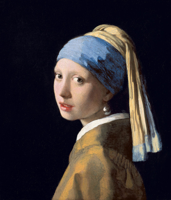

Generation 0, best fitness: 63.1597%, population average: 60.8157%


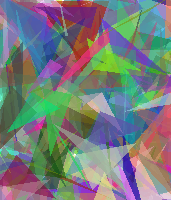

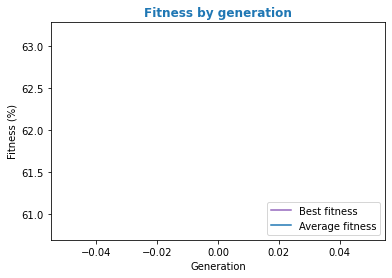

Generation 1, best fitness: 63.2302%, population average: 61.309%
Generation 2, best fitness: 63.5989%, population average: 61.9074%
Generation 3, best fitness: 63.5989%, population average: 62.2345%
Generation 4, best fitness: 63.5989%, population average: 62.292%
Generation 5, best fitness: 63.5989%, population average: 62.5787%
Generation 6, best fitness: 63.8178%, population average: 63.0222%
Generation 7, best fitness: 63.8178%, population average: 62.8887%
Generation 8, best fitness: 63.8178%, population average: 63.1561%
Generation 9, best fitness: 63.9677%, population average: 63.463%
Generation 10, best fitness: 64.0989%, population average: 63.5561%
Generation 11, best fitness: 64.3327%, population average: 63.7318%
Generation 12, best fitness: 64.4104%, population average: 63.6521%
Generation 13, best fitness: 64.5343%, population average: 63.8895%
Generation 14, best fitness: 64.7983%, population average: 64.024%
Generation 15, best fitness: 64.7983%, population average: 64

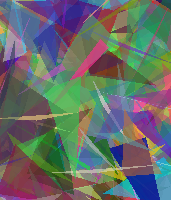

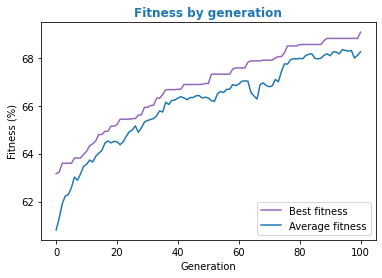

Generation 101, best fitness: 69.0692%, population average: 68.4053%
Generation 102, best fitness: 69.0692%, population average: 68.4858%
Generation 103, best fitness: 69.0715%, population average: 68.5595%
Generation 104, best fitness: 69.0715%, population average: 68.5233%
Generation 105, best fitness: 69.0715%, population average: 68.6007%
Generation 106, best fitness: 69.155%, population average: 68.6387%
Generation 107, best fitness: 69.4774%, population average: 68.565%
Generation 108, best fitness: 69.4774%, population average: 68.5781%
Generation 109, best fitness: 69.4774%, population average: 68.6314%
Generation 110, best fitness: 69.4774%, population average: 68.6661%
Generation 111, best fitness: 69.551%, population average: 68.5378%
Generation 112, best fitness: 69.5818%, population average: 68.7776%
Generation 113, best fitness: 69.7622%, population average: 69.0655%
Generation 114, best fitness: 69.7622%, population average: 69.0232%
Generation 115, best fitness: 70.1647

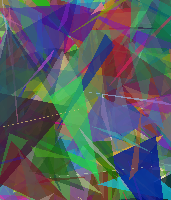

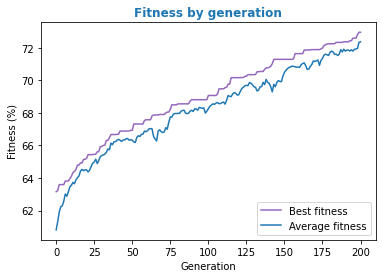

Generation 201, best fitness: 72.9537%, population average: 72.1957%
Generation 202, best fitness: 72.9537%, population average: 72.1689%
Generation 203, best fitness: 73.0715%, population average: 72.2706%
Generation 204, best fitness: 73.0715%, population average: 72.2101%
Generation 205, best fitness: 73.0715%, population average: 72.1201%
Generation 206, best fitness: 73.2982%, population average: 72.3293%
Generation 207, best fitness: 73.2982%, population average: 72.4886%
Generation 208, best fitness: 73.2982%, population average: 72.5883%
Generation 209, best fitness: 73.2982%, population average: 72.7026%
Generation 210, best fitness: 73.2982%, population average: 72.703%
Generation 211, best fitness: 73.2982%, population average: 72.641%
Generation 212, best fitness: 73.2982%, population average: 72.5711%
Generation 213, best fitness: 73.2982%, population average: 72.4736%
Generation 214, best fitness: 73.2982%, population average: 72.2748%
Generation 215, best fitness: 73.298

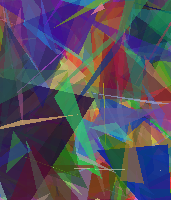

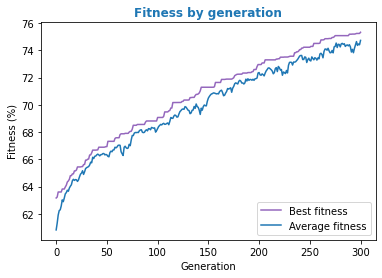

Generation 301, best fitness: 75.3404%, population average: 74.9154%
Generation 302, best fitness: 75.4443%, population average: 74.595%
Generation 303, best fitness: 75.4443%, population average: 74.6664%
Generation 304, best fitness: 75.4443%, population average: 74.8905%
Generation 305, best fitness: 75.4537%, population average: 75.0037%
Generation 306, best fitness: 75.4537%, population average: 74.643%
Generation 307, best fitness: 75.4537%, population average: 74.8191%
Generation 308, best fitness: 75.5275%, population average: 75.0039%
Generation 309, best fitness: 75.5397%, population average: 75.0303%
Generation 310, best fitness: 75.7582%, population average: 74.9397%
Generation 311, best fitness: 75.7582%, population average: 74.8982%
Generation 312, best fitness: 75.7582%, population average: 74.7164%
Generation 313, best fitness: 75.8363%, population average: 74.6329%
Generation 314, best fitness: 75.8363%, population average: 74.3761%
Generation 315, best fitness: 75.836

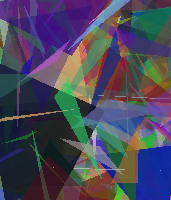

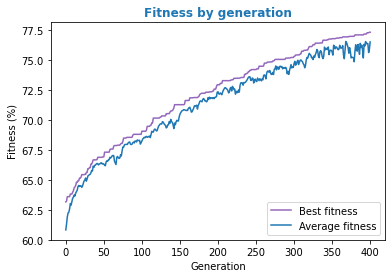

Generation 401, best fitness: 77.4715%, population average: 76.4604%
Generation 402, best fitness: 77.4715%, population average: 76.3507%
Generation 403, best fitness: 77.4715%, population average: 76.6382%
Generation 404, best fitness: 77.4715%, population average: 76.7262%
Generation 405, best fitness: 77.4715%, population average: 76.6159%
Generation 406, best fitness: 77.4715%, population average: 76.5338%
Generation 407, best fitness: 77.4715%, population average: 76.3593%
Generation 408, best fitness: 77.4715%, population average: 76.1124%
Generation 409, best fitness: 77.4715%, population average: 75.7076%
Generation 410, best fitness: 77.4715%, population average: 75.4974%
Generation 411, best fitness: 77.4715%, population average: 74.7692%
Generation 412, best fitness: 77.4715%, population average: 74.4775%
Generation 413, best fitness: 77.4715%, population average: 75.1045%
Generation 414, best fitness: 77.5877%, population average: 75.3781%
Generation 415, best fitness: 77.5

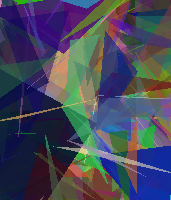

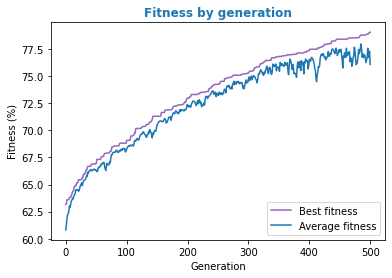

Generation 501, best fitness: 79.037%, population average: 76.5257%
Generation 502, best fitness: 79.037%, population average: 76.9067%
Generation 503, best fitness: 79.037%, population average: 76.7195%
Generation 504, best fitness: 79.037%, population average: 77.2907%
Generation 505, best fitness: 79.037%, population average: 77.8318%
Generation 506, best fitness: 79.037%, population average: 77.5619%
Generation 507, best fitness: 79.037%, population average: 78.3001%
Generation 508, best fitness: 79.0911%, population average: 77.915%
Generation 509, best fitness: 79.0911%, population average: 78.1549%
Generation 510, best fitness: 79.1075%, population average: 78.3312%
Generation 511, best fitness: 79.1075%, population average: 77.9716%
Generation 512, best fitness: 79.1075%, population average: 78.0084%
Generation 513, best fitness: 79.1075%, population average: 77.8835%
Generation 514, best fitness: 79.1075%, population average: 77.1428%
Generation 515, best fitness: 79.1967%, po

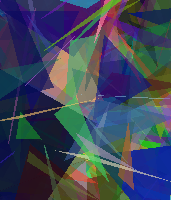

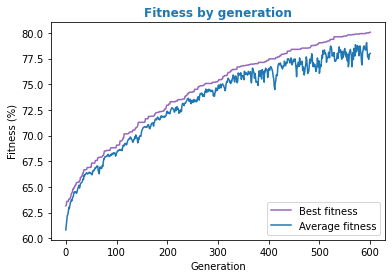

Generation 601, best fitness: 80.0877%, population average: 78.0335%
Generation 602, best fitness: 80.0877%, population average: 78.796%
Generation 603, best fitness: 80.0877%, population average: 79.1378%
Generation 604, best fitness: 80.1383%, population average: 79.4957%
Generation 605, best fitness: 80.1383%, population average: 78.9127%
Generation 606, best fitness: 80.1383%, population average: 78.9734%
Generation 607, best fitness: 80.1383%, population average: 78.9822%
Generation 608, best fitness: 80.1383%, population average: 78.7344%
Generation 609, best fitness: 80.1383%, population average: 79.1877%
Generation 610, best fitness: 80.1383%, population average: 79.4184%
Generation 611, best fitness: 80.1383%, population average: 79.3726%
Generation 612, best fitness: 80.1383%, population average: 79.0791%
Generation 613, best fitness: 80.1383%, population average: 79.09%
Generation 614, best fitness: 80.2252%, population average: 79.0047%
Generation 615, best fitness: 80.2252

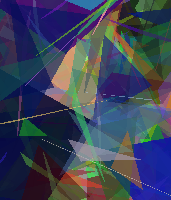

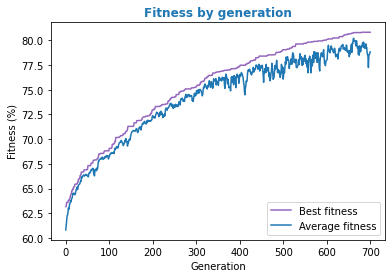

Generation 701, best fitness: 80.8217%, population average: 77.7429%
Generation 702, best fitness: 80.8522%, population average: 78.4592%
Generation 703, best fitness: 80.8522%, population average: 78.4605%
Generation 704, best fitness: 80.8522%, population average: 78.2959%
Generation 705, best fitness: 80.8522%, population average: 78.9013%
Generation 706, best fitness: 80.8522%, population average: 78.571%
Generation 707, best fitness: 80.8522%, population average: 78.006%
Generation 708, best fitness: 80.8522%, population average: 78.233%
Generation 709, best fitness: 80.8522%, population average: 78.7972%
Generation 710, best fitness: 80.8522%, population average: 79.0118%
Generation 711, best fitness: 80.8522%, population average: 79.7352%
Generation 712, best fitness: 80.8522%, population average: 79.1342%
Generation 713, best fitness: 80.8522%, population average: 79.3004%
Generation 714, best fitness: 80.8522%, population average: 79.0318%
Generation 715, best fitness: 80.8522

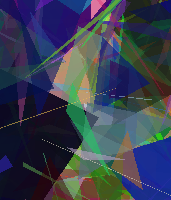

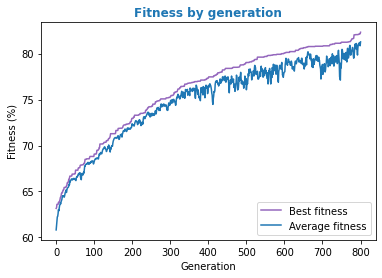

Generation 801, best fitness: 82.3307%, population average: 81.0076%
Generation 802, best fitness: 82.3431%, population average: 80.8998%
Generation 803, best fitness: 82.4071%, population average: 81.7968%
Generation 804, best fitness: 82.4071%, population average: 81.4527%
Generation 805, best fitness: 82.4071%, population average: 81.4387%
Generation 806, best fitness: 82.4071%, population average: 81.0666%
Generation 807, best fitness: 82.4071%, population average: 80.7759%
Generation 808, best fitness: 82.4071%, population average: 80.9003%
Generation 809, best fitness: 82.4071%, population average: 80.5229%
Generation 810, best fitness: 82.4176%, population average: 80.3298%
Generation 811, best fitness: 82.4714%, population average: 81.141%
Generation 812, best fitness: 82.4714%, population average: 80.857%
Generation 813, best fitness: 82.4714%, population average: 81.4571%
Generation 814, best fitness: 82.4714%, population average: 80.8356%
Generation 815, best fitness: 82.815

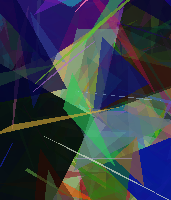

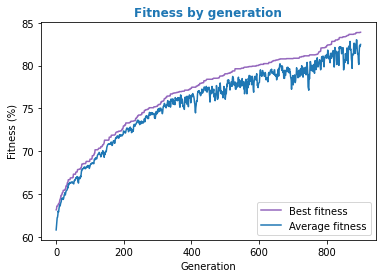

Generation 901, best fitness: 84.1019%, population average: 82.6812%
Generation 902, best fitness: 84.1019%, population average: 82.6383%
Generation 903, best fitness: 84.1302%, population average: 83.0171%
Generation 904, best fitness: 84.1302%, population average: 83.2125%
Generation 905, best fitness: 84.1302%, population average: 82.0779%
Generation 906, best fitness: 84.1302%, population average: 82.1551%
Generation 907, best fitness: 84.1302%, population average: 83.1154%
Generation 908, best fitness: 84.1302%, population average: 83.0423%
Generation 909, best fitness: 84.1732%, population average: 83.0435%
Generation 910, best fitness: 84.1732%, population average: 82.3462%
Generation 911, best fitness: 84.1732%, population average: 82.4242%
Generation 912, best fitness: 84.1732%, population average: 81.861%
Generation 913, best fitness: 84.1732%, population average: 82.6733%
Generation 914, best fitness: 84.1867%, population average: 82.5315%
Generation 915, best fitness: 84.19

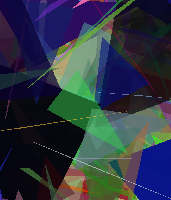

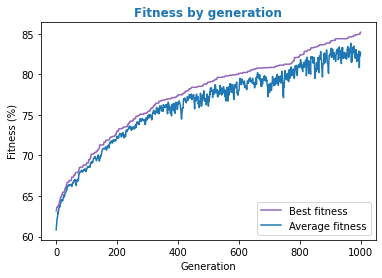

Generation 1001, best fitness: 85.1845%, population average: 83.4887%
Generation 1002, best fitness: 85.1845%, population average: 83.7419%
Generation 1003, best fitness: 85.1845%, population average: 82.4275%
Generation 1004, best fitness: 85.1845%, population average: 82.705%
Generation 1005, best fitness: 85.1845%, population average: 83.2112%
Generation 1006, best fitness: 85.1845%, population average: 83.0872%
Generation 1007, best fitness: 85.1845%, population average: 83.5395%
Generation 1008, best fitness: 85.1845%, population average: 83.8963%
Generation 1009, best fitness: 85.1845%, population average: 83.6964%
Generation 1010, best fitness: 85.1845%, population average: 83.5844%
Generation 1011, best fitness: 85.1845%, population average: 82.343%
Generation 1012, best fitness: 85.1845%, population average: 81.8321%
Generation 1013, best fitness: 85.1845%, population average: 81.9073%
Generation 1014, best fitness: 85.1845%, population average: 82.0728%
Generation 1015, best 

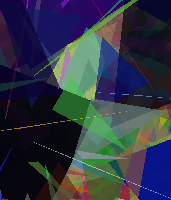

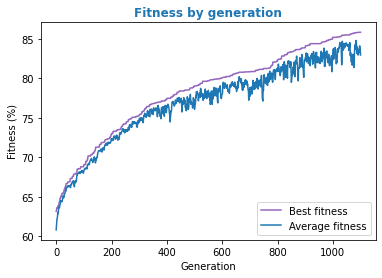

Generation 1101, best fitness: 85.8295%, population average: 82.8256%
Generation 1102, best fitness: 85.8295%, population average: 83.0585%
Generation 1103, best fitness: 85.8295%, population average: 81.9164%
Generation 1104, best fitness: 85.8295%, population average: 82.7253%
Generation 1105, best fitness: 85.9011%, population average: 83.1872%
Generation 1106, best fitness: 85.9011%, population average: 83.6675%
Generation 1107, best fitness: 85.9011%, population average: 83.3923%
Generation 1108, best fitness: 85.9011%, population average: 83.3003%
Generation 1109, best fitness: 85.9011%, population average: 83.2394%
Generation 1110, best fitness: 85.9011%, population average: 84.4083%
Generation 1111, best fitness: 85.9011%, population average: 84.8881%
Generation 1112, best fitness: 85.9011%, population average: 83.8464%
Generation 1113, best fitness: 85.9011%, population average: 84.4431%
Generation 1114, best fitness: 85.9011%, population average: 84.257%
Generation 1115, best

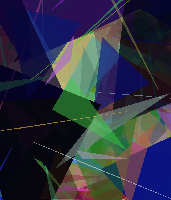

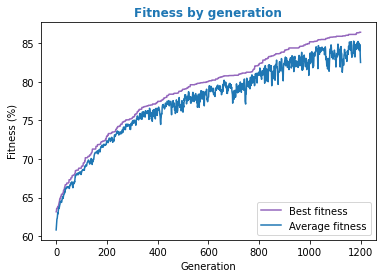

Generation 1201, best fitness: 86.4229%, population average: 83.5421%
Generation 1202, best fitness: 86.4229%, population average: 83.0102%
Generation 1203, best fitness: 86.4229%, population average: 83.7111%
Generation 1204, best fitness: 86.4229%, population average: 83.4807%
Generation 1205, best fitness: 86.4229%, population average: 83.0947%
Generation 1206, best fitness: 86.4229%, population average: 84.8278%
Generation 1207, best fitness: 86.4838%, population average: 85.0446%
Generation 1208, best fitness: 86.4838%, population average: 84.6532%
Generation 1209, best fitness: 86.4838%, population average: 84.2225%
Generation 1210, best fitness: 86.4838%, population average: 83.8862%
Generation 1211, best fitness: 86.4838%, population average: 82.6178%
Generation 1212, best fitness: 86.4838%, population average: 82.8503%
Generation 1213, best fitness: 86.4838%, population average: 82.0057%
Generation 1214, best fitness: 86.4838%, population average: 82.573%
Generation 1215, best

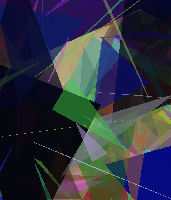

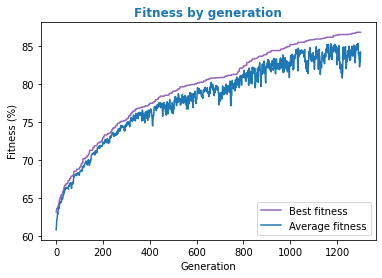

Generation 1301, best fitness: 86.7952%, population average: 84.1548%
Generation 1302, best fitness: 86.7952%, population average: 84.951%
Generation 1303, best fitness: 86.7952%, population average: 85.3822%
Generation 1304, best fitness: 86.7952%, population average: 85.5508%
Generation 1305, best fitness: 86.7952%, population average: 84.4202%
Generation 1306, best fitness: 86.7995%, population average: 84.4835%
Generation 1307, best fitness: 86.7995%, population average: 85.1831%
Generation 1308, best fitness: 86.7995%, population average: 84.8892%
Generation 1309, best fitness: 86.9906%, population average: 85.326%
Generation 1310, best fitness: 86.9906%, population average: 85.3144%
Generation 1311, best fitness: 86.9906%, population average: 84.7856%
Generation 1312, best fitness: 86.9906%, population average: 84.9847%
Generation 1313, best fitness: 86.9906%, population average: 84.9499%
Generation 1314, best fitness: 86.9906%, population average: 85.378%
Generation 1315, best f

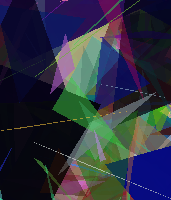

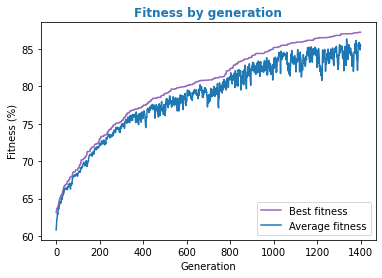

Generation 1401, best fitness: 87.2172%, population average: 85.0388%
Generation 1402, best fitness: 87.2172%, population average: 84.8049%
Generation 1403, best fitness: 87.2172%, population average: 85.3613%
Generation 1404, best fitness: 87.2172%, population average: 85.0044%
Generation 1405, best fitness: 87.2172%, population average: 84.6861%
Generation 1406, best fitness: 87.2172%, population average: 85.5357%
Generation 1407, best fitness: 87.2172%, population average: 85.7541%
Generation 1408, best fitness: 87.2172%, population average: 84.7486%
Generation 1409, best fitness: 87.2172%, population average: 85.5875%
Generation 1410, best fitness: 87.2172%, population average: 83.8822%
Generation 1411, best fitness: 87.2172%, population average: 83.8439%
Generation 1412, best fitness: 87.2172%, population average: 84.9079%
Generation 1413, best fitness: 87.2172%, population average: 85.328%
Generation 1414, best fitness: 87.2172%, population average: 85.1972%
Generation 1415, best

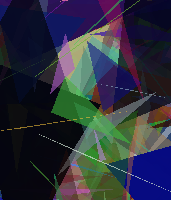

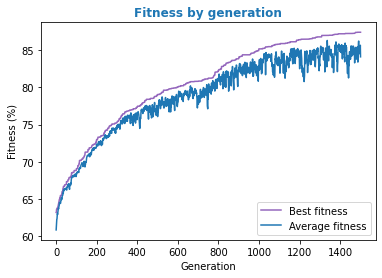

Generation 1501, best fitness: 87.4241%, population average: 84.1576%
Generation 1502, best fitness: 87.4241%, population average: 82.318%
Generation 1503, best fitness: 87.4241%, population average: 83.7519%
Generation 1504, best fitness: 87.4241%, population average: 84.6411%
Generation 1505, best fitness: 87.4241%, population average: 84.7755%
Generation 1506, best fitness: 87.4241%, population average: 84.6947%
Generation 1507, best fitness: 87.4241%, population average: 83.7604%
Generation 1508, best fitness: 87.4241%, population average: 83.8408%
Generation 1509, best fitness: 87.4241%, population average: 83.3113%
Generation 1510, best fitness: 87.4241%, population average: 84.3124%
Generation 1511, best fitness: 87.4397%, population average: 85.1285%
Generation 1512, best fitness: 87.4397%, population average: 84.4957%
Generation 1513, best fitness: 87.4397%, population average: 85.2706%
Generation 1514, best fitness: 87.4397%, population average: 85.5482%
Generation 1515, best

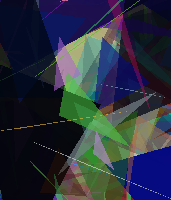

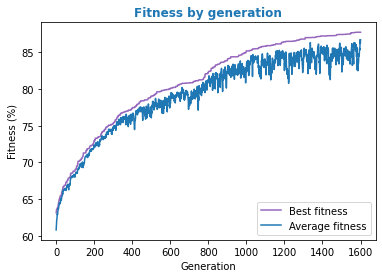

Generation 1601, best fitness: 87.7278%, population average: 86.2903%
Generation 1602, best fitness: 87.7278%, population average: 85.6916%
Generation 1603, best fitness: 87.7317%, population average: 85.9544%
Generation 1604, best fitness: 87.7317%, population average: 85.7411%
Generation 1605, best fitness: 87.7317%, population average: 84.3998%
Generation 1606, best fitness: 87.7317%, population average: 85.472%
Generation 1607, best fitness: 87.7317%, population average: 85.9368%
Generation 1608, best fitness: 87.7317%, population average: 86.0029%
Generation 1609, best fitness: 87.7317%, population average: 86.2263%
Generation 1610, best fitness: 87.7317%, population average: 85.5141%
Generation 1611, best fitness: 87.7317%, population average: 84.6128%
Generation 1612, best fitness: 87.7317%, population average: 84.4127%
Generation 1613, best fitness: 87.7317%, population average: 85.1374%
Generation 1614, best fitness: 87.7317%, population average: 83.9169%
Generation 1615, best

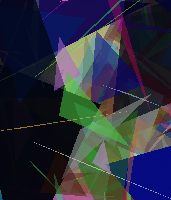

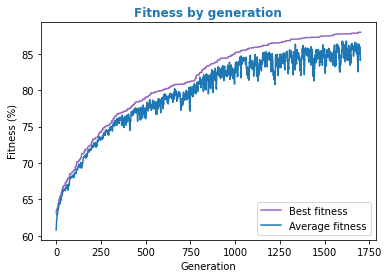

Generation 1701, best fitness: 87.9511%, population average: 84.8632%
Generation 1702, best fitness: 87.9511%, population average: 83.238%
Generation 1703, best fitness: 87.9511%, population average: 84.5853%
Generation 1704, best fitness: 87.9511%, population average: 84.2394%
Generation 1705, best fitness: 87.9511%, population average: 82.5811%
Generation 1706, best fitness: 87.9511%, population average: 83.5716%
Generation 1707, best fitness: 87.9511%, population average: 83.5594%
Generation 1708, best fitness: 87.9511%, population average: 83.2916%
Generation 1709, best fitness: 87.9511%, population average: 82.8853%
Generation 1710, best fitness: 87.9511%, population average: 84.2974%
Generation 1711, best fitness: 87.9511%, population average: 83.7201%
Generation 1712, best fitness: 87.9511%, population average: 84.3066%
Generation 1713, best fitness: 87.9511%, population average: 84.1212%
Generation 1714, best fitness: 87.9511%, population average: 85.1867%
Generation 1715, best

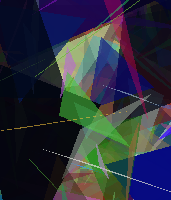

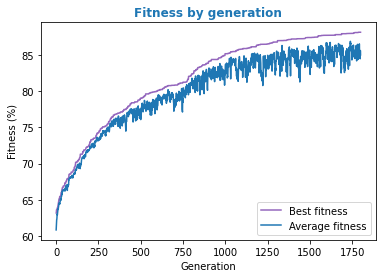

Generation 1801, best fitness: 88.1533%, population average: 85.2273%
Generation 1802, best fitness: 88.1533%, population average: 85.8306%
Generation 1803, best fitness: 88.1533%, population average: 85.5539%
Generation 1804, best fitness: 88.1908%, population average: 84.3076%
Generation 1805, best fitness: 88.1908%, population average: 84.1355%
Generation 1806, best fitness: 88.1931%, population average: 85.5532%
Generation 1807, best fitness: 88.1931%, population average: 85.826%
Generation 1808, best fitness: 88.1931%, population average: 85.1886%
Generation 1809, best fitness: 88.1931%, population average: 84.853%
Generation 1810, best fitness: 88.2211%, population average: 85.5473%
Generation 1811, best fitness: 88.2211%, population average: 85.3395%
Generation 1812, best fitness: 88.2211%, population average: 85.5076%
Generation 1813, best fitness: 88.2211%, population average: 85.5836%
Generation 1814, best fitness: 88.2261%, population average: 85.7645%
Generation 1815, best 

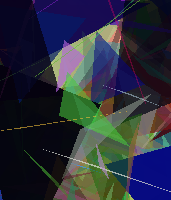

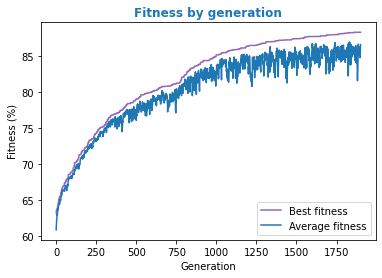

Generation 1901, best fitness: 88.326%, population average: 86.2864%
Generation 1902, best fitness: 88.326%, population average: 85.8664%
Generation 1903, best fitness: 88.326%, population average: 85.6042%
Generation 1904, best fitness: 88.326%, population average: 86.4931%
Generation 1905, best fitness: 88.326%, population average: 85.9128%
Generation 1906, best fitness: 88.326%, population average: 84.7949%
Generation 1907, best fitness: 88.326%, population average: 85.0984%
Generation 1908, best fitness: 88.326%, population average: 85.5328%
Generation 1909, best fitness: 88.326%, population average: 83.9546%
Generation 1910, best fitness: 88.326%, population average: 84.7422%
Generation 1911, best fitness: 88.326%, population average: 84.3746%
Generation 1912, best fitness: 88.326%, population average: 83.9732%
Generation 1913, best fitness: 88.326%, population average: 86.4287%
Generation 1914, best fitness: 88.326%, population average: 85.9572%
Generation 1915, best fitness: 88.

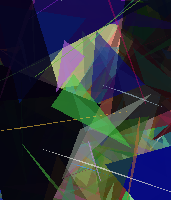

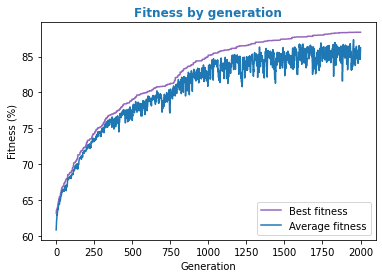

Generation 2001, best fitness: 88.3828%, population average: 85.1402%
Generation 2002, best fitness: 88.3828%, population average: 85.6627%
Generation 2003, best fitness: 88.3891%, population average: 87.389%
Generation 2004, best fitness: 88.3891%, population average: 87.4059%
Generation 2005, best fitness: 88.3891%, population average: 86.5613%
Generation 2006, best fitness: 88.3891%, population average: 85.5288%
Generation 2007, best fitness: 88.3891%, population average: 84.0008%
Generation 2008, best fitness: 88.414%, population average: 85.4912%
Generation 2009, best fitness: 88.414%, population average: 85.8949%
Generation 2010, best fitness: 88.414%, population average: 86.4311%
Generation 2011, best fitness: 88.414%, population average: 85.6463%
Generation 2012, best fitness: 88.414%, population average: 85.4242%
Generation 2013, best fitness: 88.414%, population average: 85.1163%
Generation 2014, best fitness: 88.414%, population average: 84.4952%
Generation 2015, best fitnes

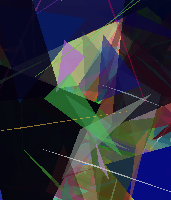

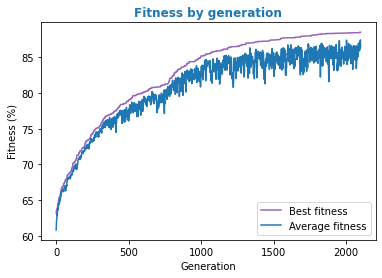

Generation 2101, best fitness: 88.5077%, population average: 86.1755%
Generation 2102, best fitness: 88.5077%, population average: 86.6172%
Generation 2103, best fitness: 88.5077%, population average: 86.7434%
Generation 2104, best fitness: 88.5077%, population average: 86.5378%
Generation 2105, best fitness: 88.5077%, population average: 85.9426%
Generation 2106, best fitness: 88.5077%, population average: 85.2034%
Generation 2107, best fitness: 88.5077%, population average: 86.0335%
Generation 2108, best fitness: 88.5077%, population average: 87.245%
Generation 2109, best fitness: 88.5077%, population average: 87.7506%
Generation 2110, best fitness: 88.5077%, population average: 87.1208%
Generation 2111, best fitness: 88.5077%, population average: 86.2372%
Generation 2112, best fitness: 88.5077%, population average: 87.129%
Generation 2113, best fitness: 88.5077%, population average: 85.4496%
Generation 2114, best fitness: 88.5108%, population average: 86.4102%
Generation 2115, best 

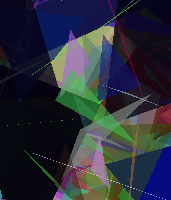

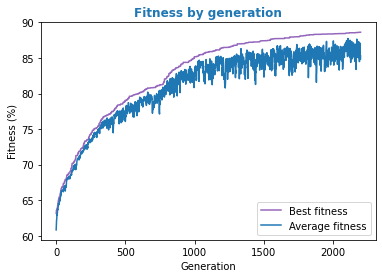

Generation 2201, best fitness: 88.6259%, population average: 83.6537%
Generation 2202, best fitness: 88.6259%, population average: 85.0371%
Generation 2203, best fitness: 88.6259%, population average: 85.2563%
Generation 2204, best fitness: 88.6259%, population average: 85.7163%
Generation 2205, best fitness: 88.6259%, population average: 87.5233%
Generation 2206, best fitness: 88.6259%, population average: 86.8158%
Generation 2207, best fitness: 88.6259%, population average: 87.1212%
Generation 2208, best fitness: 88.6259%, population average: 86.1534%
Generation 2209, best fitness: 88.6259%, population average: 85.267%
Generation 2210, best fitness: 88.6259%, population average: 85.0262%
Generation 2211, best fitness: 88.6259%, population average: 85.7977%
Generation 2212, best fitness: 88.6259%, population average: 86.1097%
Generation 2213, best fitness: 88.6259%, population average: 86.1877%
Generation 2214, best fitness: 88.6262%, population average: 86.6124%
Generation 2215, best

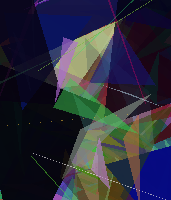

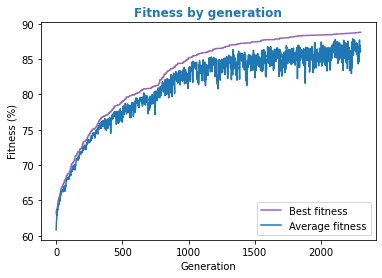

Generation 2301, best fitness: 88.7866%, population average: 85.0752%
Generation 2302, best fitness: 88.7866%, population average: 86.6662%
Generation 2303, best fitness: 88.7866%, population average: 87.1448%
Generation 2304, best fitness: 88.7866%, population average: 86.3141%
Generation 2305, best fitness: 88.7866%, population average: 86.8187%
Generation 2306, best fitness: 88.7866%, population average: 87.4208%
Generation 2307, best fitness: 88.7866%, population average: 86.9989%
Generation 2308, best fitness: 88.7866%, population average: 87.2835%
Generation 2309, best fitness: 88.7866%, population average: 86.5386%
Generation 2310, best fitness: 88.7866%, population average: 86.7682%
Generation 2311, best fitness: 88.7866%, population average: 86.0801%
Generation 2312, best fitness: 88.7866%, population average: 86.4797%
Generation 2313, best fitness: 88.7866%, population average: 86.7189%
Generation 2314, best fitness: 88.7866%, population average: 86.5355%
Generation 2315, bes

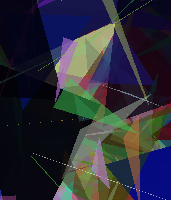

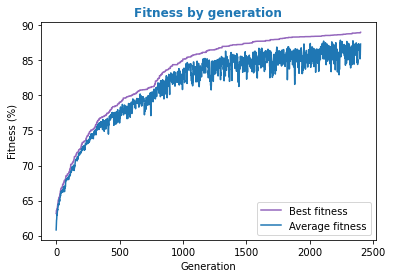

Generation 2401, best fitness: 89.0118%, population average: 86.591%
Generation 2402, best fitness: 89.0118%, population average: 86.2112%
Generation 2403, best fitness: 89.0118%, population average: 87.2903%
Generation 2404, best fitness: 89.0118%, population average: 86.534%
Generation 2405, best fitness: 89.0118%, population average: 86.9822%
Generation 2406, best fitness: 89.0118%, population average: 85.7454%
Generation 2407, best fitness: 89.0118%, population average: 85.909%
Generation 2408, best fitness: 89.0118%, population average: 85.9686%
Generation 2409, best fitness: 89.0118%, population average: 85.7351%
Generation 2410, best fitness: 89.0118%, population average: 86.0565%
Generation 2411, best fitness: 89.0118%, population average: 87.0206%
Generation 2412, best fitness: 89.0118%, population average: 85.9939%
Generation 2413, best fitness: 89.0118%, population average: 83.5942%
Generation 2414, best fitness: 89.0118%, population average: 84.6479%
Generation 2415, best f

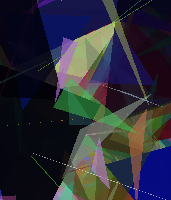

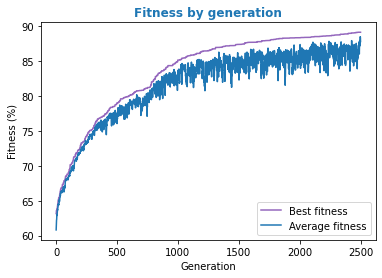

Generation 2501, best fitness: 89.1749%, population average: 85.6529%
Generation 2502, best fitness: 89.1749%, population average: 86.2146%
Generation 2503, best fitness: 89.1749%, population average: 85.3898%
Generation 2504, best fitness: 89.1749%, population average: 84.4474%
Generation 2505, best fitness: 89.1749%, population average: 82.7095%
Generation 2506, best fitness: 89.1749%, population average: 81.762%
Generation 2507, best fitness: 89.2506%, population average: 83.3333%
Generation 2508, best fitness: 89.2506%, population average: 85.1931%
Generation 2509, best fitness: 89.2506%, population average: 85.3345%
Generation 2510, best fitness: 89.2506%, population average: 85.3526%
Generation 2511, best fitness: 89.2506%, population average: 85.6737%
Generation 2512, best fitness: 89.2506%, population average: 85.4718%
Generation 2513, best fitness: 89.2506%, population average: 84.4614%
Generation 2514, best fitness: 89.2506%, population average: 84.6675%
Generation 2515, best

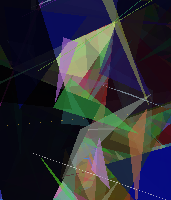

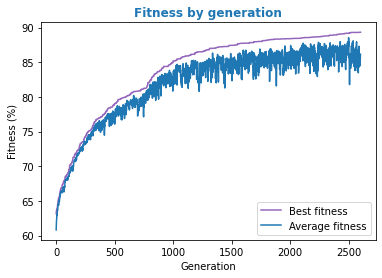

Generation 2601, best fitness: 89.3185%, population average: 85.4123%
Generation 2602, best fitness: 89.3185%, population average: 83.5001%
Generation 2603, best fitness: 89.3185%, population average: 85.5502%
Generation 2604, best fitness: 89.3185%, population average: 85.819%
Generation 2605, best fitness: 89.3185%, population average: 85.4314%
Generation 2606, best fitness: 89.3185%, population average: 85.4389%
Generation 2607, best fitness: 89.3185%, population average: 87.0298%
Generation 2608, best fitness: 89.3185%, population average: 86.8428%
Generation 2609, best fitness: 89.3185%, population average: 87.6467%
Generation 2610, best fitness: 89.3185%, population average: 86.4225%
Generation 2611, best fitness: 89.3185%, population average: 85.6872%
Generation 2612, best fitness: 89.3185%, population average: 85.6261%
Generation 2613, best fitness: 89.3185%, population average: 83.6971%
Generation 2614, best fitness: 89.3185%, population average: 84.9899%
Generation 2615, best

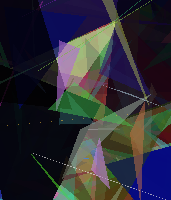

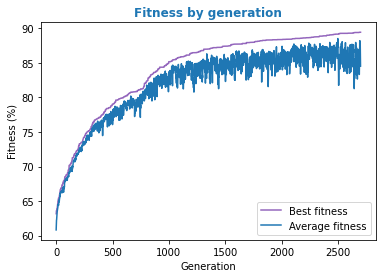

Generation 2701, best fitness: 89.45%, population average: 84.9457%
Generation 2702, best fitness: 89.45%, population average: 85.2561%
Generation 2703, best fitness: 89.45%, population average: 85.0704%
Generation 2704, best fitness: 89.45%, population average: 84.3294%
Generation 2705, best fitness: 89.45%, population average: 85.0744%
Generation 2706, best fitness: 89.45%, population average: 86.2448%
Generation 2707, best fitness: 89.45%, population average: 86.1483%
Generation 2708, best fitness: 89.45%, population average: 84.17%
Generation 2709, best fitness: 89.45%, population average: 85.39%
Generation 2710, best fitness: 89.45%, population average: 85.8268%
Generation 2711, best fitness: 89.4619%, population average: 84.8696%
Generation 2712, best fitness: 89.4619%, population average: 85.2125%
Generation 2713, best fitness: 89.4659%, population average: 85.7906%
Generation 2714, best fitness: 89.4659%, population average: 85.0269%
Generation 2715, best fitness: 89.4659%, pop

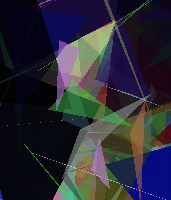

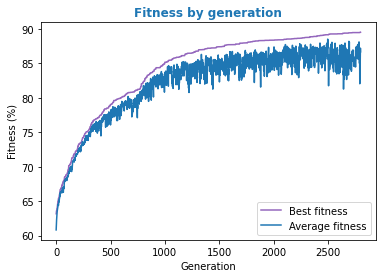

Generation 2801, best fitness: 89.5395%, population average: 86.1501%
Generation 2802, best fitness: 89.5395%, population average: 85.7348%
Generation 2803, best fitness: 89.5395%, population average: 86.2142%
Generation 2804, best fitness: 89.5553%, population average: 87.075%
Generation 2805, best fitness: 89.5553%, population average: 87.3196%
Generation 2806, best fitness: 89.5553%, population average: 86.5606%
Generation 2807, best fitness: 89.5553%, population average: 86.4062%
Generation 2808, best fitness: 89.5553%, population average: 86.794%
Generation 2809, best fitness: 89.5553%, population average: 85.9577%
Generation 2810, best fitness: 89.5553%, population average: 88.0056%
Generation 2811, best fitness: 89.5553%, population average: 87.0902%
Generation 2812, best fitness: 89.5553%, population average: 87.0401%
Generation 2813, best fitness: 89.5553%, population average: 87.13%
Generation 2814, best fitness: 89.5553%, population average: 86.8126%
Generation 2815, best fi

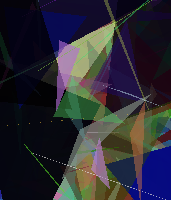

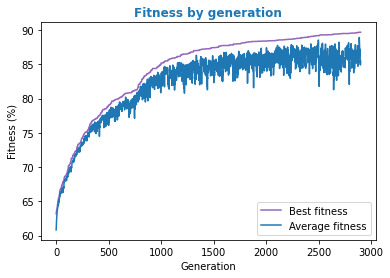

Generation 2901, best fitness: 89.6754%, population average: 85.7442%
Generation 2902, best fitness: 89.6754%, population average: 86.6699%
Generation 2903, best fitness: 89.6754%, population average: 86.022%
Generation 2904, best fitness: 89.6754%, population average: 86.2079%
Generation 2905, best fitness: 89.6754%, population average: 86.083%
Generation 2906, best fitness: 89.6754%, population average: 86.2143%
Generation 2907, best fitness: 89.6754%, population average: 85.2806%
Generation 2908, best fitness: 89.6754%, population average: 88.1608%
Generation 2909, best fitness: 89.6754%, population average: 87.6907%
Generation 2910, best fitness: 89.6754%, population average: 88.7536%
Generation 2911, best fitness: 89.6984%, population average: 87.4048%
Generation 2912, best fitness: 89.6984%, population average: 86.2612%
Generation 2913, best fitness: 89.6984%, population average: 86.908%
Generation 2914, best fitness: 89.7365%, population average: 87.5977%
Generation 2915, best f

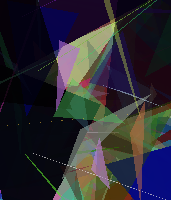

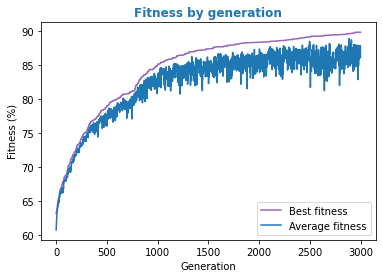

Generation 3001, best fitness: 89.8723%, population average: 86.8731%
Generation 3002, best fitness: 89.8723%, population average: 86.9582%
Generation 3003, best fitness: 89.8723%, population average: 86.8124%
Generation 3004, best fitness: 89.8723%, population average: 86.9756%
Generation 3005, best fitness: 89.8723%, population average: 87.2087%
Generation 3006, best fitness: 89.8723%, population average: 85.783%
Generation 3007, best fitness: 89.8723%, population average: 86.5435%
Generation 3008, best fitness: 89.8723%, population average: 86.922%
Generation 3009, best fitness: 89.8723%, population average: 86.755%
Generation 3010, best fitness: 89.8723%, population average: 85.5026%
Generation 3011, best fitness: 89.8723%, population average: 86.5364%
Generation 3012, best fitness: 89.8723%, population average: 87.2106%
Generation 3013, best fitness: 89.8723%, population average: 86.7322%
Generation 3014, best fitness: 89.8723%, population average: 85.9086%
Generation 3015, best f

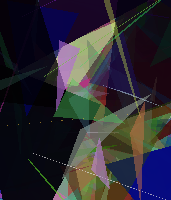

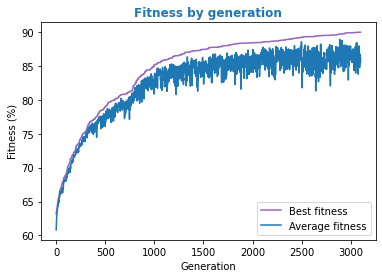

Generation 3101, best fitness: 89.955%, population average: 85.6617%
Generation 3102, best fitness: 89.955%, population average: 85.5095%
Generation 3103, best fitness: 89.955%, population average: 85.0601%
Generation 3104, best fitness: 89.955%, population average: 84.9498%
Generation 3105, best fitness: 89.955%, population average: 86.2641%
Generation 3106, best fitness: 89.955%, population average: 87.929%
Generation 3107, best fitness: 89.955%, population average: 88.0555%
Generation 3108, best fitness: 89.955%, population average: 86.5848%
Generation 3109, best fitness: 89.955%, population average: 86.0274%
Generation 3110, best fitness: 89.955%, population average: 84.9957%
Generation 3111, best fitness: 89.955%, population average: 86.8874%
Generation 3112, best fitness: 89.955%, population average: 84.5596%
Generation 3113, best fitness: 89.955%, population average: 86.9409%
Generation 3114, best fitness: 89.955%, population average: 86.243%
Generation 3115, best fitness: 89.95

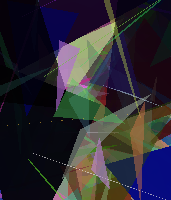

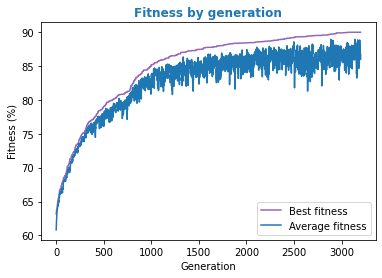

Generation 3201, best fitness: 89.9621%, population average: 87.8743%
Generation 3202, best fitness: 89.9621%, population average: 87.7817%
Generation 3203, best fitness: 89.9621%, population average: 86.8678%
Generation 3204, best fitness: 89.9621%, population average: 84.9446%
Generation 3205, best fitness: 89.9621%, population average: 84.9392%
Generation 3206, best fitness: 89.9621%, population average: 85.8792%
Generation 3207, best fitness: 89.9621%, population average: 85.6029%
Generation 3208, best fitness: 89.9621%, population average: 85.8329%
Generation 3209, best fitness: 89.9621%, population average: 85.8482%
Generation 3210, best fitness: 89.9951%, population average: 86.6768%
Generation 3211, best fitness: 89.9951%, population average: 87.2201%
Generation 3212, best fitness: 89.9951%, population average: 87.6878%
Generation 3213, best fitness: 89.9951%, population average: 87.2003%
Generation 3214, best fitness: 89.9951%, population average: 85.846%
Generation 3215, best

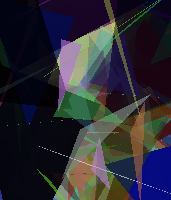

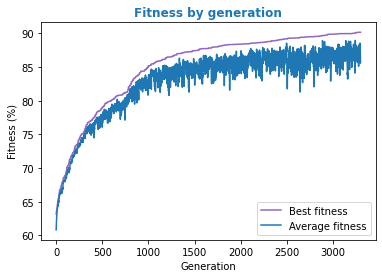

Generation 3301, best fitness: 90.1635%, population average: 86.6734%
Generation 3302, best fitness: 90.1635%, population average: 87.9727%
Generation 3303, best fitness: 90.1635%, population average: 86.4537%
Generation 3304, best fitness: 90.1635%, population average: 86.1593%
Generation 3305, best fitness: 90.1635%, population average: 85.2011%
Generation 3306, best fitness: 90.1635%, population average: 85.6259%
Generation 3307, best fitness: 90.1635%, population average: 84.0481%
Generation 3308, best fitness: 90.1635%, population average: 85.3551%
Generation 3309, best fitness: 90.1635%, population average: 84.3361%
Generation 3310, best fitness: 90.1635%, population average: 86.4484%
Generation 3311, best fitness: 90.1635%, population average: 88.4436%
Generation 3312, best fitness: 90.1635%, population average: 88.9317%
Generation 3313, best fitness: 90.1635%, population average: 87.1887%
Generation 3314, best fitness: 90.1652%, population average: 87.8742%
Generation 3315, bes

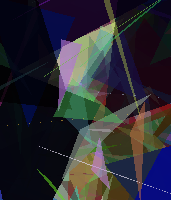

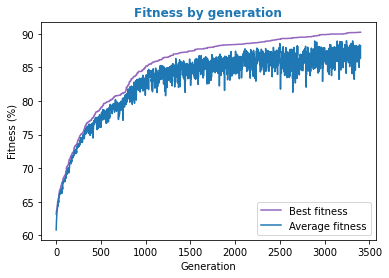

Generation 3401, best fitness: 90.2213%, population average: 87.9314%
Generation 3402, best fitness: 90.2213%, population average: 88.0343%
Generation 3403, best fitness: 90.2213%, population average: 87.388%
Generation 3404, best fitness: 90.2213%, population average: 87.4941%
Generation 3405, best fitness: 90.2213%, population average: 86.5308%
Generation 3406, best fitness: 90.2213%, population average: 87.3758%
Generation 3407, best fitness: 90.2213%, population average: 88.2386%
Generation 3408, best fitness: 90.2213%, population average: 88.4627%
Generation 3409, best fitness: 90.2213%, population average: 87.9619%
Generation 3410, best fitness: 90.2226%, population average: 88.6628%
Generation 3411, best fitness: 90.2226%, population average: 87.3993%
Generation 3412, best fitness: 90.2226%, population average: 85.1866%
Generation 3413, best fitness: 90.2226%, population average: 85.7224%
Generation 3414, best fitness: 90.2226%, population average: 85.3352%
Generation 3415, best

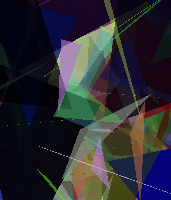

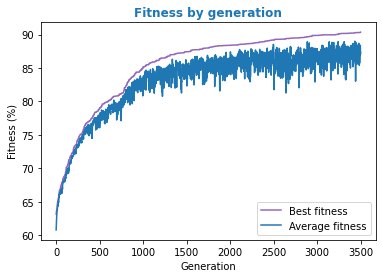

Generation 3501, best fitness: 90.3453%, population average: 87.3116%
Generation 3502, best fitness: 90.3453%, population average: 87.7328%
Generation 3503, best fitness: 90.3453%, population average: 85.7409%
Generation 3504, best fitness: 90.3453%, population average: 85.8059%
Generation 3505, best fitness: 90.3453%, population average: 87.5007%
Generation 3506, best fitness: 90.3453%, population average: 88.0124%
Generation 3507, best fitness: 90.3453%, population average: 89.7319%
Generation 3508, best fitness: 90.3453%, population average: 88.9473%
Generation 3509, best fitness: 90.3453%, population average: 89.4453%
Generation 3510, best fitness: 90.3453%, population average: 88.0341%
Generation 3511, best fitness: 90.3453%, population average: 87.6581%
Generation 3512, best fitness: 90.3453%, population average: 88.1194%
Generation 3513, best fitness: 90.3453%, population average: 87.2444%
Generation 3514, best fitness: 90.3453%, population average: 87.9237%
Generation 3515, bes

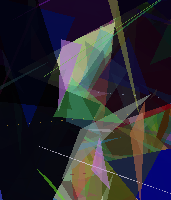

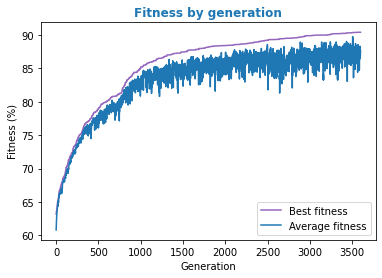

Generation 3601, best fitness: 90.3854%, population average: 87.9947%
Generation 3602, best fitness: 90.3854%, population average: 88.5161%
Generation 3603, best fitness: 90.3854%, population average: 87.6109%
Generation 3604, best fitness: 90.3854%, population average: 87.6146%
Generation 3605, best fitness: 90.3854%, population average: 87.4673%
Generation 3606, best fitness: 90.3854%, population average: 86.3463%
Generation 3607, best fitness: 90.3854%, population average: 86.2852%
Generation 3608, best fitness: 90.3854%, population average: 85.6318%
Generation 3609, best fitness: 90.3854%, population average: 84.7111%
Generation 3610, best fitness: 90.3854%, population average: 85.4398%
Generation 3611, best fitness: 90.3854%, population average: 86.6756%
Generation 3612, best fitness: 90.3854%, population average: 87.0552%
Generation 3613, best fitness: 90.3854%, population average: 86.1423%
Generation 3614, best fitness: 90.3854%, population average: 84.9871%
Generation 3615, bes

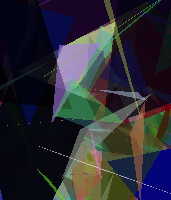

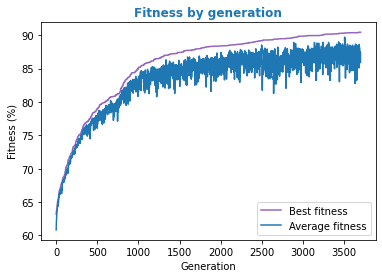

Generation 3701, best fitness: 90.4567%, population average: 88.6005%
Generation 3702, best fitness: 90.4567%, population average: 87.6437%
Generation 3703, best fitness: 90.4567%, population average: 87.9076%
Generation 3704, best fitness: 90.4567%, population average: 88.208%
Generation 3705, best fitness: 90.4567%, population average: 87.5162%
Generation 3706, best fitness: 90.4567%, population average: 86.4062%
Generation 3707, best fitness: 90.4567%, population average: 86.6096%
Generation 3708, best fitness: 90.4567%, population average: 87.2353%
Generation 3709, best fitness: 90.4567%, population average: 88.1783%
Generation 3710, best fitness: 90.4567%, population average: 87.3256%
Generation 3711, best fitness: 90.4567%, population average: 88.0911%
Generation 3712, best fitness: 90.4567%, population average: 87.6731%
Generation 3713, best fitness: 90.4567%, population average: 87.8452%
Generation 3714, best fitness: 90.4567%, population average: 86.031%
Generation 3715, best 

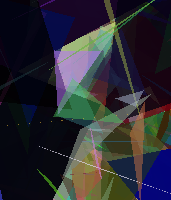

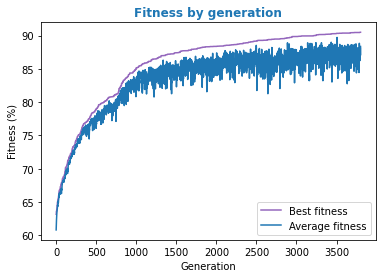

Generation 3801, best fitness: 90.5122%, population average: 88.2776%
Generation 3802, best fitness: 90.5122%, population average: 87.788%
Generation 3803, best fitness: 90.5122%, population average: 87.4253%
Generation 3804, best fitness: 90.5122%, population average: 86.5188%
Generation 3805, best fitness: 90.5122%, population average: 86.1136%
Generation 3806, best fitness: 90.5122%, population average: 86.5298%
Generation 3807, best fitness: 90.5122%, population average: 86.2576%
Generation 3808, best fitness: 90.5122%, population average: 86.5699%
Generation 3809, best fitness: 90.5122%, population average: 86.3509%
Generation 3810, best fitness: 90.5122%, population average: 86.2663%
Generation 3811, best fitness: 90.5122%, population average: 86.2166%
Generation 3812, best fitness: 90.5122%, population average: 85.8375%
Generation 3813, best fitness: 90.5122%, population average: 85.9763%
Generation 3814, best fitness: 90.5122%, population average: 85.3142%
Generation 3815, best

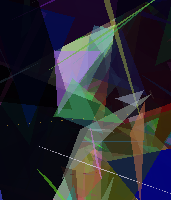

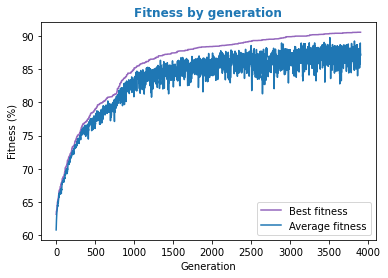

Generation 3901, best fitness: 90.54%, population average: 87.1406%
Generation 3902, best fitness: 90.54%, population average: 88.8343%
Generation 3903, best fitness: 90.54%, population average: 87.9958%
Generation 3904, best fitness: 90.54%, population average: 86.4023%
Generation 3905, best fitness: 90.54%, population average: 87.5885%
Generation 3906, best fitness: 90.54%, population average: 87.5161%
Generation 3907, best fitness: 90.5469%, population average: 88.0087%
Generation 3908, best fitness: 90.5469%, population average: 86.1866%
Generation 3909, best fitness: 90.5469%, population average: 85.7932%
Generation 3910, best fitness: 90.5469%, population average: 87.5036%
Generation 3911, best fitness: 90.5469%, population average: 87.1739%
Generation 3912, best fitness: 90.5469%, population average: 86.7789%
Generation 3913, best fitness: 90.5469%, population average: 86.5865%
Generation 3914, best fitness: 90.5469%, population average: 86.3769%
Generation 3915, best fitness: 9

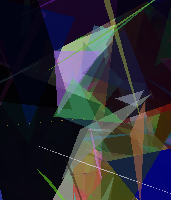

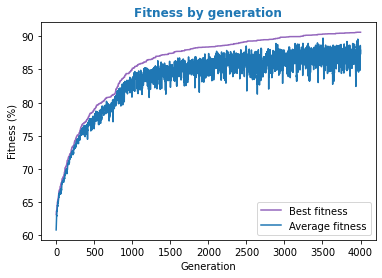

Generation 4001, best fitness: 90.6162%, population average: 87.2048%
Generation 4002, best fitness: 90.6162%, population average: 86.7193%
Generation 4003, best fitness: 90.6162%, population average: 88.1298%
Generation 4004, best fitness: 90.6162%, population average: 86.6703%
Generation 4005, best fitness: 90.6162%, population average: 87.221%
Generation 4006, best fitness: 90.6162%, population average: 86.6703%
Generation 4007, best fitness: 90.6162%, population average: 86.9132%
Generation 4008, best fitness: 90.6162%, population average: 86.8587%
Generation 4009, best fitness: 90.6162%, population average: 87.7564%
Generation 4010, best fitness: 90.6162%, population average: 86.3659%
Generation 4011, best fitness: 90.6162%, population average: 85.108%
Generation 4012, best fitness: 90.6162%, population average: 85.7029%
Generation 4013, best fitness: 90.6162%, population average: 86.1691%
Generation 4014, best fitness: 90.6162%, population average: 87.0375%
Generation 4015, best 

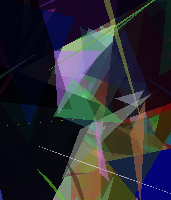

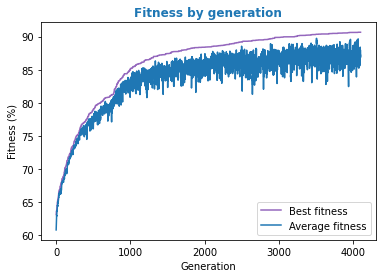

Generation 4101, best fitness: 90.6484%, population average: 87.3631%
Generation 4102, best fitness: 90.6484%, population average: 87.1685%
Generation 4103, best fitness: 90.6484%, population average: 86.217%
Generation 4104, best fitness: 90.6484%, population average: 87.2037%
Generation 4105, best fitness: 90.6484%, population average: 88.1993%
Generation 4106, best fitness: 90.6484%, population average: 87.4305%
Generation 4107, best fitness: 90.6484%, population average: 86.9463%
Generation 4108, best fitness: 90.6484%, population average: 87.4693%
Generation 4109, best fitness: 90.6484%, population average: 86.6545%
Generation 4110, best fitness: 90.6484%, population average: 87.7283%
Generation 4111, best fitness: 90.6484%, population average: 87.2987%
Generation 4112, best fitness: 90.6484%, population average: 86.7879%
Generation 4113, best fitness: 90.6484%, population average: 85.934%
Generation 4114, best fitness: 90.6589%, population average: 85.698%
Generation 4115, best f

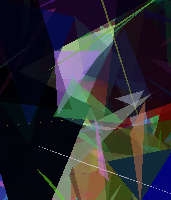

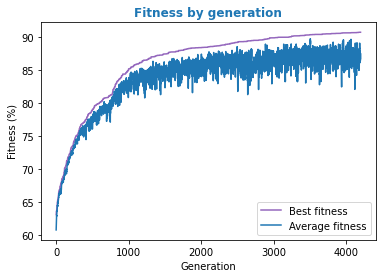

Generation 4201, best fitness: 90.7149%, population average: 87.1852%
Generation 4202, best fitness: 90.7149%, population average: 85.287%
Generation 4203, best fitness: 90.7149%, population average: 86.0268%
Generation 4204, best fitness: 90.7149%, population average: 85.3027%
Generation 4205, best fitness: 90.7149%, population average: 84.9676%
Generation 4206, best fitness: 90.7149%, population average: 86.8291%
Generation 4207, best fitness: 90.7149%, population average: 87.7026%
Generation 4208, best fitness: 90.7149%, population average: 87.8214%
Generation 4209, best fitness: 90.7149%, population average: 87.7777%
Generation 4210, best fitness: 90.7149%, population average: 87.1507%
Generation 4211, best fitness: 90.7149%, population average: 88.3282%
Generation 4212, best fitness: 90.7149%, population average: 87.4149%
Generation 4213, best fitness: 90.7149%, population average: 86.3505%
Generation 4214, best fitness: 90.7149%, population average: 87.5045%
Generation 4215, best

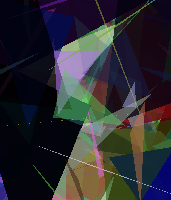

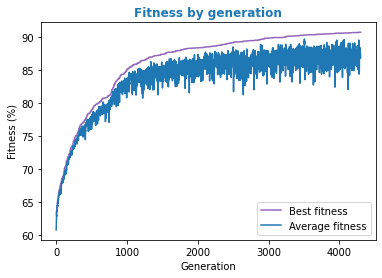

Generation 4301, best fitness: 90.7612%, population average: 88.0634%
Generation 4302, best fitness: 90.7612%, population average: 87.7036%
Generation 4303, best fitness: 90.7612%, population average: 86.8241%
Generation 4304, best fitness: 90.7612%, population average: 86.9964%
Generation 4305, best fitness: 90.7612%, population average: 87.0942%
Generation 4306, best fitness: 90.7612%, population average: 88.2808%
Generation 4307, best fitness: 90.7612%, population average: 87.2685%
Generation 4308, best fitness: 90.7809%, population average: 88.0478%
Generation 4309, best fitness: 90.7809%, population average: 86.5691%
Generation 4310, best fitness: 90.7809%, population average: 87.0864%
Generation 4311, best fitness: 90.7809%, population average: 87.1985%
Generation 4312, best fitness: 90.7809%, population average: 87.4045%
Generation 4313, best fitness: 90.7809%, population average: 86.8859%
Generation 4314, best fitness: 90.7809%, population average: 88.4415%
Generation 4315, bes

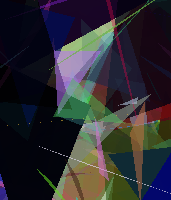

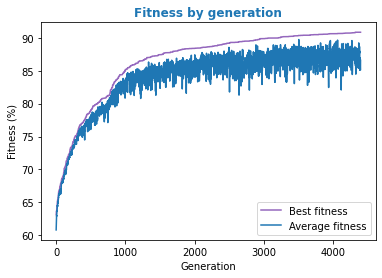

Generation 4401, best fitness: 90.8388%, population average: 87.4785%
Generation 4402, best fitness: 90.8388%, population average: 88.4426%
Generation 4403, best fitness: 90.8388%, population average: 87.2401%
Generation 4404, best fitness: 90.8388%, population average: 88.6575%
Generation 4405, best fitness: 90.8388%, population average: 88.8541%
Generation 4406, best fitness: 90.8388%, population average: 87.8894%
Generation 4407, best fitness: 90.8388%, population average: 88.2796%
Generation 4408, best fitness: 90.8388%, population average: 87.8539%
Generation 4409, best fitness: 90.8388%, population average: 86.0323%
Generation 4410, best fitness: 90.8388%, population average: 86.2924%
Generation 4411, best fitness: 90.8388%, population average: 85.965%
Generation 4412, best fitness: 90.8388%, population average: 89.7733%
Generation 4413, best fitness: 90.8388%, population average: 89.2343%
Generation 4414, best fitness: 90.8388%, population average: 88.0989%
Generation 4415, best

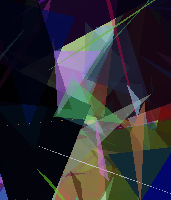

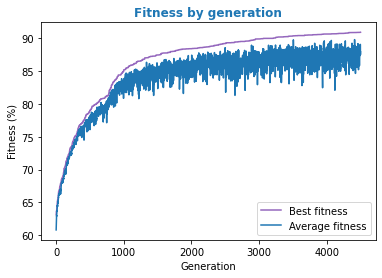

Generation 4501, best fitness: 90.8906%, population average: 88.704%
Generation 4502, best fitness: 90.8906%, population average: 87.7932%
Generation 4503, best fitness: 90.8906%, population average: 88.0135%
Generation 4504, best fitness: 90.8906%, population average: 87.7332%
Generation 4505, best fitness: 90.8906%, population average: 87.998%
Generation 4506, best fitness: 90.8906%, population average: 86.4029%
Generation 4507, best fitness: 90.8906%, population average: 87.058%
Generation 4508, best fitness: 90.8906%, population average: 87.1259%
Generation 4509, best fitness: 90.8906%, population average: 87.1954%
Generation 4510, best fitness: 90.8906%, population average: 87.4448%
Generation 4511, best fitness: 90.8906%, population average: 87.2643%
Generation 4512, best fitness: 90.8906%, population average: 86.779%
Generation 4513, best fitness: 90.8906%, population average: 86.2927%
Generation 4514, best fitness: 90.8906%, population average: 87.7824%
Generation 4515, best fi

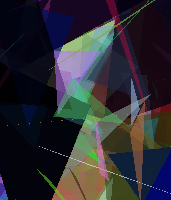

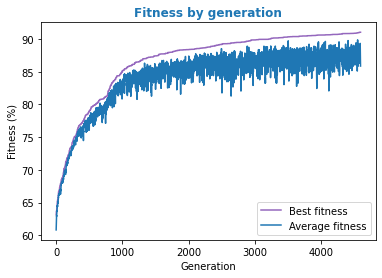

Generation 4601, best fitness: 91.0458%, population average: 86.5422%
Generation 4602, best fitness: 91.0458%, population average: 89.493%
Generation 4603, best fitness: 91.0458%, population average: 88.3884%
Generation 4604, best fitness: 91.0458%, population average: 88.2888%
Generation 4605, best fitness: 91.0458%, population average: 88.6918%
Generation 4606, best fitness: 91.0458%, population average: 88.1916%
Generation 4607, best fitness: 91.0458%, population average: 89.5524%
Generation 4608, best fitness: 91.0458%, population average: 88.0405%
Generation 4609, best fitness: 91.0458%, population average: 87.7935%
Generation 4610, best fitness: 91.0458%, population average: 87.7433%
Generation 4611, best fitness: 91.0458%, population average: 86.8231%
Generation 4612, best fitness: 91.0458%, population average: 88.188%
Generation 4613, best fitness: 91.0458%, population average: 87.8498%
Generation 4614, best fitness: 91.0458%, population average: 88.0023%
Generation 4615, best 

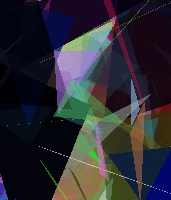

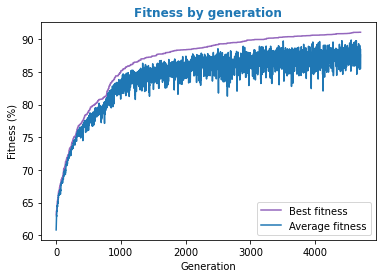

Generation 4701, best fitness: 91.0671%, population average: 87.3631%
Generation 4702, best fitness: 91.0671%, population average: 87.5959%
Generation 4703, best fitness: 91.0671%, population average: 86.2325%
Generation 4704, best fitness: 91.0671%, population average: 85.8595%
Generation 4705, best fitness: 91.0671%, population average: 87.4327%
Generation 4706, best fitness: 91.0671%, population average: 87.0299%
Generation 4707, best fitness: 91.0671%, population average: 86.9559%
Generation 4708, best fitness: 91.0671%, population average: 87.275%
Generation 4709, best fitness: 91.0671%, population average: 86.9166%
Generation 4710, best fitness: 91.0671%, population average: 87.8487%
Generation 4711, best fitness: 91.0671%, population average: 87.8335%
Generation 4712, best fitness: 91.0671%, population average: 86.6209%
Generation 4713, best fitness: 91.0671%, population average: 87.8745%
Generation 4714, best fitness: 91.0801%, population average: 86.0274%
Generation 4715, best

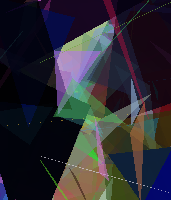

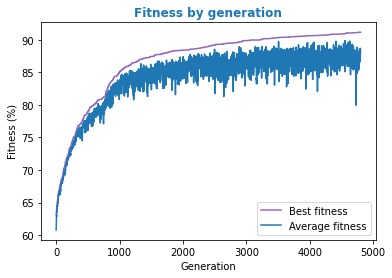

Generation 4801, best fitness: 91.1539%, population average: 87.8632%
Generation 4802, best fitness: 91.1539%, population average: 88.7543%
Generation 4803, best fitness: 91.1539%, population average: 89.7989%
Generation 4804, best fitness: 91.1539%, population average: 88.5237%
Generation 4805, best fitness: 91.1539%, population average: 88.5942%
Generation 4806, best fitness: 91.1539%, population average: 88.245%
Generation 4807, best fitness: 91.1539%, population average: 88.2723%
Generation 4808, best fitness: 91.1539%, population average: 87.197%
Generation 4809, best fitness: 91.1539%, population average: 87.8565%
Generation 4810, best fitness: 91.1539%, population average: 86.9839%
Generation 4811, best fitness: 91.1539%, population average: 87.0669%
Generation 4812, best fitness: 91.2564%, population average: 88.2823%
Generation 4813, best fitness: 91.2564%, population average: 87.6857%
Generation 4814, best fitness: 91.2564%, population average: 86.2038%
Generation 4815, best 

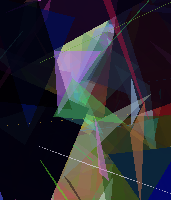

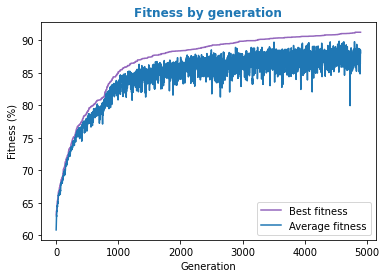

Generation 4901, best fitness: 91.2564%, population average: 88.0929%
Generation 4902, best fitness: 91.2564%, population average: 87.4502%
Generation 4903, best fitness: 91.2564%, population average: 87.8108%
Generation 4904, best fitness: 91.2564%, population average: 86.9492%
Generation 4905, best fitness: 91.2564%, population average: 87.3624%
Generation 4906, best fitness: 91.2564%, population average: 87.234%
Generation 4907, best fitness: 91.2564%, population average: 88.1646%
Generation 4908, best fitness: 91.2564%, population average: 89.0125%
Generation 4909, best fitness: 91.2564%, population average: 87.0385%
Generation 4910, best fitness: 91.2564%, population average: 88.982%
Generation 4911, best fitness: 91.2564%, population average: 88.9596%
Generation 4912, best fitness: 91.2564%, population average: 87.9062%
Generation 4913, best fitness: 91.2564%, population average: 87.9144%
Generation 4914, best fitness: 91.2564%, population average: 88.3808%
Generation 4915, best 

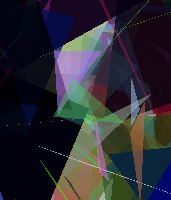

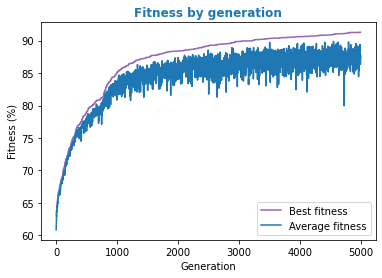

Generation 5001, best fitness: 91.2965%, population average: 87.5742%
Generation 5002, best fitness: 91.2965%, population average: 88.8171%
Generation 5003, best fitness: 91.2965%, population average: 88.0825%
Generation 5004, best fitness: 91.2965%, population average: 88.8487%
Generation 5005, best fitness: 91.2965%, population average: 89.4416%
Generation 5006, best fitness: 91.2965%, population average: 89.2283%
Generation 5007, best fitness: 91.2965%, population average: 88.9196%
Generation 5008, best fitness: 91.2965%, population average: 87.6853%
Generation 5009, best fitness: 91.2965%, population average: 86.8755%
Generation 5010, best fitness: 91.2965%, population average: 89.1979%
Generation 5011, best fitness: 91.2965%, population average: 87.0319%
Generation 5012, best fitness: 91.2965%, population average: 86.449%
Generation 5013, best fitness: 91.2965%, population average: 86.5626%
Generation 5014, best fitness: 91.2965%, population average: 87.9113%
Generation 5015, best

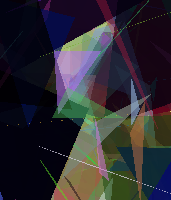

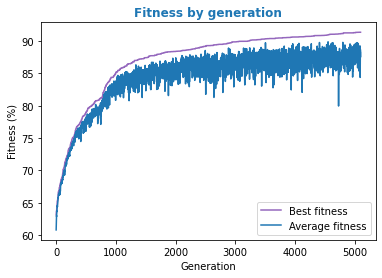

Generation 5101, best fitness: 91.358%, population average: 88.3988%
Generation 5102, best fitness: 91.358%, population average: 87.4344%
Generation 5103, best fitness: 91.358%, population average: 85.2698%
Generation 5104, best fitness: 91.358%, population average: 87.4105%
Generation 5105, best fitness: 91.358%, population average: 87.3371%
Generation 5106, best fitness: 91.358%, population average: 88.0266%
Generation 5107, best fitness: 91.362%, population average: 86.8749%
Generation 5108, best fitness: 91.362%, population average: 86.9194%
Generation 5109, best fitness: 91.362%, population average: 86.0597%
Generation 5110, best fitness: 91.362%, population average: 86.0835%
Generation 5111, best fitness: 91.362%, population average: 86.936%
Generation 5112, best fitness: 91.362%, population average: 87.4235%
Generation 5113, best fitness: 91.362%, population average: 87.1967%
Generation 5114, best fitness: 91.362%, population average: 86.7376%
Generation 5115, best fitness: 91.3

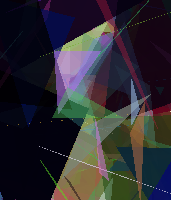

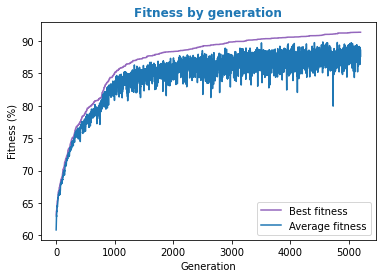

Generation 5201, best fitness: 91.3778%, population average: 89.3955%
Generation 5202, best fitness: 91.3778%, population average: 88.8452%
Generation 5203, best fitness: 91.3778%, population average: 89.1808%
Generation 5204, best fitness: 91.3778%, population average: 88.4229%
Generation 5205, best fitness: 91.3778%, population average: 88.0383%
Generation 5206, best fitness: 91.3778%, population average: 87.3964%
Generation 5207, best fitness: 91.3778%, population average: 88.3574%
Generation 5208, best fitness: 91.3778%, population average: 87.4651%
Generation 5209, best fitness: 91.3778%, population average: 87.5525%
Generation 5210, best fitness: 91.3778%, population average: 88.3592%
Generation 5211, best fitness: 91.3778%, population average: 89.0564%
Generation 5212, best fitness: 91.3778%, population average: 87.7698%
Generation 5213, best fitness: 91.3778%, population average: 88.3115%
Generation 5214, best fitness: 91.3778%, population average: 90.0676%
Generation 5215, bes

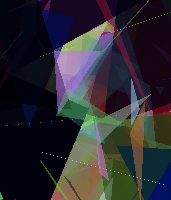

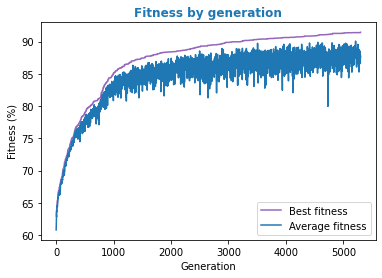

Generation 5301, best fitness: 91.4395%, population average: 88.8164%
Generation 5302, best fitness: 91.4395%, population average: 87.2913%
Generation 5303, best fitness: 91.4395%, population average: 85.6154%
Generation 5304, best fitness: 91.4395%, population average: 87.6325%
Generation 5305, best fitness: 91.4395%, population average: 87.2711%
Generation 5306, best fitness: 91.4395%, population average: 88.6962%
Generation 5307, best fitness: 91.4395%, population average: 87.1463%
Generation 5308, best fitness: 91.4395%, population average: 88.0714%
Generation 5309, best fitness: 91.4395%, population average: 86.9291%
Generation 5310, best fitness: 91.4395%, population average: 86.3636%
Generation 5311, best fitness: 91.4395%, population average: 88.7446%
Generation 5312, best fitness: 91.4395%, population average: 90.0838%
Generation 5313, best fitness: 91.4395%, population average: 87.6351%
Generation 5314, best fitness: 91.4395%, population average: 87.5683%
Generation 5315, bes

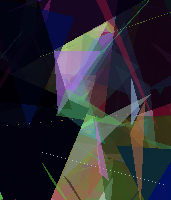

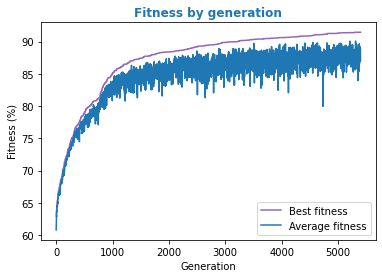

Generation 5401, best fitness: 91.4438%, population average: 87.0436%
Generation 5402, best fitness: 91.4438%, population average: 88.4039%
Generation 5403, best fitness: 91.4438%, population average: 89.0725%
Generation 5404, best fitness: 91.4438%, population average: 88.0326%
Generation 5405, best fitness: 91.4438%, population average: 89.8414%
Generation 5406, best fitness: 91.4438%, population average: 89.0694%
Generation 5407, best fitness: 91.4438%, population average: 89.4888%
Generation 5408, best fitness: 91.4438%, population average: 89.6108%
Generation 5409, best fitness: 91.4438%, population average: 89.5012%
Generation 5410, best fitness: 91.4438%, population average: 89.6506%
Generation 5411, best fitness: 91.4438%, population average: 88.4996%
Generation 5412, best fitness: 91.445%, population average: 88.1543%
Generation 5413, best fitness: 91.445%, population average: 88.8649%
Generation 5414, best fitness: 91.445%, population average: 87.208%
Generation 5415, best fi

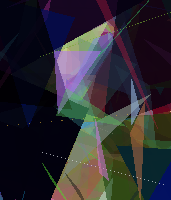

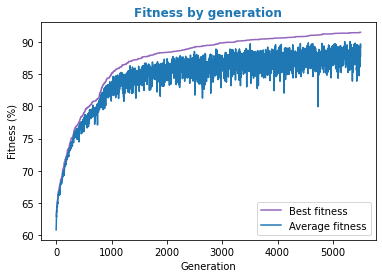

Generation 5501, best fitness: 91.5234%, population average: 88.3317%
Generation 5502, best fitness: 91.5234%, population average: 85.5867%
Generation 5503, best fitness: 91.5234%, population average: 85.344%
Generation 5504, best fitness: 91.5234%, population average: 87.0492%
Generation 5505, best fitness: 91.5234%, population average: 87.167%
Generation 5506, best fitness: 91.5234%, population average: 86.0128%
Generation 5507, best fitness: 91.5234%, population average: 86.4293%
Generation 5508, best fitness: 91.5234%, population average: 87.2184%
Generation 5509, best fitness: 91.5234%, population average: 85.3353%
Generation 5510, best fitness: 91.5234%, population average: 86.625%
Generation 5511, best fitness: 91.5234%, population average: 85.4339%
Generation 5512, best fitness: 91.5234%, population average: 86.2827%
Generation 5513, best fitness: 91.5234%, population average: 89.1185%
Generation 5514, best fitness: 91.5234%, population average: 89.3288%
Generation 5515, best f

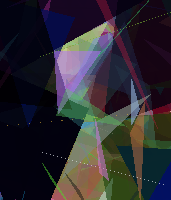

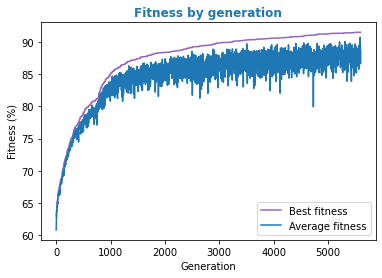

Generation 5601, best fitness: 91.5384%, population average: 87.7956%
Generation 5602, best fitness: 91.5384%, population average: 87.7295%
Generation 5603, best fitness: 91.5384%, population average: 89.2299%
Generation 5604, best fitness: 91.5384%, population average: 87.9229%
Generation 5605, best fitness: 91.5384%, population average: 87.1027%
Generation 5606, best fitness: 91.5384%, population average: 85.7868%
Generation 5607, best fitness: 91.5384%, population average: 87.5737%
Generation 5608, best fitness: 91.5384%, population average: 89.2435%
Generation 5609, best fitness: 91.5384%, population average: 88.7367%
Generation 5610, best fitness: 91.5384%, population average: 88.6212%
Generation 5611, best fitness: 91.5384%, population average: 88.9818%
Generation 5612, best fitness: 91.5384%, population average: 88.5286%
Generation 5613, best fitness: 91.5384%, population average: 90.1623%
Generation 5614, best fitness: 91.5384%, population average: 88.6061%
Generation 5615, bes

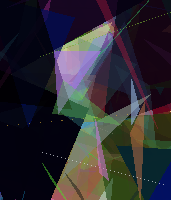

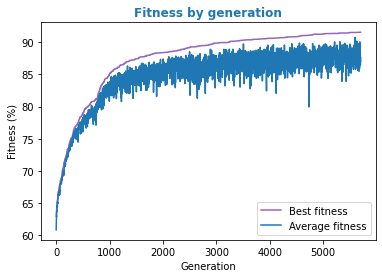

Generation 5701, best fitness: 91.5658%, population average: 87.1685%
Generation 5702, best fitness: 91.5658%, population average: 87.9455%
Generation 5703, best fitness: 91.5658%, population average: 88.7491%
Generation 5704, best fitness: 91.5658%, population average: 88.6332%
Generation 5705, best fitness: 91.5658%, population average: 88.8056%
Generation 5706, best fitness: 91.5658%, population average: 89.0863%
Generation 5707, best fitness: 91.5658%, population average: 87.9466%
Generation 5708, best fitness: 91.5658%, population average: 89.0086%
Generation 5709, best fitness: 91.5658%, population average: 86.8624%
Generation 5710, best fitness: 91.5658%, population average: 87.1293%
Generation 5711, best fitness: 91.5658%, population average: 86.8628%
Generation 5712, best fitness: 91.5658%, population average: 85.4014%
Generation 5713, best fitness: 91.5658%, population average: 85.3796%
Generation 5714, best fitness: 91.5658%, population average: 86.446%
Generation 5715, best

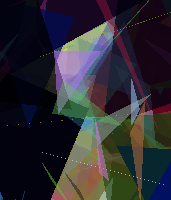

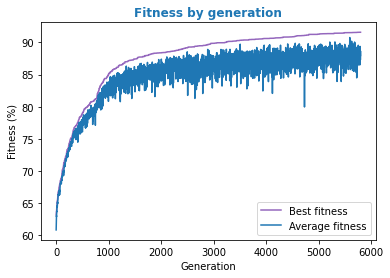

Generation 5801, best fitness: 91.5929%, population average: 88.7825%
Generation 5802, best fitness: 91.5929%, population average: 88.6315%
Generation 5803, best fitness: 91.5929%, population average: 88.5542%
Generation 5804, best fitness: 91.5929%, population average: 89.5991%
Generation 5805, best fitness: 91.5929%, population average: 89.2531%
Generation 5806, best fitness: 91.6355%, population average: 89.6293%
Generation 5807, best fitness: 91.6355%, population average: 90.3713%
Generation 5808, best fitness: 91.6355%, population average: 89.861%
Generation 5809, best fitness: 91.6355%, population average: 87.5626%
Generation 5810, best fitness: 91.6355%, population average: 87.1723%
Generation 5811, best fitness: 91.6355%, population average: 88.6885%
Generation 5812, best fitness: 91.6355%, population average: 86.7782%
Generation 5813, best fitness: 91.6355%, population average: 88.8019%
Generation 5814, best fitness: 91.6355%, population average: 88.3464%
Generation 5815, best

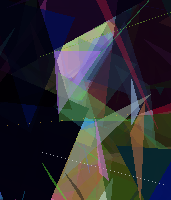

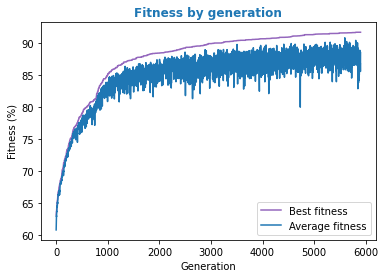

Generation 5901, best fitness: 91.6384%, population average: 89.5168%
Generation 5902, best fitness: 91.6384%, population average: 89.4055%
Generation 5903, best fitness: 91.6384%, population average: 88.5882%
Generation 5904, best fitness: 91.6384%, population average: 87.3061%
Generation 5905, best fitness: 91.6384%, population average: 85.5559%
Generation 5906, best fitness: 91.6384%, population average: 86.2073%
Generation 5907, best fitness: 91.6384%, population average: 85.1966%
Generation 5908, best fitness: 91.6384%, population average: 86.2561%
Generation 5909, best fitness: 91.6384%, population average: 86.1706%
Generation 5910, best fitness: 91.6384%, population average: 85.8953%
Generation 5911, best fitness: 91.6384%, population average: 87.1257%
Generation 5912, best fitness: 91.6384%, population average: 89.0825%
Generation 5913, best fitness: 91.6384%, population average: 87.2866%
Generation 5914, best fitness: 91.6384%, population average: 87.0419%
Generation 5915, bes

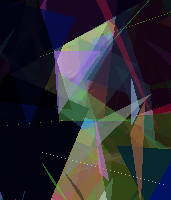

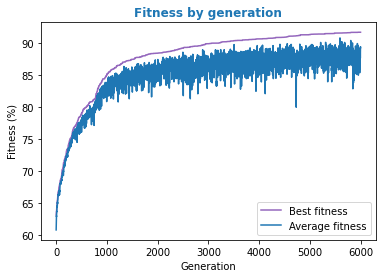

Generation 6001, best fitness: 91.6574%, population average: 88.6882%
Generation 6002, best fitness: 91.6574%, population average: 88.1673%
Generation 6003, best fitness: 91.6574%, population average: 88.9478%
Generation 6004, best fitness: 91.6574%, population average: 87.839%
Generation 6005, best fitness: 91.6574%, population average: 88.0325%
Generation 6006, best fitness: 91.6574%, population average: 88.167%
Generation 6007, best fitness: 91.6574%, population average: 87.7199%
Generation 6008, best fitness: 91.6574%, population average: 87.5518%
Generation 6009, best fitness: 91.6574%, population average: 88.193%
Generation 6010, best fitness: 91.6574%, population average: 88.3828%
Generation 6011, best fitness: 91.6574%, population average: 88.5213%
Generation 6012, best fitness: 91.6574%, population average: 88.6124%
Generation 6013, best fitness: 91.6574%, population average: 88.2918%
Generation 6014, best fitness: 91.6574%, population average: 88.1269%
Generation 6015, best f

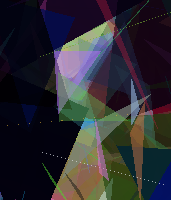

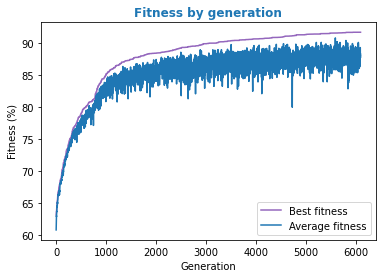

Generation 6101, best fitness: 91.6583%, population average: 88.7746%
Generation 6102, best fitness: 91.6583%, population average: 88.1284%
Generation 6103, best fitness: 91.6583%, population average: 88.8501%
Generation 6104, best fitness: 91.6583%, population average: 89.7067%
Generation 6105, best fitness: 91.6583%, population average: 87.9471%
Generation 6106, best fitness: 91.6583%, population average: 88.0097%
Generation 6107, best fitness: 91.6583%, population average: 86.6756%
Generation 6108, best fitness: 91.6583%, population average: 88.5114%
Generation 6109, best fitness: 91.6583%, population average: 89.088%
Generation 6110, best fitness: 91.6583%, population average: 89.1219%
Generation 6111, best fitness: 91.6583%, population average: 89.5085%
Generation 6112, best fitness: 91.6583%, population average: 88.4555%
Generation 6113, best fitness: 91.6583%, population average: 89.4335%
Generation 6114, best fitness: 91.6583%, population average: 88.6028%
Generation 6115, best

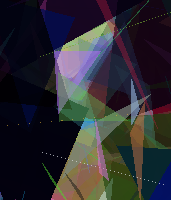

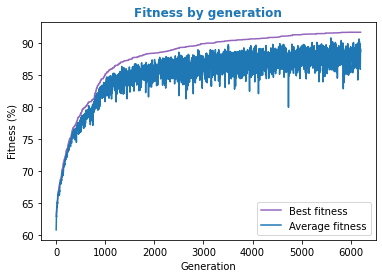

Generation 6201, best fitness: 91.6583%, population average: 88.9016%
Generation 6202, best fitness: 91.6583%, population average: 88.7385%
Generation 6203, best fitness: 91.6583%, population average: 89.5807%
Generation 6204, best fitness: 91.6583%, population average: 87.7939%
Generation 6205, best fitness: 91.6583%, population average: 87.4511%
Generation 6206, best fitness: 91.6583%, population average: 87.0953%
Generation 6207, best fitness: 91.6583%, population average: 88.0106%
Generation 6208, best fitness: 91.6583%, population average: 88.9261%
Generation 6209, best fitness: 91.6583%, population average: 87.159%
Generation 6210, best fitness: 91.6583%, population average: 87.1401%
Generation 6211, best fitness: 91.6583%, population average: 89.772%
Generation 6212, best fitness: 91.6583%, population average: 89.91%
Generation 6213, best fitness: 91.6583%, population average: 89.4367%
Generation 6214, best fitness: 91.6583%, population average: 88.7053%
Generation 6215, best fi

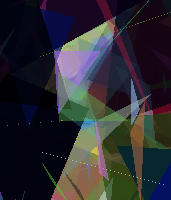

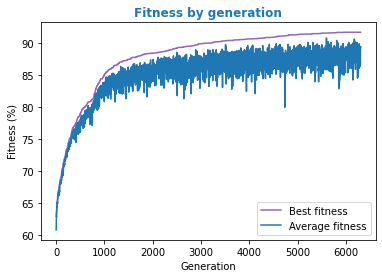

Generation 6301, best fitness: 91.6621%, population average: 89.0932%
Generation 6302, best fitness: 91.6621%, population average: 88.7457%
Generation 6303, best fitness: 91.6621%, population average: 89.1325%
Generation 6304, best fitness: 91.6621%, population average: 88.3969%
Generation 6305, best fitness: 91.6663%, population average: 88.0241%
Generation 6306, best fitness: 91.6663%, population average: 87.8382%
Generation 6307, best fitness: 91.6663%, population average: 87.0954%
Generation 6308, best fitness: 91.6663%, population average: 88.1073%
Generation 6309, best fitness: 91.6663%, population average: 87.6808%
Generation 6310, best fitness: 91.6663%, population average: 86.0217%
Generation 6311, best fitness: 91.6663%, population average: 88.0817%
Generation 6312, best fitness: 91.6663%, population average: 87.1018%
Generation 6313, best fitness: 91.6663%, population average: 87.2342%
Generation 6314, best fitness: 91.6663%, population average: 88.1448%
Generation 6315, bes

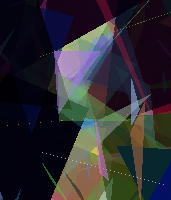

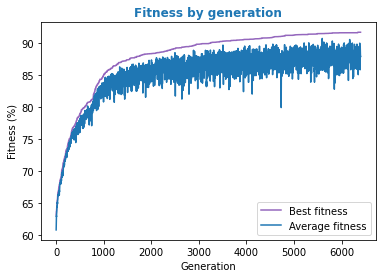

Generation 6401, best fitness: 91.7415%, population average: 88.9257%
Generation 6402, best fitness: 91.7415%, population average: 89.6705%
Generation 6403, best fitness: 91.7415%, population average: 88.1651%
Generation 6404, best fitness: 91.7415%, population average: 86.4167%
Generation 6405, best fitness: 91.7415%, population average: 87.9109%
Generation 6406, best fitness: 91.7415%, population average: 87.2515%
Generation 6407, best fitness: 91.7415%, population average: 88.9285%
Generation 6408, best fitness: 91.7415%, population average: 88.4522%
Generation 6409, best fitness: 91.7415%, population average: 88.3199%
Generation 6410, best fitness: 91.7415%, population average: 89.1092%
Generation 6411, best fitness: 91.7415%, population average: 88.7306%
Generation 6412, best fitness: 91.7415%, population average: 87.4216%
Generation 6413, best fitness: 91.7415%, population average: 87.2327%
Generation 6414, best fitness: 91.7415%, population average: 86.92%
Generation 6415, best 

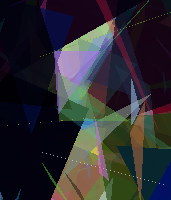

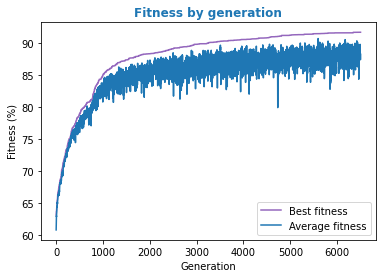

Generation 6501, best fitness: 91.7562%, population average: 89.0003%
Generation 6502, best fitness: 91.7562%, population average: 87.2297%
Generation 6503, best fitness: 91.7562%, population average: 86.542%
Generation 6504, best fitness: 91.7562%, population average: 87.1205%
Generation 6505, best fitness: 91.7562%, population average: 88.2859%
Generation 6506, best fitness: 91.7562%, population average: 86.1014%
Generation 6507, best fitness: 91.7562%, population average: 87.1314%
Generation 6508, best fitness: 91.7742%, population average: 87.0409%
Generation 6509, best fitness: 91.7742%, population average: 86.4223%
Generation 6510, best fitness: 91.7742%, population average: 88.6045%
Generation 6511, best fitness: 91.7742%, population average: 89.5111%
Generation 6512, best fitness: 91.7742%, population average: 87.9288%
Generation 6513, best fitness: 91.7742%, population average: 87.2833%
Generation 6514, best fitness: 91.7742%, population average: 87.535%
Generation 6515, best 

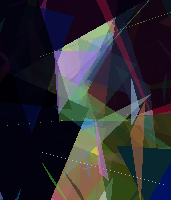

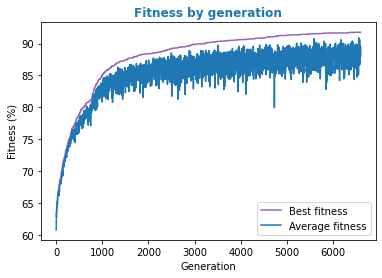

Generation 6601, best fitness: 91.7742%, population average: 89.0133%
Generation 6602, best fitness: 91.7742%, population average: 89.7763%
Generation 6603, best fitness: 91.7742%, population average: 89.484%
Generation 6604, best fitness: 91.7742%, population average: 88.5644%
Generation 6605, best fitness: 91.7742%, population average: 87.4174%
Generation 6606, best fitness: 91.7742%, population average: 87.5499%
Generation 6607, best fitness: 91.7742%, population average: 87.6394%
Generation 6608, best fitness: 91.7742%, population average: 88.343%
Generation 6609, best fitness: 91.7742%, population average: 86.8479%
Generation 6610, best fitness: 91.7742%, population average: 87.0945%
Generation 6611, best fitness: 91.7742%, population average: 88.7951%
Generation 6612, best fitness: 91.7742%, population average: 90.1974%
Generation 6613, best fitness: 91.7742%, population average: 89.8809%
Generation 6614, best fitness: 91.7742%, population average: 89.9371%
Generation 6615, best 

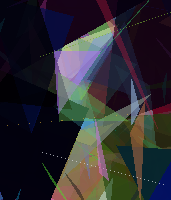

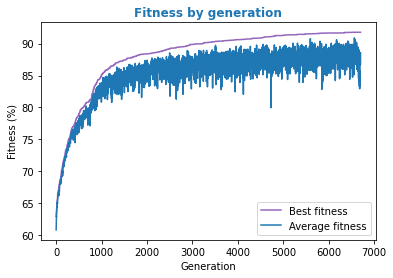

Generation 6701, best fitness: 91.7797%, population average: 86.6384%
Generation 6702, best fitness: 91.7797%, population average: 84.7811%
Generation 6703, best fitness: 91.7797%, population average: 84.8929%
Generation 6704, best fitness: 91.7797%, population average: 85.0092%
Generation 6705, best fitness: 91.7798%, population average: 85.1575%
Generation 6706, best fitness: 91.7798%, population average: 86.4925%
Generation 6707, best fitness: 91.7798%, population average: 87.2629%
Generation 6708, best fitness: 91.7798%, population average: 89.1295%
Generation 6709, best fitness: 91.7798%, population average: 89.084%
Generation 6710, best fitness: 91.7798%, population average: 89.0428%
Generation 6711, best fitness: 91.7798%, population average: 88.4395%
Generation 6712, best fitness: 91.7798%, population average: 87.3937%
Generation 6713, best fitness: 91.7798%, population average: 88.4243%
Generation 6714, best fitness: 91.7798%, population average: 88.9607%
Generation 6715, best

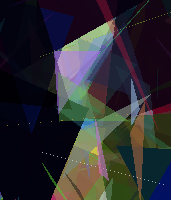

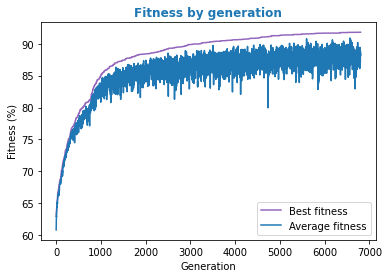

Generation 6801, best fitness: 91.798%, population average: 89.191%
Generation 6802, best fitness: 91.798%, population average: 88.8251%
Generation 6803, best fitness: 91.798%, population average: 88.5117%
Generation 6804, best fitness: 91.798%, population average: 87.9345%
Generation 6805, best fitness: 91.798%, population average: 86.7639%
Generation 6806, best fitness: 91.798%, population average: 86.9095%
Generation 6807, best fitness: 91.798%, population average: 87.18%
Generation 6808, best fitness: 91.798%, population average: 88.3339%
Generation 6809, best fitness: 91.798%, population average: 88.032%
Generation 6810, best fitness: 91.798%, population average: 87.9037%
Generation 6811, best fitness: 91.798%, population average: 88.6024%
Generation 6812, best fitness: 91.798%, population average: 87.6718%
Generation 6813, best fitness: 91.798%, population average: 85.9968%
Generation 6814, best fitness: 91.798%, population average: 85.4189%
Generation 6815, best fitness: 91.798%

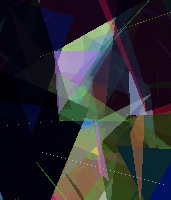

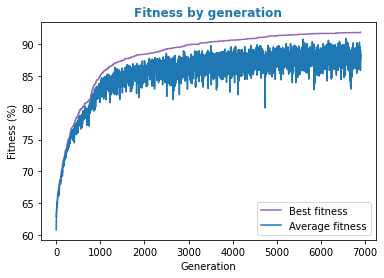

Generation 6901, best fitness: 91.8504%, population average: 88.6601%
Generation 6902, best fitness: 91.8504%, population average: 88.8029%
Generation 6903, best fitness: 91.8504%, population average: 87.9457%
Generation 6904, best fitness: 91.8504%, population average: 89.4668%
Generation 6905, best fitness: 91.8504%, population average: 87.7822%
Generation 6906, best fitness: 91.8504%, population average: 87.1239%
Generation 6907, best fitness: 91.8504%, population average: 86.5088%
Generation 6908, best fitness: 91.8504%, population average: 87.8254%
Generation 6909, best fitness: 91.8504%, population average: 87.2799%
Generation 6910, best fitness: 91.8504%, population average: 87.8443%
Generation 6911, best fitness: 91.8504%, population average: 89.4449%
Generation 6912, best fitness: 91.8504%, population average: 88.2207%
Generation 6913, best fitness: 91.8504%, population average: 88.7267%
Generation 6914, best fitness: 91.8504%, population average: 89.3537%
Generation 6915, bes

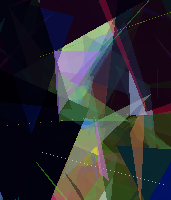

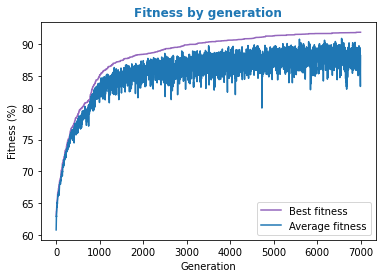

Generation 7001, best fitness: 91.8608%, population average: 84.5847%
Generation 7002, best fitness: 91.8608%, population average: 86.2852%
Generation 7003, best fitness: 91.8608%, population average: 87.6415%
Generation 7004, best fitness: 91.8608%, population average: 87.8028%
Generation 7005, best fitness: 91.8608%, population average: 88.1534%
Generation 7006, best fitness: 91.8608%, population average: 87.1927%
Generation 7007, best fitness: 91.8608%, population average: 85.8764%
Generation 7008, best fitness: 91.8608%, population average: 87.4057%
Generation 7009, best fitness: 91.8608%, population average: 88.5557%
Generation 7010, best fitness: 91.8608%, population average: 87.3178%
Generation 7011, best fitness: 91.8608%, population average: 87.4169%
Generation 7012, best fitness: 91.8608%, population average: 87.5661%
Generation 7013, best fitness: 91.8608%, population average: 87.9946%
Generation 7014, best fitness: 91.8608%, population average: 88.7811%
Generation 7015, bes

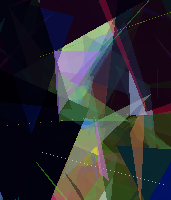

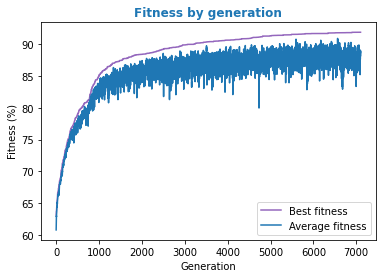

Generation 7101, best fitness: 91.8608%, population average: 88.1709%
Generation 7102, best fitness: 91.8608%, population average: 86.669%
Generation 7103, best fitness: 91.8608%, population average: 86.4946%
Generation 7104, best fitness: 91.8608%, population average: 88.8399%
Generation 7105, best fitness: 91.8608%, population average: 89.4946%
Generation 7106, best fitness: 91.8608%, population average: 88.0025%
Generation 7107, best fitness: 91.8608%, population average: 87.432%
Generation 7108, best fitness: 91.8608%, population average: 88.1141%
Generation 7109, best fitness: 91.8608%, population average: 89.4169%
Generation 7110, best fitness: 91.8608%, population average: 88.2599%
Generation 7111, best fitness: 91.8608%, population average: 87.6607%
Generation 7112, best fitness: 91.8608%, population average: 88.4452%
Generation 7113, best fitness: 91.8608%, population average: 87.515%
Generation 7114, best fitness: 91.8608%, population average: 88.1441%
Generation 7115, best f

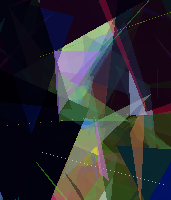

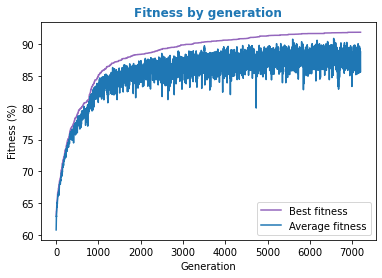

Generation 7201, best fitness: 91.8608%, population average: 87.3756%
Generation 7202, best fitness: 91.8608%, population average: 87.9257%
Generation 7203, best fitness: 91.8608%, population average: 88.8151%
Generation 7204, best fitness: 91.8608%, population average: 89.6697%
Generation 7205, best fitness: 91.8608%, population average: 88.5581%
Generation 7206, best fitness: 91.8608%, population average: 87.9999%
Generation 7207, best fitness: 91.8608%, population average: 86.995%
Generation 7208, best fitness: 91.8608%, population average: 88.5118%
Generation 7209, best fitness: 91.8608%, population average: 88.6%
Generation 7210, best fitness: 91.8608%, population average: 89.1122%
Generation 7211, best fitness: 91.8608%, population average: 89.365%
Generation 7212, best fitness: 91.8608%, population average: 87.9288%
Generation 7213, best fitness: 91.8608%, population average: 87.1803%
Generation 7214, best fitness: 91.8788%, population average: 87.6307%
Generation 7215, best fit

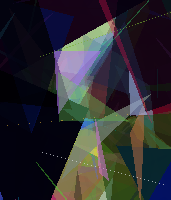

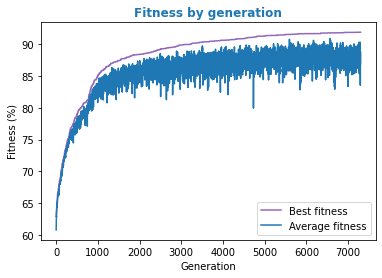

Generation 7301, best fitness: 91.8788%, population average: 87.518%
Generation 7302, best fitness: 91.8788%, population average: 86.6726%
Generation 7303, best fitness: 91.8788%, population average: 85.0402%
Generation 7304, best fitness: 91.8788%, population average: 87.4116%
Generation 7305, best fitness: 91.8788%, population average: 87.1068%
Generation 7306, best fitness: 91.8788%, population average: 88.5834%
Generation 7307, best fitness: 91.8788%, population average: 88.4228%
Generation 7308, best fitness: 91.8788%, population average: 89.8655%
Generation 7309, best fitness: 91.8788%, population average: 89.4356%
Generation 7310, best fitness: 91.8788%, population average: 89.0634%
Generation 7311, best fitness: 91.8788%, population average: 88.6028%
Generation 7312, best fitness: 91.8788%, population average: 90.1904%
Generation 7313, best fitness: 91.8788%, population average: 88.3729%
Generation 7314, best fitness: 91.8788%, population average: 86.4112%
Generation 7315, best

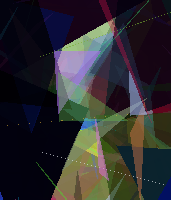

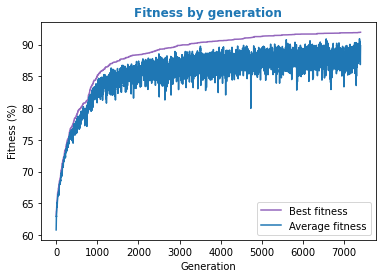

Generation 7401, best fitness: 91.9443%, population average: 89.333%
Generation 7402, best fitness: 91.9443%, population average: 89.6431%
Generation 7403, best fitness: 91.9443%, population average: 90.1791%
Generation 7404, best fitness: 91.9443%, population average: 88.8785%
Generation 7405, best fitness: 91.9443%, population average: 87.3769%
Generation 7406, best fitness: 91.9443%, population average: 86.8311%
Generation 7407, best fitness: 91.9443%, population average: 87.4971%
Generation 7408, best fitness: 91.9443%, population average: 88.2859%
Generation 7409, best fitness: 91.9443%, population average: 87.1873%
Generation 7410, best fitness: 91.9443%, population average: 86.9957%
Generation 7411, best fitness: 91.9443%, population average: 86.635%
Generation 7412, best fitness: 91.9443%, population average: 87.2441%
Generation 7413, best fitness: 91.9443%, population average: 87.6051%
Generation 7414, best fitness: 91.9443%, population average: 88.6224%
Generation 7415, best 

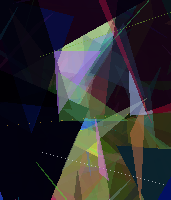

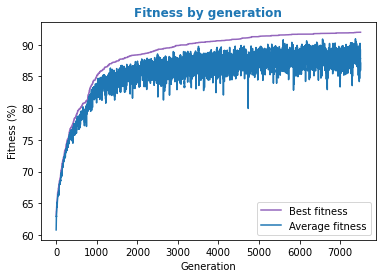

Generation 7501, best fitness: 91.9616%, population average: 86.4217%
Generation 7502, best fitness: 91.9616%, population average: 87.0606%
Generation 7503, best fitness: 91.9616%, population average: 87.4773%
Generation 7504, best fitness: 91.9616%, population average: 88.3531%
Generation 7505, best fitness: 91.9616%, population average: 89.1736%
Generation 7506, best fitness: 91.9616%, population average: 88.8769%
Generation 7507, best fitness: 91.9616%, population average: 87.7904%
Generation 7508, best fitness: 91.9616%, population average: 90.0254%
Generation 7509, best fitness: 91.9616%, population average: 89.6538%
Generation 7510, best fitness: 91.9616%, population average: 89.1755%
Generation 7511, best fitness: 91.9616%, population average: 89.1998%
Generation 7512, best fitness: 91.9616%, population average: 88.0907%
Generation 7513, best fitness: 92.0308%, population average: 89.0294%
Generation 7514, best fitness: 92.0308%, population average: 89.1684%
Generation 7515, bes

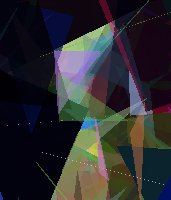

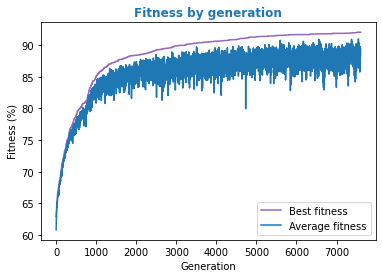

Generation 7601, best fitness: 92.0308%, population average: 88.4177%
Generation 7602, best fitness: 92.0308%, population average: 87.9023%
Generation 7603, best fitness: 92.0308%, population average: 87.3132%
Generation 7604, best fitness: 92.0308%, population average: 87.4315%
Generation 7605, best fitness: 92.0308%, population average: 87.4531%
Generation 7606, best fitness: 92.0308%, population average: 87.257%
Generation 7607, best fitness: 92.0308%, population average: 89.1326%
Generation 7608, best fitness: 92.0308%, population average: 89.556%
Generation 7609, best fitness: 92.0308%, population average: 89.745%
Generation 7610, best fitness: 92.0308%, population average: 90.2166%
Generation 7611, best fitness: 92.0308%, population average: 90.6075%
Generation 7612, best fitness: 92.0308%, population average: 90.2734%
Generation 7613, best fitness: 92.0308%, population average: 87.9039%
Generation 7614, best fitness: 92.0308%, population average: 87.3908%
Generation 7615, best f

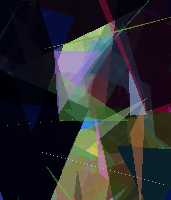

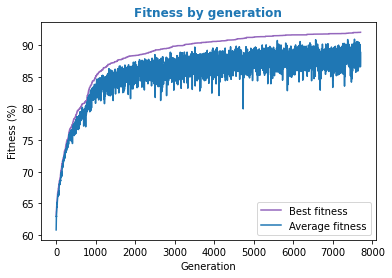

Generation 7701, best fitness: 92.0766%, population average: 89.4105%
Generation 7702, best fitness: 92.0766%, population average: 89.9241%
Generation 7703, best fitness: 92.0766%, population average: 88.653%
Generation 7704, best fitness: 92.0766%, population average: 89.3628%
Generation 7705, best fitness: 92.0766%, population average: 89.5826%
Generation 7706, best fitness: 92.0766%, population average: 89.7291%
Generation 7707, best fitness: 92.0766%, population average: 89.1632%
Generation 7708, best fitness: 92.0766%, population average: 87.275%
Generation 7709, best fitness: 92.0766%, population average: 86.9282%
Generation 7710, best fitness: 92.0766%, population average: 87.8858%
Generation 7711, best fitness: 92.0766%, population average: 88.7491%
Generation 7712, best fitness: 92.0766%, population average: 88.1792%
Generation 7713, best fitness: 92.0766%, population average: 89.0503%
Generation 7714, best fitness: 92.0766%, population average: 88.6416%
Generation 7715, best 

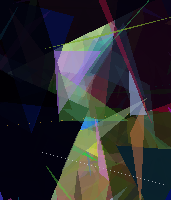

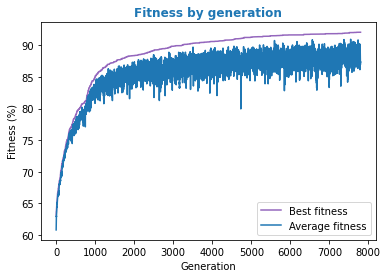

Generation 7801, best fitness: 92.0842%, population average: 85.5584%
Generation 7802, best fitness: 92.0842%, population average: 86.2553%
Generation 7803, best fitness: 92.0842%, population average: 85.6694%
Generation 7804, best fitness: 92.0842%, population average: 84.7955%
Generation 7805, best fitness: 92.0842%, population average: 85.9467%
Generation 7806, best fitness: 92.0842%, population average: 86.7721%
Generation 7807, best fitness: 92.0842%, population average: 86.8719%
Generation 7808, best fitness: 92.0842%, population average: 87.5466%
Generation 7809, best fitness: 92.0842%, population average: 86.997%
Generation 7810, best fitness: 92.0842%, population average: 87.5075%
Generation 7811, best fitness: 92.0842%, population average: 88.1526%
Generation 7812, best fitness: 92.0842%, population average: 87.6293%
Generation 7813, best fitness: 92.0842%, population average: 85.8031%
Generation 7814, best fitness: 92.0842%, population average: 87.8054%
Generation 7815, best

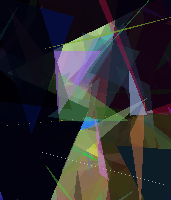

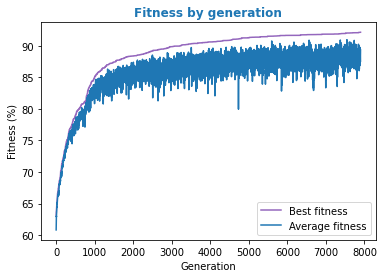

Generation 7901, best fitness: 92.1567%, population average: 88.0449%
Generation 7902, best fitness: 92.1567%, population average: 88.0253%
Generation 7903, best fitness: 92.1567%, population average: 88.9084%
Generation 7904, best fitness: 92.1647%, population average: 86.9225%
Generation 7905, best fitness: 92.1647%, population average: 88.0194%
Generation 7906, best fitness: 92.1647%, population average: 87.743%
Generation 7907, best fitness: 92.1647%, population average: 88.355%
Generation 7908, best fitness: 92.1647%, population average: 87.6698%
Generation 7909, best fitness: 92.1647%, population average: 86.2574%
Generation 7910, best fitness: 92.1647%, population average: 87.6439%
Generation 7911, best fitness: 92.1692%, population average: 89.9385%
Generation 7912, best fitness: 92.1692%, population average: 90.2228%
Generation 7913, best fitness: 92.1692%, population average: 91.1475%
Generation 7914, best fitness: 92.1692%, population average: 90.019%
Generation 7915, best f

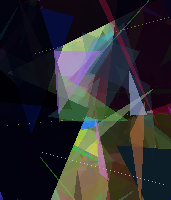

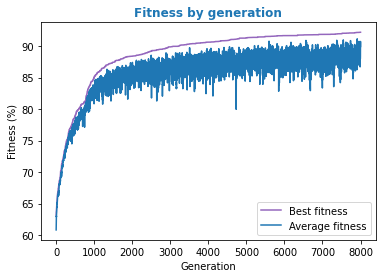

Generation 8001, best fitness: 92.1933%, population average: 89.5243%
Generation 8002, best fitness: 92.1933%, population average: 90.3314%
Generation 8003, best fitness: 92.1933%, population average: 88.9263%
Generation 8004, best fitness: 92.1933%, population average: 88.0385%
Generation 8005, best fitness: 92.213%, population average: 88.2461%
Generation 8006, best fitness: 92.213%, population average: 88.9232%
Generation 8007, best fitness: 92.213%, population average: 88.4563%
Generation 8008, best fitness: 92.213%, population average: 88.8006%
Generation 8009, best fitness: 92.213%, population average: 89.611%
Generation 8010, best fitness: 92.213%, population average: 89.9555%
Generation 8011, best fitness: 92.213%, population average: 89.4411%
Generation 8012, best fitness: 92.213%, population average: 87.5944%
Generation 8013, best fitness: 92.213%, population average: 86.0851%
Generation 8014, best fitness: 92.213%, population average: 86.3426%
Generation 8015, best fitness: 

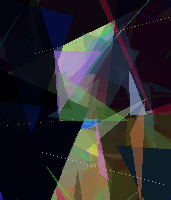

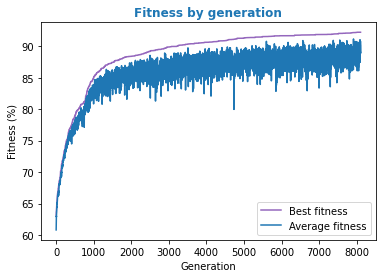

Generation 8101, best fitness: 92.2145%, population average: 87.578%
Generation 8102, best fitness: 92.2145%, population average: 89.7084%
Generation 8103, best fitness: 92.2145%, population average: 88.482%
Generation 8104, best fitness: 92.2145%, population average: 89.4444%
Generation 8105, best fitness: 92.2145%, population average: 89.0374%
Generation 8106, best fitness: 92.2145%, population average: 88.0198%
Generation 8107, best fitness: 92.2145%, population average: 86.7366%
Generation 8108, best fitness: 92.2145%, population average: 85.8982%
Generation 8109, best fitness: 92.2145%, population average: 86.896%
Generation 8110, best fitness: 92.2145%, population average: 86.8814%
Generation 8111, best fitness: 92.2145%, population average: 87.8822%
Generation 8112, best fitness: 92.2145%, population average: 87.3932%
Generation 8113, best fitness: 92.2145%, population average: 87.8042%
Generation 8114, best fitness: 92.2145%, population average: 88.3303%
Generation 8115, best f

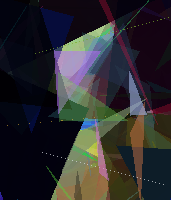

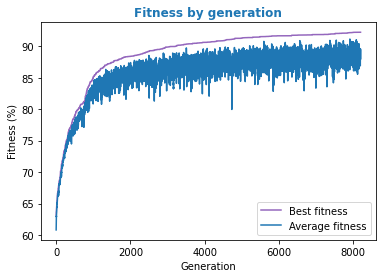

Generation 8201, best fitness: 92.2247%, population average: 89.798%
Generation 8202, best fitness: 92.2247%, population average: 89.805%
Generation 8203, best fitness: 92.2247%, population average: 89.5455%
Generation 8204, best fitness: 92.2247%, population average: 88.9876%
Generation 8205, best fitness: 92.2247%, population average: 88.2811%
Generation 8206, best fitness: 92.2247%, population average: 88.6099%
Generation 8207, best fitness: 92.2247%, population average: 88.4332%
Generation 8208, best fitness: 92.2247%, population average: 87.533%
Generation 8209, best fitness: 92.2247%, population average: 87.0284%
Generation 8210, best fitness: 92.2247%, population average: 85.6222%
Generation 8211, best fitness: 92.2247%, population average: 88.7161%
Generation 8212, best fitness: 92.2247%, population average: 88.3512%
Generation 8213, best fitness: 92.2247%, population average: 88.1377%
Generation 8214, best fitness: 92.2247%, population average: 89.5821%
Generation 8215, best f

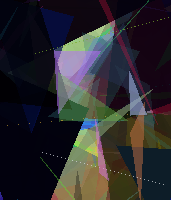

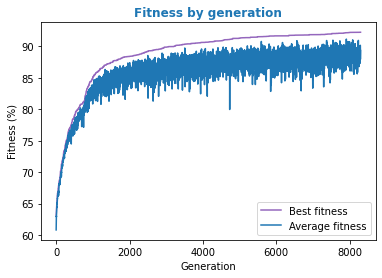

Generation 8301, best fitness: 92.2366%, population average: 88.9685%
Generation 8302, best fitness: 92.2426%, population average: 87.8598%
Generation 8303, best fitness: 92.2426%, population average: 86.8117%
Generation 8304, best fitness: 92.2472%, population average: 87.5299%
Generation 8305, best fitness: 92.2472%, population average: 87.8956%
Generation 8306, best fitness: 92.2472%, population average: 86.7203%
Generation 8307, best fitness: 92.2472%, population average: 87.2129%
Generation 8308, best fitness: 92.2472%, population average: 90.61%
Generation 8309, best fitness: 92.2472%, population average: 89.7215%
Generation 8310, best fitness: 92.2472%, population average: 89.0327%
Generation 8311, best fitness: 92.2472%, population average: 89.0715%
Generation 8312, best fitness: 92.2472%, population average: 90.4463%
Generation 8313, best fitness: 92.2472%, population average: 90.2905%
Generation 8314, best fitness: 92.2472%, population average: 89.7157%
Generation 8315, best 

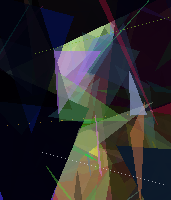

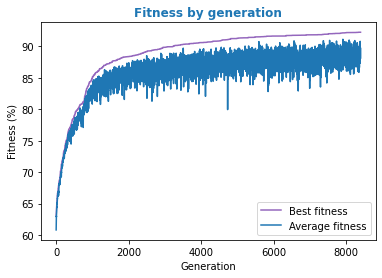

Generation 8401, best fitness: 92.266%, population average: 88.6252%
Generation 8402, best fitness: 92.266%, population average: 90.5397%
Generation 8403, best fitness: 92.266%, population average: 90.1029%
Generation 8404, best fitness: 92.266%, population average: 90.8572%
Generation 8405, best fitness: 92.266%, population average: 89.0559%
Generation 8406, best fitness: 92.266%, population average: 89.0477%
Generation 8407, best fitness: 92.266%, population average: 89.293%
Generation 8408, best fitness: 92.266%, population average: 85.7539%
Generation 8409, best fitness: 92.266%, population average: 84.5476%
Generation 8410, best fitness: 92.266%, population average: 84.9092%
Generation 8411, best fitness: 92.266%, population average: 86.3592%
Generation 8412, best fitness: 92.266%, population average: 87.8785%
Generation 8413, best fitness: 92.266%, population average: 88.863%
Generation 8414, best fitness: 92.266%, population average: 88.5743%
Generation 8415, best fitness: 92.26

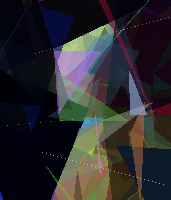

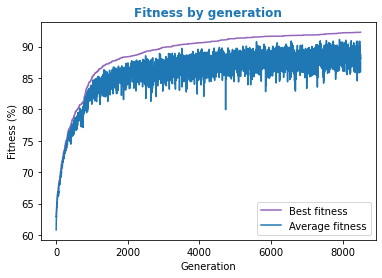

Generation 8501, best fitness: 92.2919%, population average: 88.1718%
Generation 8502, best fitness: 92.2919%, population average: 87.3617%
Generation 8503, best fitness: 92.2919%, population average: 85.3825%
Generation 8504, best fitness: 92.2919%, population average: 86.3784%
Generation 8505, best fitness: 92.2919%, population average: 87.7494%
Generation 8506, best fitness: 92.2919%, population average: 88.3206%
Generation 8507, best fitness: 92.2919%, population average: 88.6093%
Generation 8508, best fitness: 92.2919%, population average: 87.638%
Generation 8509, best fitness: 92.2919%, population average: 90.2555%
Generation 8510, best fitness: 92.2919%, population average: 89.5612%
Generation 8511, best fitness: 92.2919%, population average: 89.212%
Generation 8512, best fitness: 92.2919%, population average: 90.3717%
Generation 8513, best fitness: 92.2919%, population average: 89.4628%
Generation 8514, best fitness: 92.2919%, population average: 88.563%
Generation 8515, best f

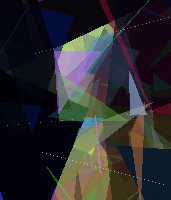

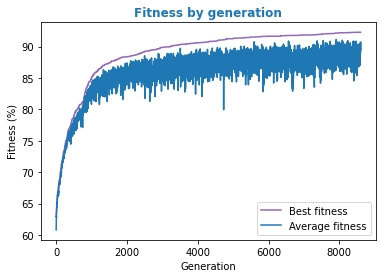

Generation 8601, best fitness: 92.2946%, population average: 90.0348%
Generation 8602, best fitness: 92.2946%, population average: 88.8157%
Generation 8603, best fitness: 92.2946%, population average: 88.3231%
Generation 8604, best fitness: 92.3129%, population average: 88.3124%
Generation 8605, best fitness: 92.3129%, population average: 88.7719%
Generation 8606, best fitness: 92.3129%, population average: 88.5106%
Generation 8607, best fitness: 92.3129%, population average: 88.0585%
Generation 8608, best fitness: 92.3129%, population average: 86.989%
Generation 8609, best fitness: 92.3129%, population average: 86.6891%
Generation 8610, best fitness: 92.3129%, population average: 87.3044%
Generation 8611, best fitness: 92.3129%, population average: 86.67%
Generation 8612, best fitness: 92.3129%, population average: 87.4989%
Generation 8613, best fitness: 92.3129%, population average: 89.1769%
Generation 8614, best fitness: 92.3129%, population average: 87.8075%
Generation 8615, best f

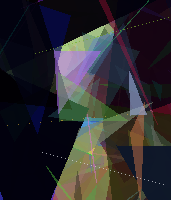

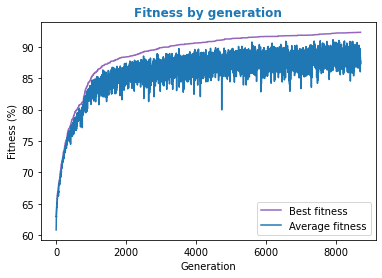

Generation 8701, best fitness: 92.3337%, population average: 89.4498%
Generation 8702, best fitness: 92.3337%, population average: 89.6309%
Generation 8703, best fitness: 92.3337%, population average: 88.8279%
Generation 8704, best fitness: 92.3337%, population average: 88.3694%
Generation 8705, best fitness: 92.3337%, population average: 88.8648%
Generation 8706, best fitness: 92.3337%, population average: 87.8508%
Generation 8707, best fitness: 92.3337%, population average: 89.1752%
Generation 8708, best fitness: 92.3337%, population average: 89.009%
Generation 8709, best fitness: 92.3337%, population average: 88.6277%
Generation 8710, best fitness: 92.3337%, population average: 87.7668%
Generation 8711, best fitness: 92.3337%, population average: 86.26%
Generation 8712, best fitness: 92.3337%, population average: 86.1606%
Generation 8713, best fitness: 92.3337%, population average: 84.6984%
Generation 8714, best fitness: 92.3337%, population average: 86.8306%
Generation 8715, best f

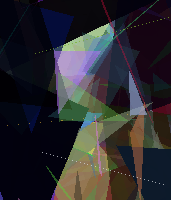

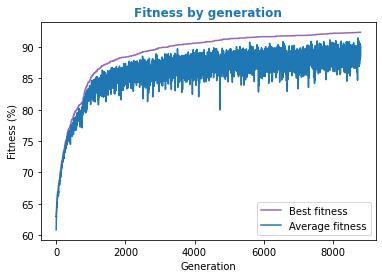

Generation 8801, best fitness: 92.3654%, population average: 89.3219%
Generation 8802, best fitness: 92.3654%, population average: 89.4884%
Generation 8803, best fitness: 92.3654%, population average: 88.6164%
Generation 8804, best fitness: 92.3654%, population average: 88.4697%
Generation 8805, best fitness: 92.3654%, population average: 88.1133%
Generation 8806, best fitness: 92.3654%, population average: 87.3372%
Generation 8807, best fitness: 92.3654%, population average: 88.1281%
Generation 8808, best fitness: 92.3654%, population average: 87.3649%
Generation 8809, best fitness: 92.3654%, population average: 88.2704%
Generation 8810, best fitness: 92.3654%, population average: 89.0843%
Generation 8811, best fitness: 92.3654%, population average: 87.545%
Generation 8812, best fitness: 92.3654%, population average: 89.3946%
Generation 8813, best fitness: 92.3654%, population average: 88.6641%
Generation 8814, best fitness: 92.3654%, population average: 89.9485%
Generation 8815, best

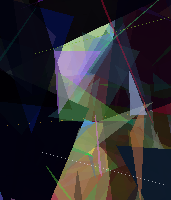

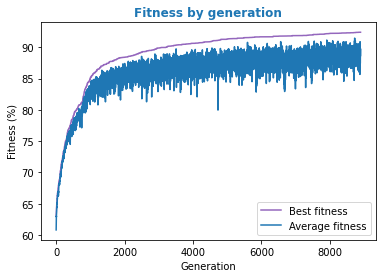

Generation 8901, best fitness: 92.3909%, population average: 89.1826%
Generation 8902, best fitness: 92.3909%, population average: 88.7328%
Generation 8903, best fitness: 92.3909%, population average: 88.903%
Generation 8904, best fitness: 92.3909%, population average: 90.022%
Generation 8905, best fitness: 92.4037%, population average: 90.6293%
Generation 8906, best fitness: 92.4037%, population average: 89.5432%
Generation 8907, best fitness: 92.4037%, population average: 88.8255%
Generation 8908, best fitness: 92.4037%, population average: 88.5226%
Generation 8909, best fitness: 92.4037%, population average: 90.4171%
Generation 8910, best fitness: 92.4037%, population average: 89.5796%
Generation 8911, best fitness: 92.4037%, population average: 88.7926%
Generation 8912, best fitness: 92.4037%, population average: 89.0742%
Generation 8913, best fitness: 92.4037%, population average: 88.8087%
Generation 8914, best fitness: 92.4037%, population average: 88.5108%
Generation 8915, best 

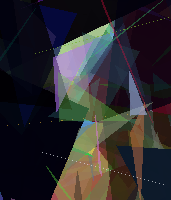

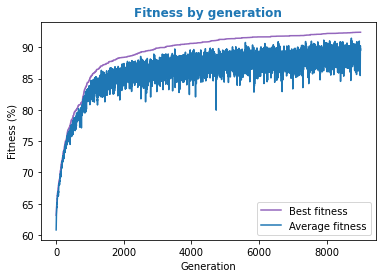

Generation 9001, best fitness: 92.4037%, population average: 88.9979%
Generation 9002, best fitness: 92.4037%, population average: 88.035%
Generation 9003, best fitness: 92.4037%, population average: 88.0056%
Generation 9004, best fitness: 92.4037%, population average: 85.933%
Generation 9005, best fitness: 92.4037%, population average: 86.6884%
Generation 9006, best fitness: 92.4037%, population average: 87.1631%
Generation 9007, best fitness: 92.4037%, population average: 87.9613%
Generation 9008, best fitness: 92.4037%, population average: 88.1527%
Generation 9009, best fitness: 92.4037%, population average: 85.7326%
Generation 9010, best fitness: 92.4037%, population average: 87.7762%
Generation 9011, best fitness: 92.4037%, population average: 86.2116%
Generation 9012, best fitness: 92.4037%, population average: 86.7286%
Generation 9013, best fitness: 92.4037%, population average: 86.8353%
Generation 9014, best fitness: 92.4037%, population average: 88.3821%
Generation 9015, best 

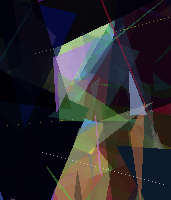

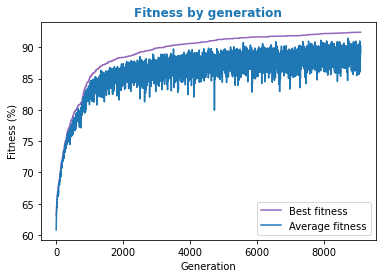

Generation 9101, best fitness: 92.4129%, population average: 89.368%
Generation 9102, best fitness: 92.4129%, population average: 88.6258%
Generation 9103, best fitness: 92.4129%, population average: 90.0233%
Generation 9104, best fitness: 92.4129%, population average: 89.5991%
Generation 9105, best fitness: 92.4129%, population average: 89.3539%
Generation 9106, best fitness: 92.4129%, population average: 88.2989%
Generation 9107, best fitness: 92.4129%, population average: 89.4097%
Generation 9108, best fitness: 92.4129%, population average: 88.117%
Generation 9109, best fitness: 92.4129%, population average: 88.2361%
Generation 9110, best fitness: 92.4129%, population average: 87.6107%
Generation 9111, best fitness: 92.4129%, population average: 87.5148%
Generation 9112, best fitness: 92.4129%, population average: 88.2589%
Generation 9113, best fitness: 92.4129%, population average: 88.58%
Generation 9114, best fitness: 92.4129%, population average: 88.8262%
Generation 9115, best fi

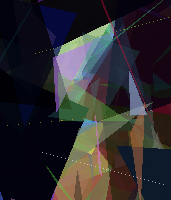

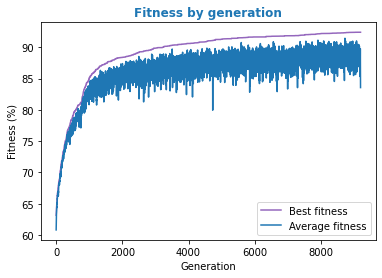

Generation 9201, best fitness: 92.4154%, population average: 86.5768%
Generation 9202, best fitness: 92.4154%, population average: 86.6755%
Generation 9203, best fitness: 92.4154%, population average: 85.6162%
Generation 9204, best fitness: 92.4154%, population average: 87.2112%
Generation 9205, best fitness: 92.4154%, population average: 89.5306%
Generation 9206, best fitness: 92.4154%, population average: 90.041%
Generation 9207, best fitness: 92.4154%, population average: 89.3593%
Generation 9208, best fitness: 92.4154%, population average: 86.9405%
Generation 9209, best fitness: 92.4154%, population average: 88.2222%
Generation 9210, best fitness: 92.4154%, population average: 88.0092%
Generation 9211, best fitness: 92.4154%, population average: 85.7536%
Generation 9212, best fitness: 92.4154%, population average: 88.79%
Generation 9213, best fitness: 92.4154%, population average: 86.3594%
Generation 9214, best fitness: 92.4154%, population average: 86.935%
Generation 9215, best fi

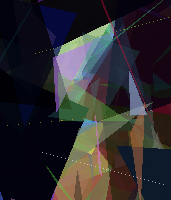

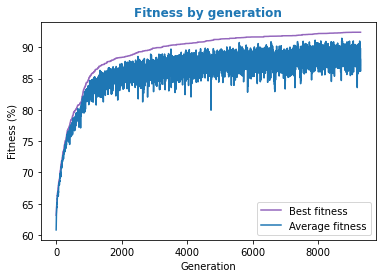

Generation 9301, best fitness: 92.4154%, population average: 90.357%
Generation 9302, best fitness: 92.4154%, population average: 89.2015%
Generation 9303, best fitness: 92.4154%, population average: 87.7002%
Generation 9304, best fitness: 92.4154%, population average: 87.834%
Generation 9305, best fitness: 92.4154%, population average: 87.6779%
Generation 9306, best fitness: 92.4154%, population average: 88.1618%
Generation 9307, best fitness: 92.4154%, population average: 88.7761%
Generation 9308, best fitness: 92.4154%, population average: 88.8247%
Generation 9309, best fitness: 92.4154%, population average: 89.1918%
Generation 9310, best fitness: 92.4154%, population average: 88.4208%
Generation 9311, best fitness: 92.4154%, population average: 88.4794%
Generation 9312, best fitness: 92.4154%, population average: 86.7868%
Generation 9313, best fitness: 92.4154%, population average: 87.0511%
Generation 9314, best fitness: 92.4154%, population average: 87.9633%
Generation 9315, best 

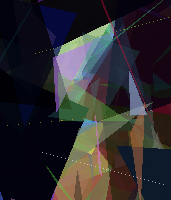

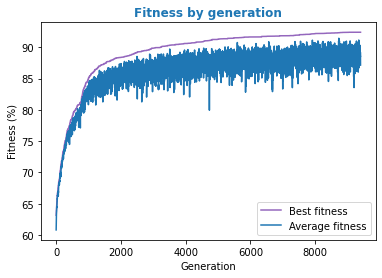

Generation 9401, best fitness: 92.4154%, population average: 88.0484%
Generation 9402, best fitness: 92.4154%, population average: 88.3716%
Generation 9403, best fitness: 92.4154%, population average: 89.7236%
Generation 9404, best fitness: 92.4154%, population average: 89.3543%
Generation 9405, best fitness: 92.4154%, population average: 89.1139%
Generation 9406, best fitness: 92.4154%, population average: 89.1239%
Generation 9407, best fitness: 92.4154%, population average: 87.5061%
Generation 9408, best fitness: 92.4154%, population average: 87.6854%
Generation 9409, best fitness: 92.4154%, population average: 88.9627%
Generation 9410, best fitness: 92.4154%, population average: 88.7563%
Generation 9411, best fitness: 92.4154%, population average: 87.7756%
Generation 9412, best fitness: 92.4154%, population average: 86.6835%
Generation 9413, best fitness: 92.4154%, population average: 87.5532%
Generation 9414, best fitness: 92.4154%, population average: 87.5645%
Generation 9415, bes

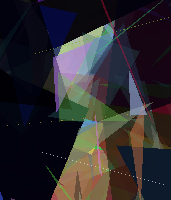

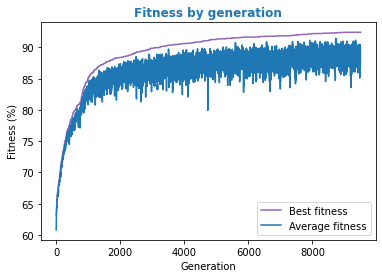

Generation 9501, best fitness: 92.4281%, population average: 89.7862%
Generation 9502, best fitness: 92.4281%, population average: 89.9023%
Generation 9503, best fitness: 92.4281%, population average: 89.1737%
Generation 9504, best fitness: 92.4281%, population average: 89.1562%
Generation 9505, best fitness: 92.4281%, population average: 89.0714%
Generation 9506, best fitness: 92.4281%, population average: 89.1189%
Generation 9507, best fitness: 92.4281%, population average: 89.6556%
Generation 9508, best fitness: 92.4281%, population average: 88.2974%
Generation 9509, best fitness: 92.4281%, population average: 88.8272%
Generation 9510, best fitness: 92.4281%, population average: 87.7589%
Generation 9511, best fitness: 92.4281%, population average: 88.0716%
Generation 9512, best fitness: 92.4281%, population average: 87.7381%
Generation 9513, best fitness: 92.4281%, population average: 88.2388%
Generation 9514, best fitness: 92.4281%, population average: 88.7804%
Generation 9515, bes

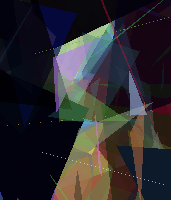

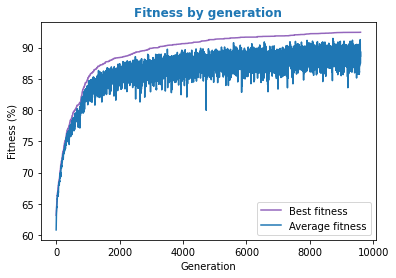

Generation 9601, best fitness: 92.4419%, population average: 88.6549%
Generation 9602, best fitness: 92.4419%, population average: 87.9372%
Generation 9603, best fitness: 92.4419%, population average: 88.1998%
Generation 9604, best fitness: 92.4419%, population average: 88.4159%
Generation 9605, best fitness: 92.4419%, population average: 88.5333%
Generation 9606, best fitness: 92.4419%, population average: 89.7633%
Generation 9607, best fitness: 92.4419%, population average: 89.7965%
Generation 9608, best fitness: 92.4419%, population average: 89.8894%
Generation 9609, best fitness: 92.4419%, population average: 89.3613%
Generation 9610, best fitness: 92.4419%, population average: 87.4089%
Generation 9611, best fitness: 92.4419%, population average: 87.4819%
Generation 9612, best fitness: 92.4419%, population average: 88.4208%
Generation 9613, best fitness: 92.4419%, population average: 88.3863%
Generation 9614, best fitness: 92.4419%, population average: 89.7467%
Generation 9615, bes

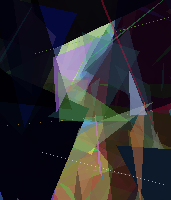

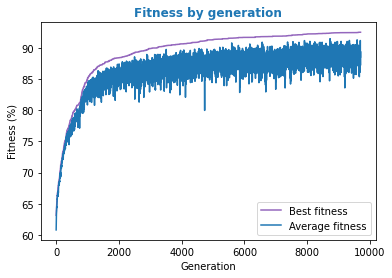

Generation 9701, best fitness: 92.4829%, population average: 88.1702%
Generation 9702, best fitness: 92.4829%, population average: 88.2331%
Generation 9703, best fitness: 92.4829%, population average: 87.392%
Generation 9704, best fitness: 92.4829%, population average: 86.8972%
Generation 9705, best fitness: 92.4829%, population average: 87.8184%
Generation 9706, best fitness: 92.4829%, population average: 88.6107%
Generation 9707, best fitness: 92.4829%, population average: 89.7269%
Generation 9708, best fitness: 92.4829%, population average: 88.5115%
Generation 9709, best fitness: 92.4829%, population average: 88.3738%
Generation 9710, best fitness: 92.4829%, population average: 87.2447%
Generation 9711, best fitness: 92.4829%, population average: 88.392%
Generation 9712, best fitness: 92.4829%, population average: 88.9138%
Generation 9713, best fitness: 92.4829%, population average: 88.3506%
Generation 9714, best fitness: 92.4829%, population average: 87.3573%
Generation 9715, best 

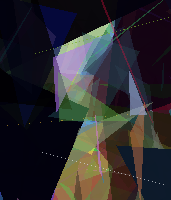

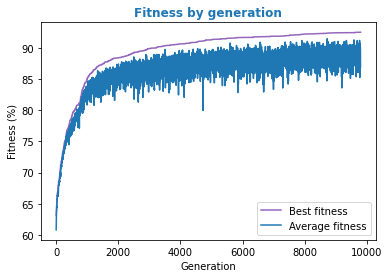

Generation 9801, best fitness: 92.4934%, population average: 86.9179%
Generation 9802, best fitness: 92.4934%, population average: 86.3884%
Generation 9803, best fitness: 92.4934%, population average: 87.4629%
Generation 9804, best fitness: 92.4934%, population average: 88.1807%
Generation 9805, best fitness: 92.4934%, population average: 87.5451%
Generation 9806, best fitness: 92.4934%, population average: 87.9075%
Generation 9807, best fitness: 92.4934%, population average: 86.7332%
Generation 9808, best fitness: 92.4934%, population average: 86.8309%
Generation 9809, best fitness: 92.4934%, population average: 85.7615%
Generation 9810, best fitness: 92.4934%, population average: 84.6395%
Generation 9811, best fitness: 92.4934%, population average: 86.1539%
Generation 9812, best fitness: 92.4934%, population average: 87.9552%
Generation 9813, best fitness: 92.4934%, population average: 88.6939%
Generation 9814, best fitness: 92.4934%, population average: 86.8568%
Generation 9815, bes

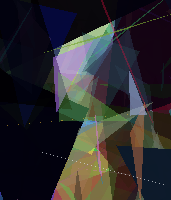

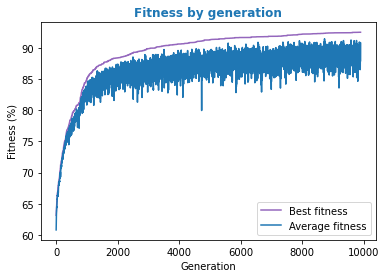

Generation 9901, best fitness: 92.5053%, population average: 89.0201%
Generation 9902, best fitness: 92.5053%, population average: 89.4928%
Generation 9903, best fitness: 92.5053%, population average: 88.4182%
Generation 9904, best fitness: 92.5053%, population average: 88.7654%
Generation 9905, best fitness: 92.5053%, population average: 89.225%
Generation 9906, best fitness: 92.5053%, population average: 89.2779%
Generation 9907, best fitness: 92.5053%, population average: 88.957%
Generation 9908, best fitness: 92.5053%, population average: 88.9622%
Generation 9909, best fitness: 92.5053%, population average: 87.674%
Generation 9910, best fitness: 92.5053%, population average: 87.7831%
Generation 9911, best fitness: 92.5053%, population average: 88.7939%
Generation 9912, best fitness: 92.5053%, population average: 89.0562%
Generation 9913, best fitness: 92.5053%, population average: 88.2606%
Generation 9914, best fitness: 92.5053%, population average: 89.7615%
Generation 9915, best f

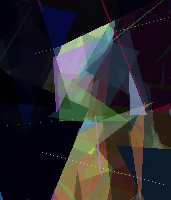

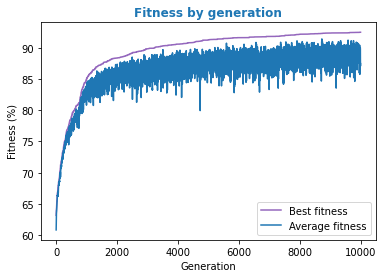

In [ ]:
# Algoritmo genético (Versión nueva :D)
# Programa que dado una imagen de referencia, se busca evolucionar una población 
# aleatoria de individuos, sometiéndola a acciones aleatorias semejantes a las 
# que actúan en la evolución biológica (cruce, mutación, selección) al punto de
# que luego de n generaciones la población tenga similitud a la referencia.
# Author: Ka Fung.
# Date: 07-04-2021

def generate2(filename:str, num_vert: int, num_genes:int, num_ind:int, num_generation:int, mut_prob:float, sel_method: str, num_tourn: int=4, num_elitism: int=5):
    ''' Program that, given a reference image, seeks to evolve a population
        random of polygons, subjecting it to random actions similar to those
        that act in biological evolution (crossing, mutation, selection) to the 
        point of that after n generations the population has similarity to the 
        reference.

        Args:
            filename: string (image name)
            num_vert: int (number of vertices of a polygon)
            num_genes: int (number of genes)
            num_ind: int (number of individuals)
            num_generation: int (number of generations)
            mut_prob: float (Mutation probability)
            sel_type: str (selection method)
            num_tourn: int (number of individuals per competition, this variable
                       is used if the selection method is by tournament)
            num_elitism: int (number of individuals that we will keep in each generation)
            
        Return:
            None
    '''
    # Preconditions
    assert isinstance(filename, str), "Filename must be a string"
    assert num_vert>2, "The number of vertices must be greater than 2"
    assert num_genes>0 and num_ind>0 and num_generation>0, "The number of genes, individuals and generations must be greater than 0"
    assert 0.0<=mut_prob<=1.0, "The probability of mutation must be in a range of [0.0, 1.0]"
    assert sel_method=="r" or sel_method=="t", "Selection method must be 'r' (Roulette Wheel) or 't' (Tournament)"
    assert 0<num_tourn<=num_ind, "The number of individuals per tournament must be greater than 0 and less than the number of individuals in the population"
    assert 0<=num_elitism<=num_ind, "The number of individuals conserved in each generation must be greater than or equal to 0 and less than or equal to the number of individuals per generation."

    # Reference image
    if not filename.lower().endswith('.png'):
        filename += '.png'
    reference = Image.open(filename)
    img_size = reference.size
    display(reference)

    # Randomly generate a population of individuals.
    population = [individual(num_genes, img_size, num_vert) for i in range(num_ind)] 
    plot_best_fit = []
    plot_avg_fit = []
    
    # Iterate for each generation
    for g in range(num_generation):
        # Measure the fitness of all of the individuals and sort them by fitness.
        rank_fit_pop = rank_population(reference, population)   # This is a list of [(fitness, individual),...]
        
        # Calculate the average fitness of the population
        avg_fit = round(sum(rank_fit_pop[ind][0] for ind in range(len(rank_fit_pop))) / len(rank_fit_pop), 4)

        # Save best fitness and average fitness, for plotting
        plot_best_fit.append(rank_fit_pop[0][0])
        plot_avg_fit.append(avg_fit)

        # Print generation number, best fitness, and average fitness in the population
        print(f'Generation {g}, best fitness: {rank_fit_pop[0][0]}%, population average: {avg_fit}%')

        # Draw the best individual in the population for every 100 generations
        if g%100==0:
            best_draw = draw_polygon(img_size, rank_fit_pop[0][1])
            #display(best_draw)                                           # Display (without saving image)
            display_draw(best_draw, f'{g}-{filename}')                    # Display and save image
            plot_fitness(plot_best_fit, plot_avg_fit, f'{g}-{filename}')  # Plot

        # Elitism: Select the most fit to succeed to the next generation.
        new_gen = [rank_fit_pop[i][1] for i in range(num_elitism)]

        # Selection, crossover and mutation: Reproduce enough children to repopulate the next generation.
        for child in range(num_ind - num_elitism):
            # Selection: Determine which individuals should reproduce to make the next generation of individuals
            if sel_method == "r":                             # Roulette Wheel Selection
                parent1, parent2 = roulette2(reference, rank_fit_pop), roulette2(reference, rank_fit_pop)
                while parent1 == parent2:                     # Make sure to choose different individuals 
                    parent2 = roulette2(reference, rank_fit_pop)
            elif sel_method == "t":                           # Tournament Selection
                parent1, parent2 = tournament2(reference, rank_fit_pop, num_tourn), tournament2(reference, rank_fit_pop, num_tourn) 
                while parent1 == parent2:                     # Make sure to choose different individuals 
                    parent2 = tournament2(reference, rank_fit_pop, num_tourn)
            
            child = single_crossover(parent1, parent2)        # Crossover
            new_gen.append(mutate(child, mut_prob, img_size)) # Mutation

        # Update the population
        population = new_gen 

        # Check that the population number is maintained in each generation
        #assert len(population) == num_ind, "The number of the population increased or decreased"

    # Last generation
    last_rank = rank_population(reference, population)
    last_draw = draw_polygon(img_size, last_rank[0][1])
    last_avg_fit = round(sum(last_rank[ind][0] for ind in range(len(last_rank))) / len(last_rank), 4)
    print(f'Generation {num_generation}, best fitness: {last_rank[0][0]}%, population average: {last_avg_fit}%')
    display_draw(last_draw, f'{num_generation}-{filename}')
    plot_best_fit.append(last_rank[0][0])
    plot_avg_fit.append(avg_fit)
    plot_fitness(plot_best_fit, plot_avg_fit, f'{num_generation}-{filename}')
    

# tests
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Meisje_met_de_parel.jpg/1200px-Meisje_met_de_parel.jpg"
filename = download_img(url, "perla.png")            # Nombre de la imagen de referencia: La joven de la perla - Johannes Vermeer

resize = resize_img((200,200), filename)  # Modificamos el tamaño de la imagen
num_vert = 3                              # Número de vértices del polígono
num_genes = 500                           # Número de polígonos por individuo (genes)
num_ind = 20                              # Número de individuos por generación
num_generation = 10000                    # Número de generaciones
mut_prob = 0.1                            # Probabilidad de mutación
selection = "r"                           # Método de selección ("r" si es por ruleta, "t" si es por torneo)
num_tourn = 4                             # Número de individuos por competencia (esta variable sólo se usa si el método es por torneo)
num_elitism = 5                           # Número de individuos (los mejores) que se mantienen en cada generación 
generate2(resize, num_vert, num_genes, num_ind, num_generation, mut_prob, selection, num_tourn, num_elitism)

# Intentos con las correciones

* Primer intento (13-04-2021 07:30am): He corrido esta versión localmente y ha sido horrible (días sin el vital preciado llamado Internet), pero ha servido (?)
    * Tamaño de la imagen: 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 500
    * Número de individuos: 20 
    * Número de generaciones: 7000 
    * Probabilidad de mutación: 0.1
    * Elitismo: 5
    * Método de selección: **torneo** (4 individuos por torneo)

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51112841627/in/dateposted-public/" title="perla7"><img src="https://live.staticflickr.com/65535/51112841627_844b1c89a3_c.jpg" width="800" height="314" alt="perla7"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

* Segundo intento (13-04-2021 11:05am): Me gustó más la versión con el método de torneo jiji.
    * Tamaño de la imagen: 200x200
    * Número de vértices del polígono: 3
    * Número de genes: 500
    * Número de individuos: 20 
    * Número de generaciones: 7000 
    * Probabilidad de mutación: 0.1
    * Elitismo: 5
    * Método de selección: **ruleta**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/191589433@N05/51113481774/in/dateposted-public/" title="perla8"><img src="https://live.staticflickr.com/65535/51113481774_24fde9139a_c.jpg" width="800" height="308" alt="perla8"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>